In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [0]:
data = pd.read_csv("AAPL.csv")

In [3]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [0]:
dataset = data["Close"]

In [0]:
dataset = list(dataset)

In [0]:
cleanedList = [x for x in dataset if str(x) != 'nan']

In [7]:
len(cleanedList)

9797

In [8]:
len(dataset)

9798

In [0]:
dataset= cleanedList

In [0]:

xdata = dataset[:9000]

In [0]:
ydata=dataset[9000:]

In [0]:
def create_training_dataset(dataset, n_steps, n_outputs):
    dataX, dataY = [], []
    for i in range(8900):
        x = dataset[i]
        y = dataset[i+1]
        dataX.append(x)
        dataY.append(y)
    dataX, dataY =  np.array(dataX), np.array(dataY)
    dataX = np.reshape(dataX, (-1, n_steps, n_outputs))
    dataY = np.reshape(dataY, (-1, n_steps, n_outputs))    
    return dataX, dataY

In [0]:
n_steps = 100
n_iterations = 10000
n_inputs = 1 # one input per time step
n_neurons = 120 # one hidden layer
n_outputs = 1 # output layer
learning_rate = 0.0001


In [0]:
dataX, dataY = create_training_dataset(xdata, n_steps, n_outputs)

In [24]:
X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])
cell = tf.contrib.rnn.OutputProjectionWrapper(
        tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
        output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


0 	MSE 1532.2083


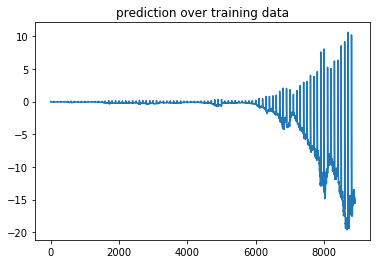

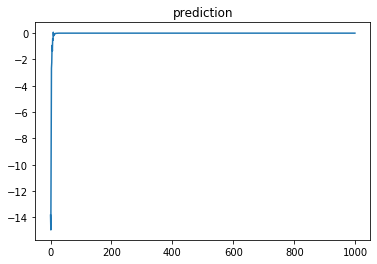

20 	MSE 996.4316


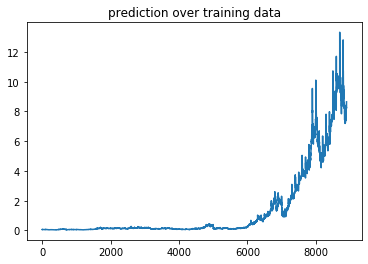

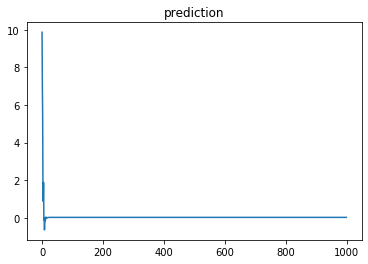

40 	MSE 536.10626


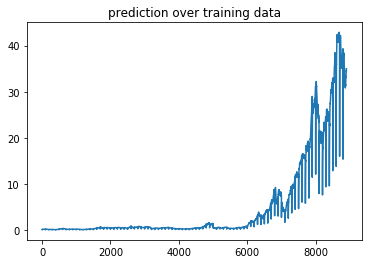

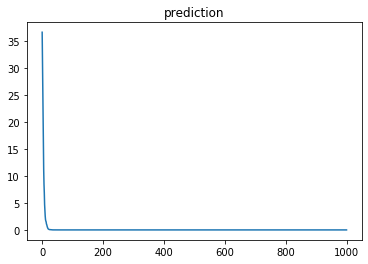

60 	MSE 118.120125


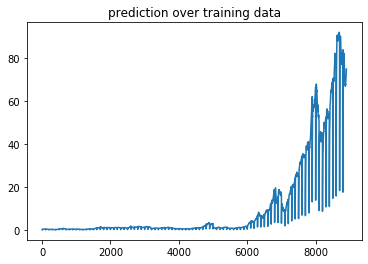

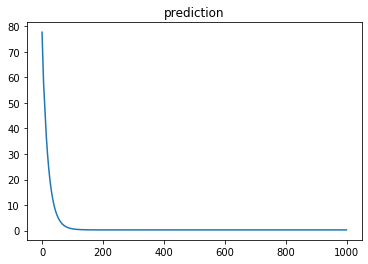

80 	MSE 28.19831


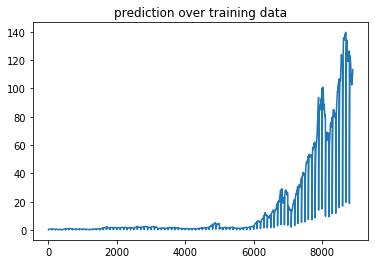

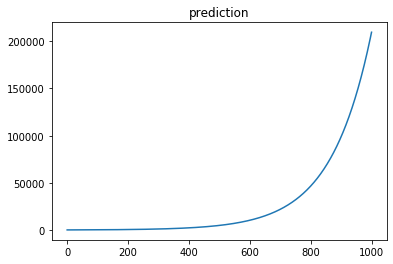

100 	MSE 24.138216


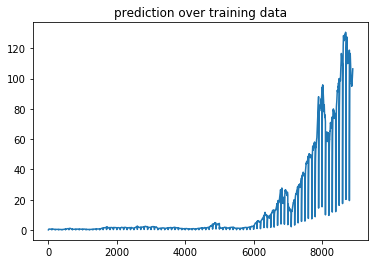

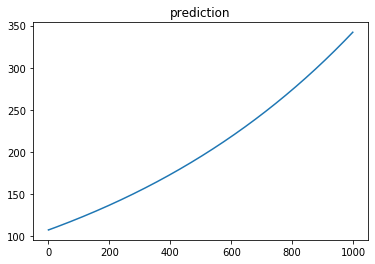

120 	MSE 21.79624


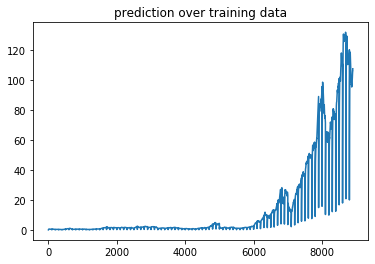

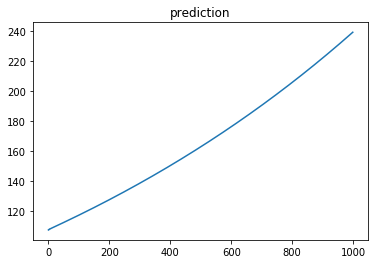

140 	MSE 19.350721


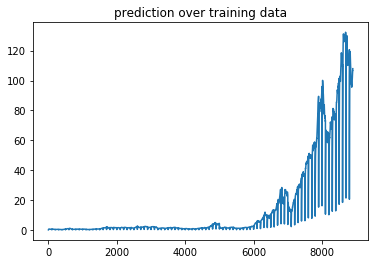

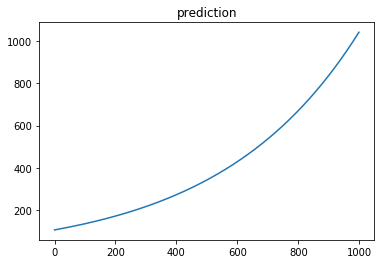

160 	MSE 17.009356


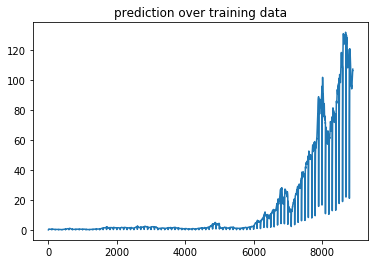

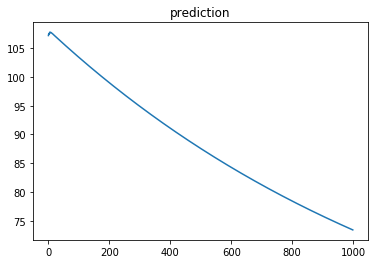

180 	MSE 15.361895


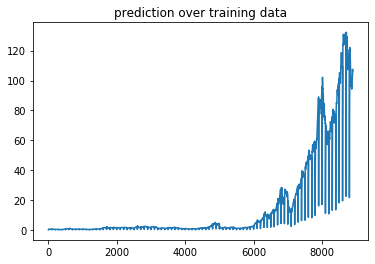

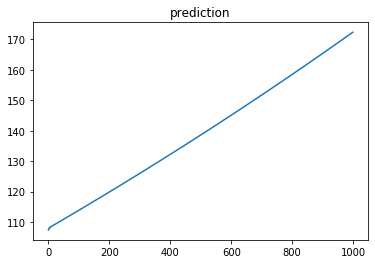

200 	MSE 14.0149765


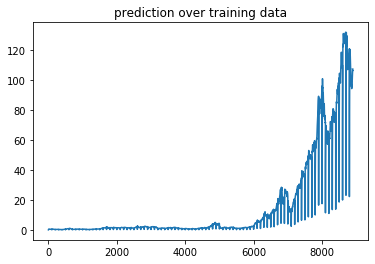

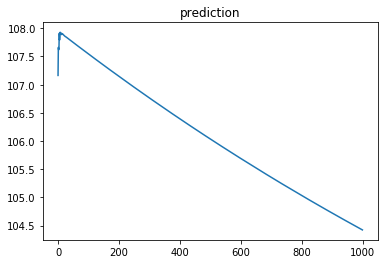

220 	MSE 12.82188


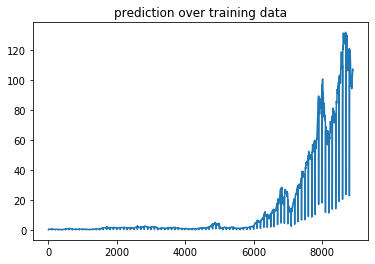

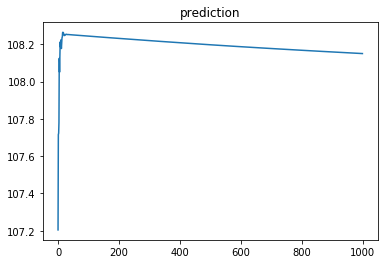

240 	MSE 11.885924


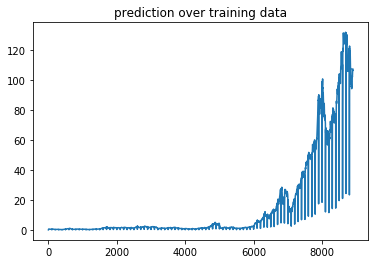

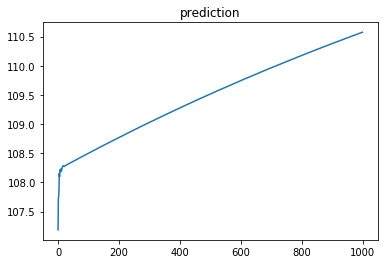

260 	MSE 11.144811


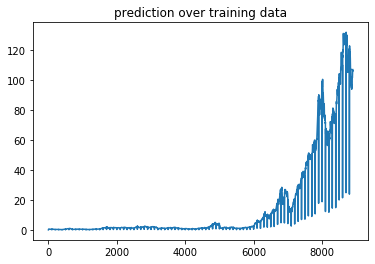

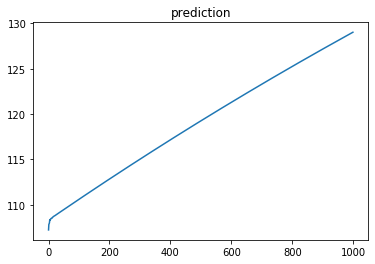

280 	MSE 10.548591


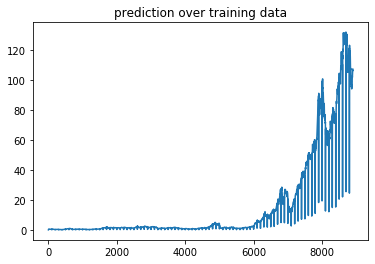

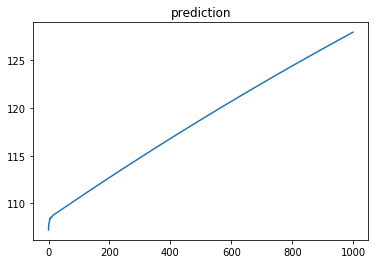

300 	MSE 10.053506


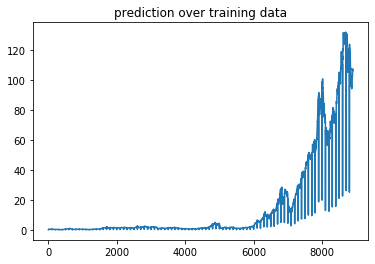

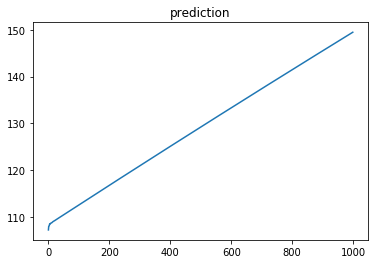

320 	MSE 9.634559


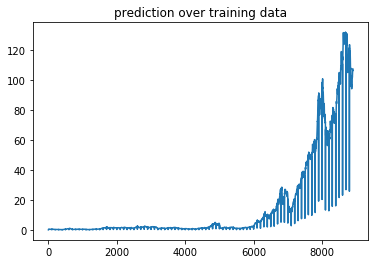

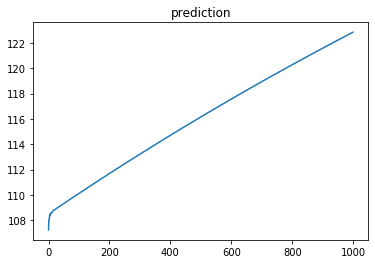

340 	MSE 9.273443


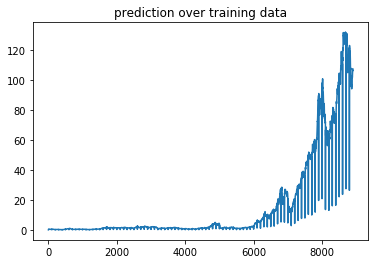

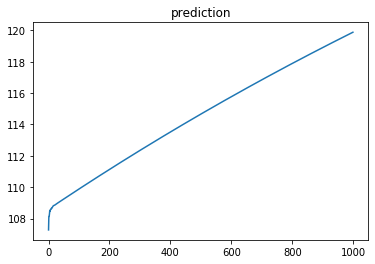

360 	MSE 8.953149


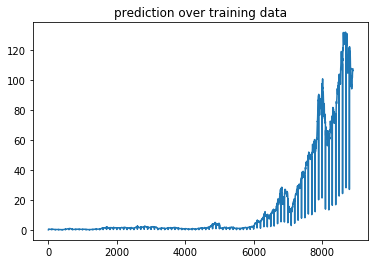

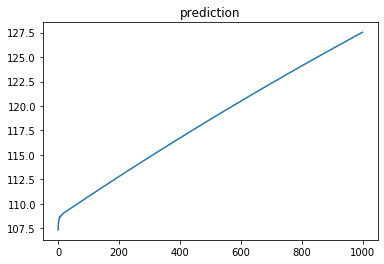

380 	MSE 8.6477165


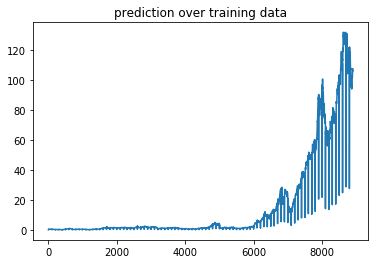

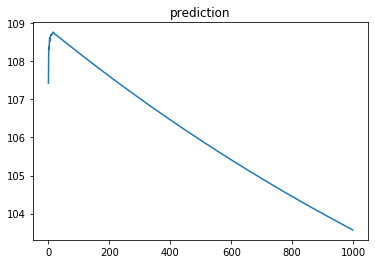

400 	MSE 8.381795


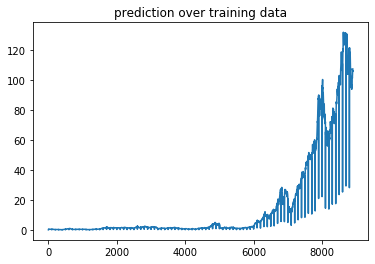

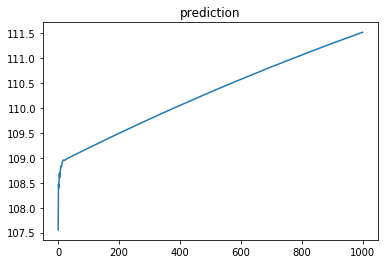

420 	MSE 8.148295


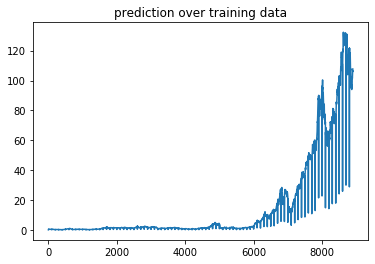

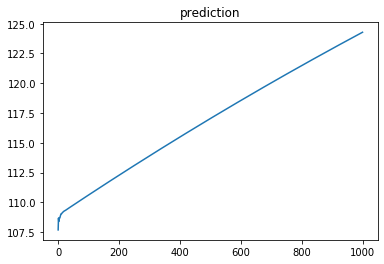

440 	MSE 7.937602


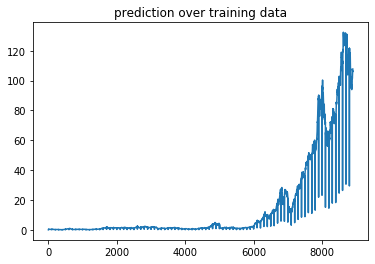

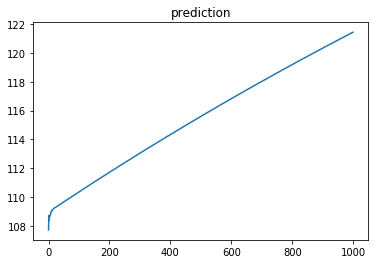

460 	MSE 7.7437334


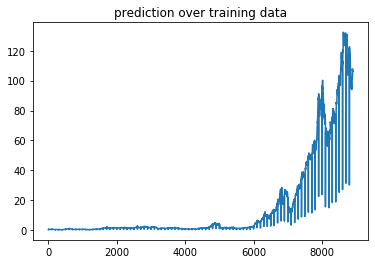

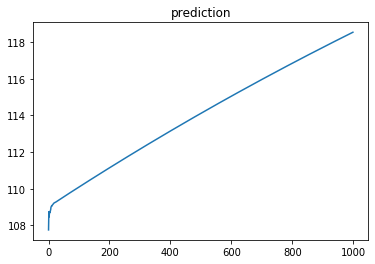

480 	MSE 7.5629115


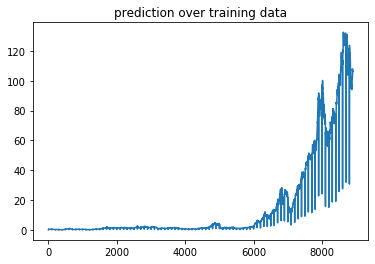

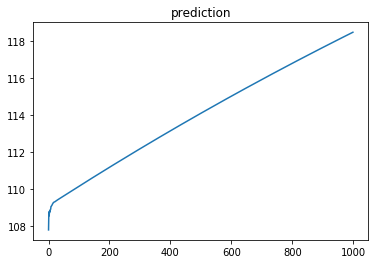

500 	MSE 7.392901


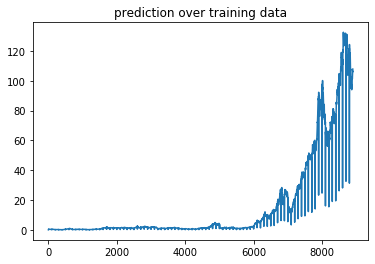

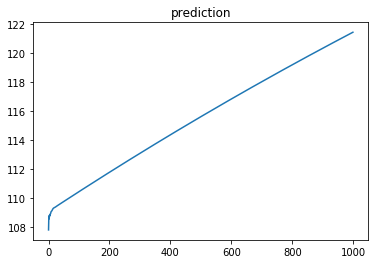

520 	MSE 7.2322316


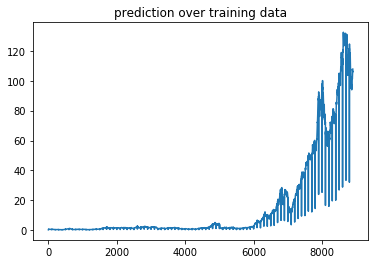

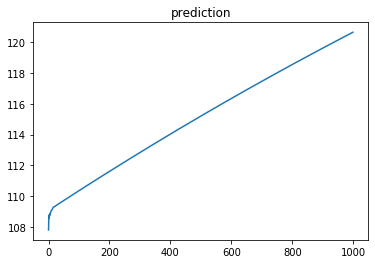

540 	MSE 7.0791926


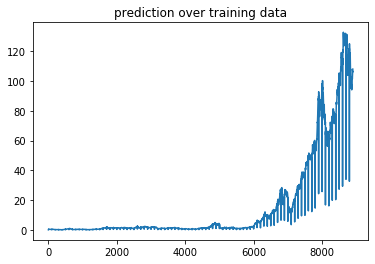

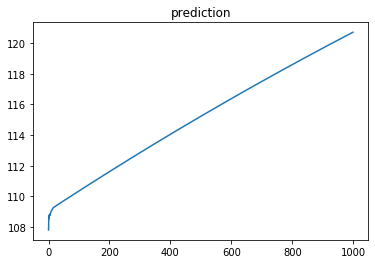

560 	MSE 6.933503


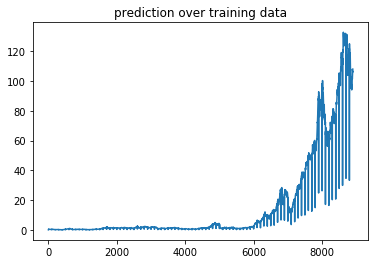

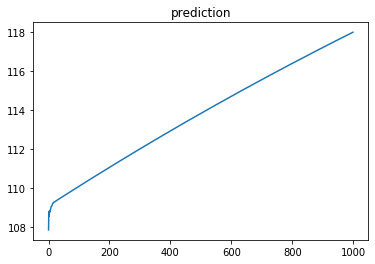

580 	MSE 6.794432


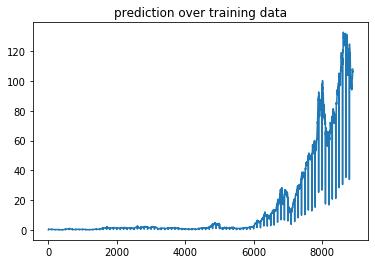

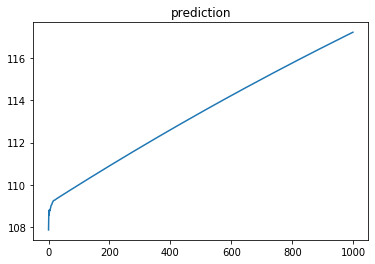

600 	MSE 6.6614327


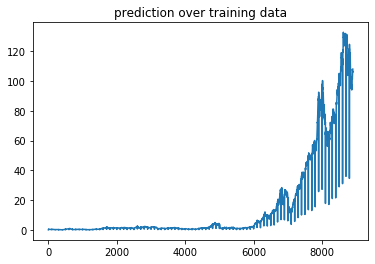

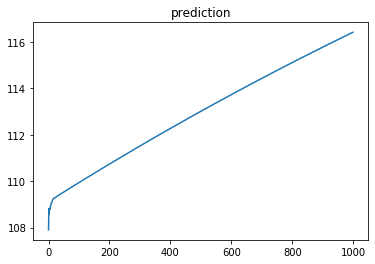

620 	MSE 6.5359287


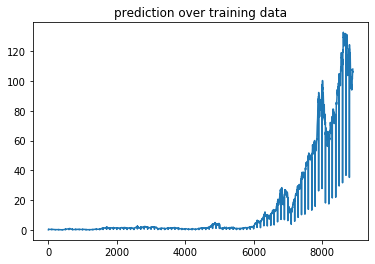

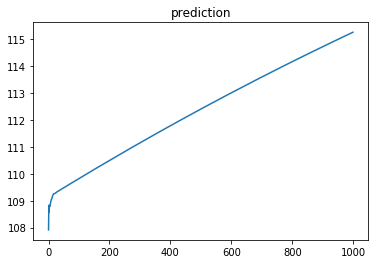

640 	MSE 6.4208965


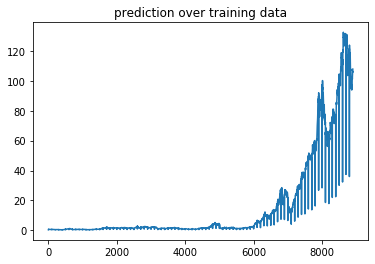

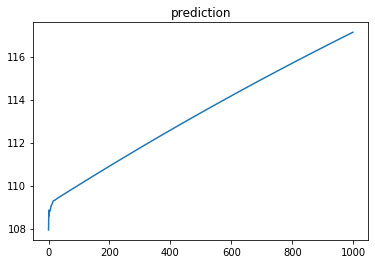

660 	MSE 6.311752


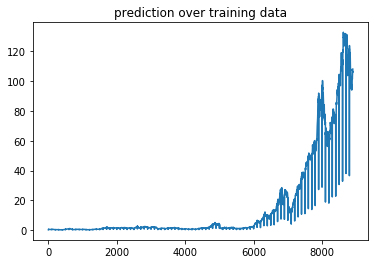

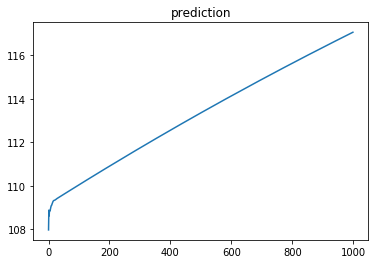

680 	MSE 6.2081985


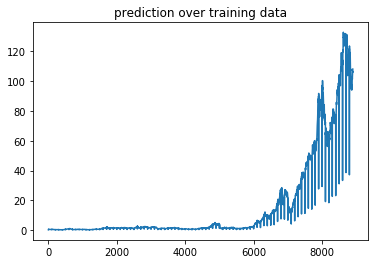

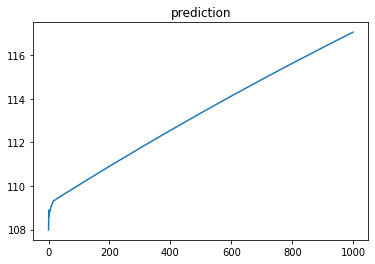

700 	MSE 6.109594


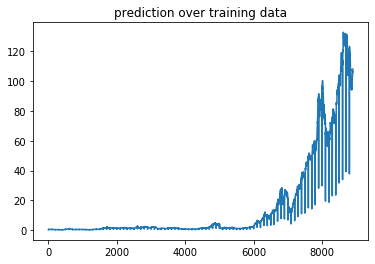

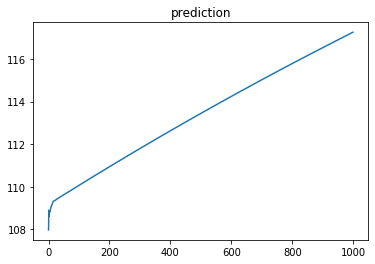

720 	MSE 6.0154037


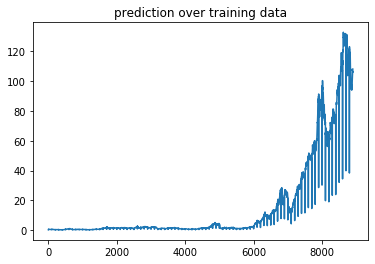

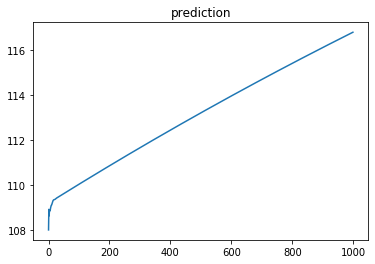

740 	MSE 5.9250307


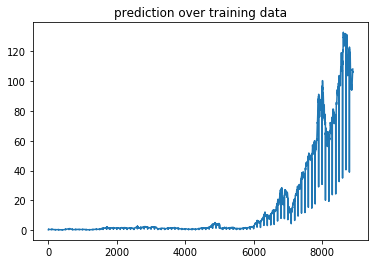

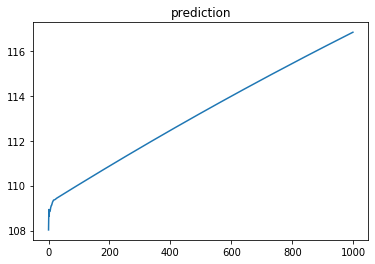

760 	MSE 5.837805


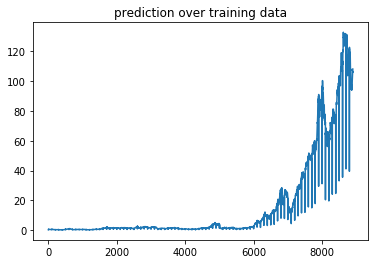

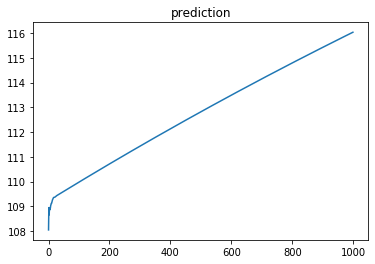

780 	MSE 5.753353


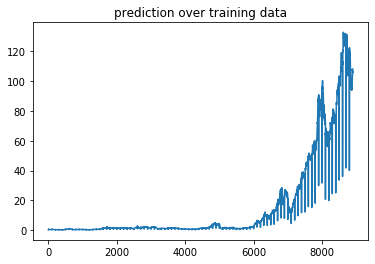

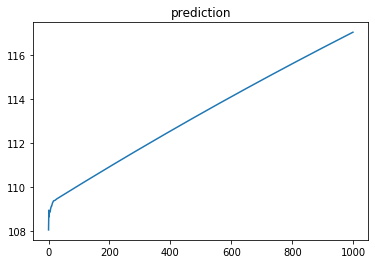

800 	MSE 5.671194


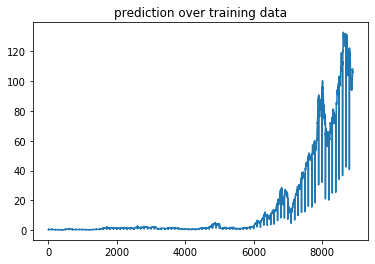

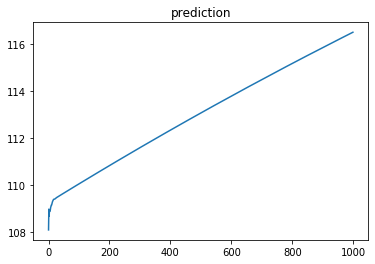

820 	MSE 5.591027


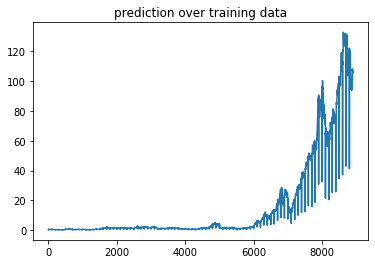

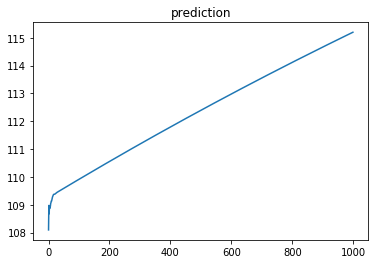

840 	MSE 5.5122995


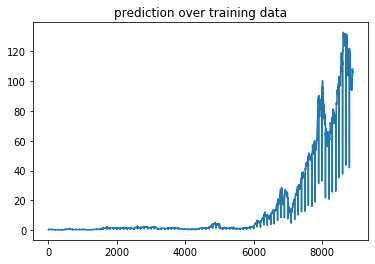

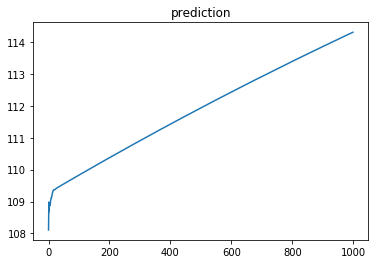

860 	MSE 5.434694


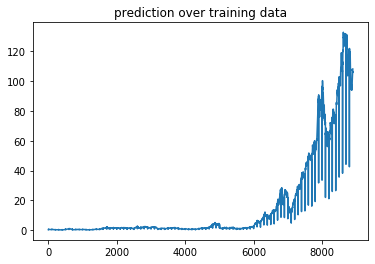

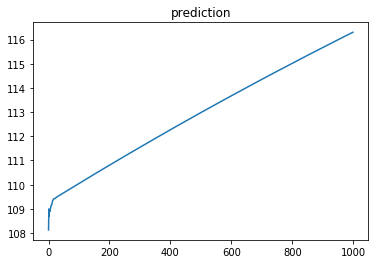

880 	MSE 5.357828


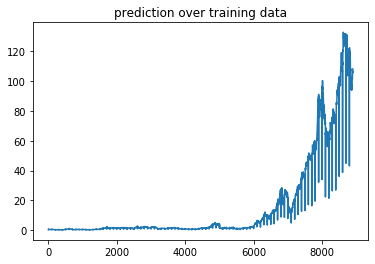

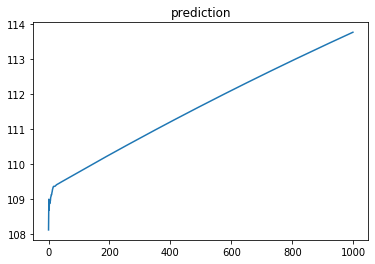

900 	MSE 5.2814164


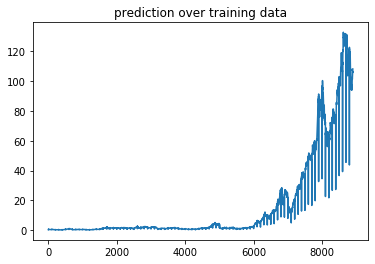

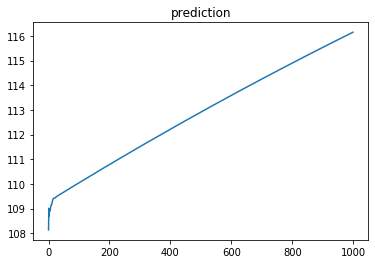

920 	MSE 5.2053356


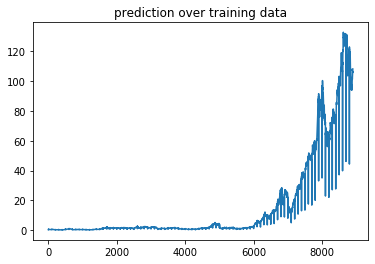

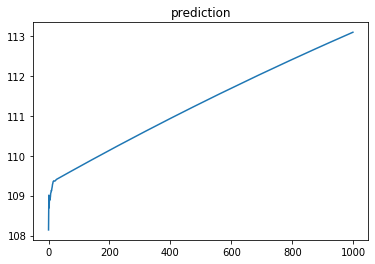

940 	MSE 5.1282744


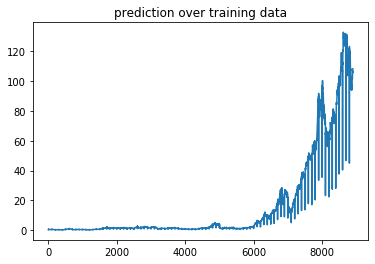

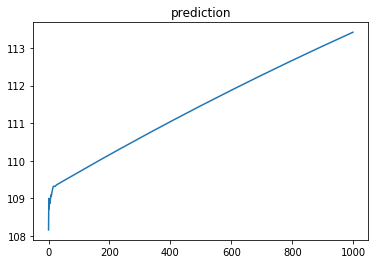

960 	MSE 5.051208


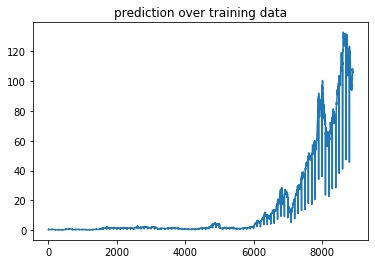

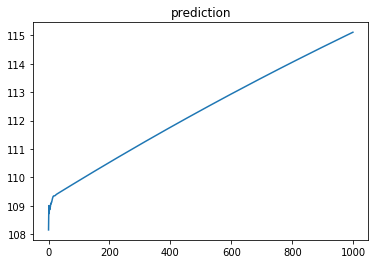

980 	MSE 4.9757366


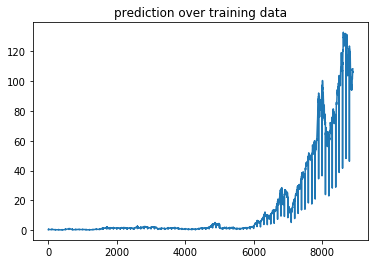

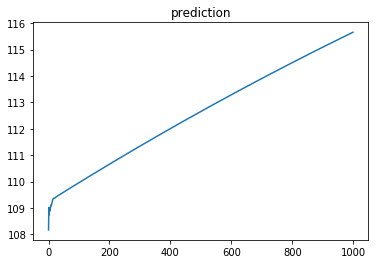

1000 	MSE 4.9001584


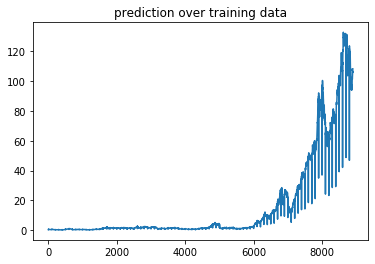

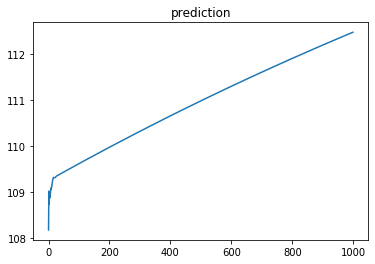

1020 	MSE 4.8246503


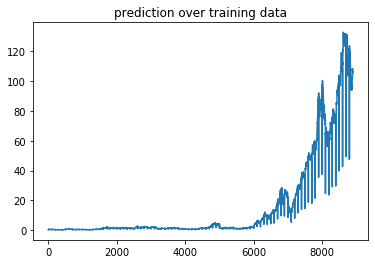

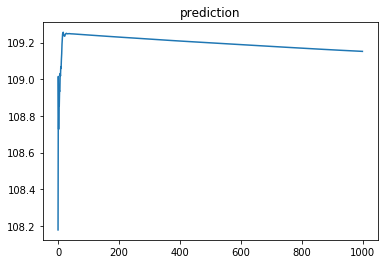

1040 	MSE 4.7490835


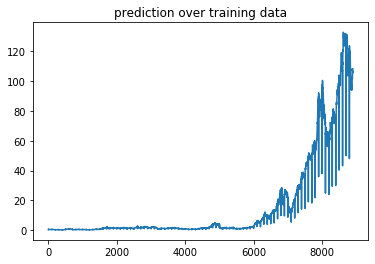

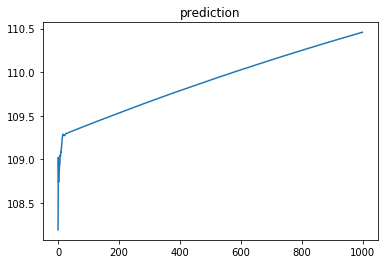

1060 	MSE 4.67362


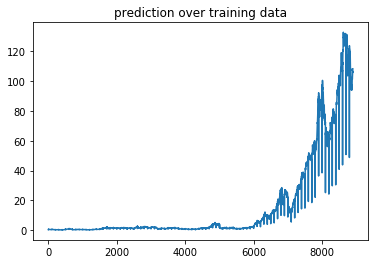

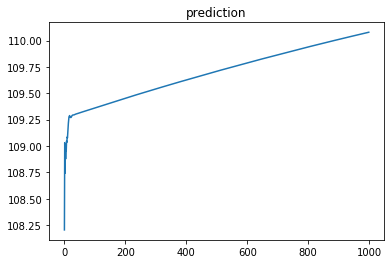

1080 	MSE 4.5982304


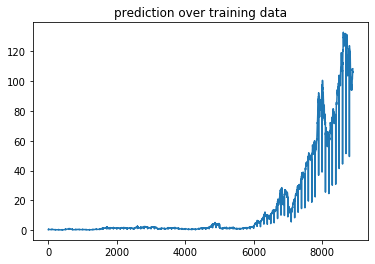

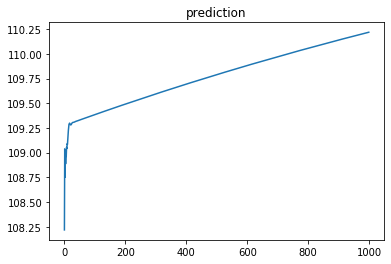

1100 	MSE 4.523049


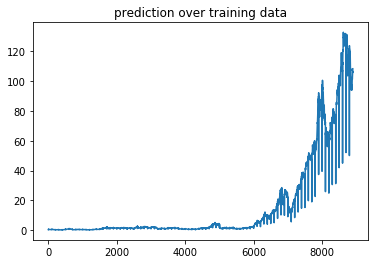

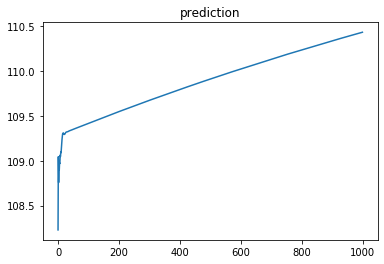

1120 	MSE 4.4507093


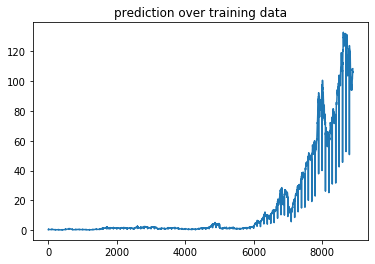

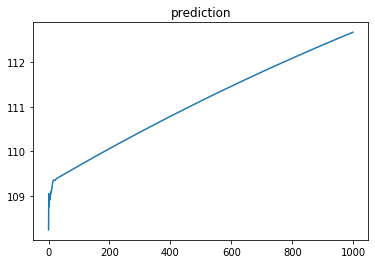

1140 	MSE 4.3800335


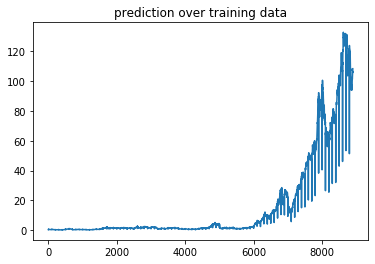

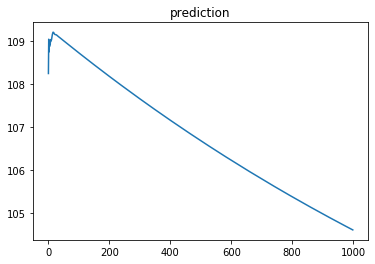

1160 	MSE 4.309188


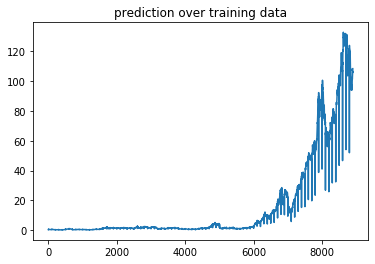

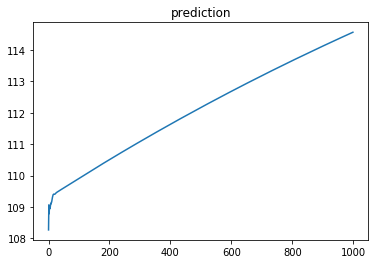

1180 	MSE 4.2383227


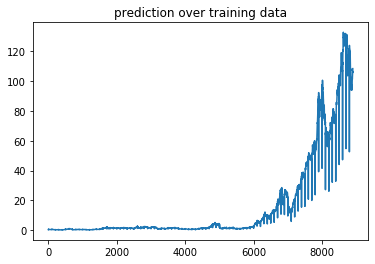

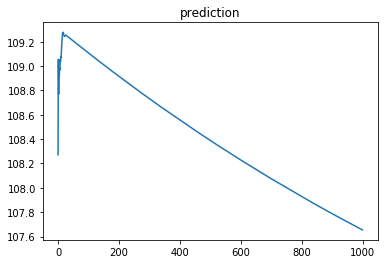

1200 	MSE 4.1673913


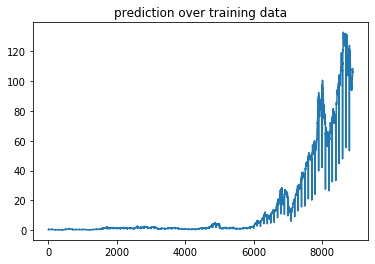

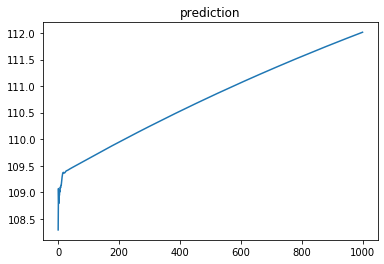

1220 	MSE 4.0954127


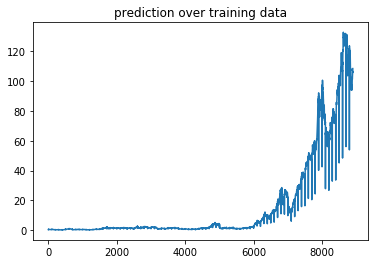

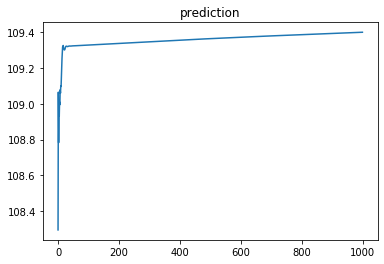

1240 	MSE 4.0234656


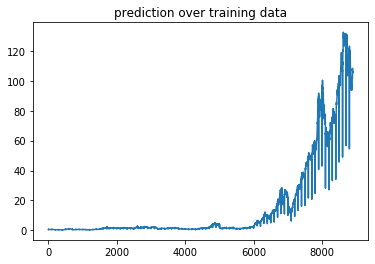

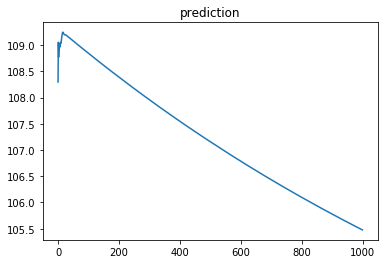

1260 	MSE 3.951698


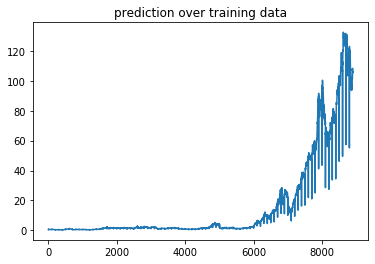

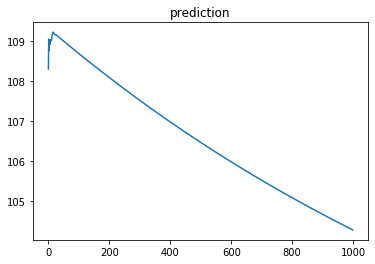

1280 	MSE 3.8800716


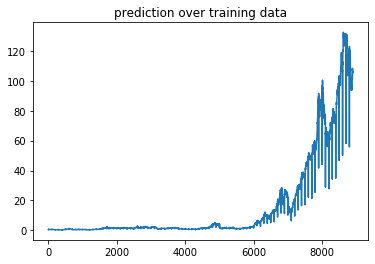

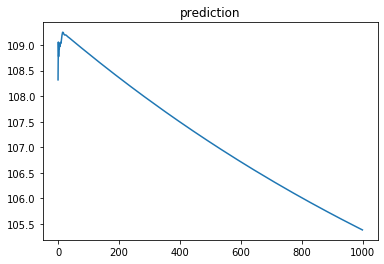

1300 	MSE 3.8084617


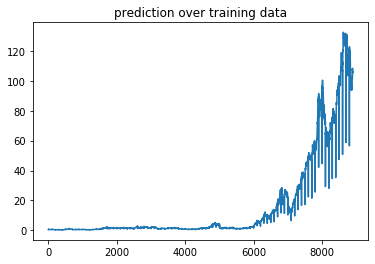

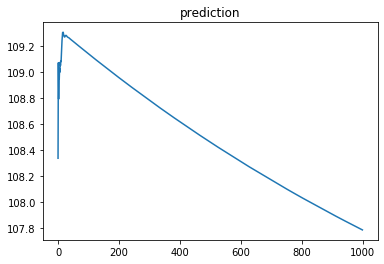

1320 	MSE 3.736872


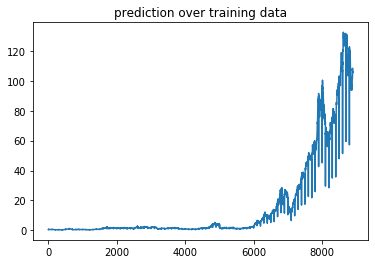

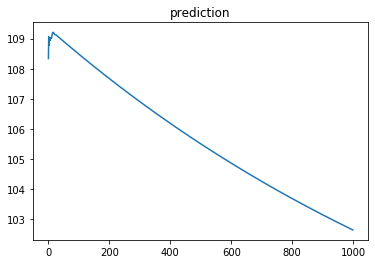

1340 	MSE 3.6653008


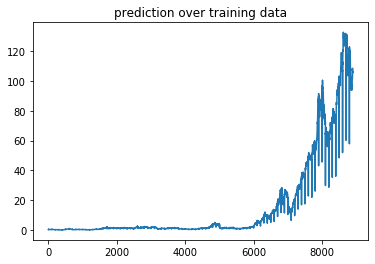

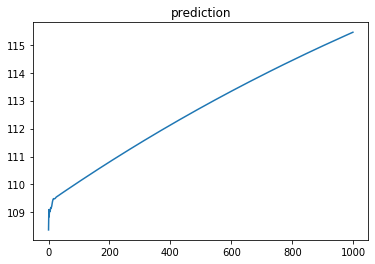

1360 	MSE 3.5936067


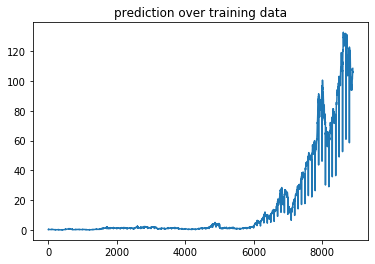

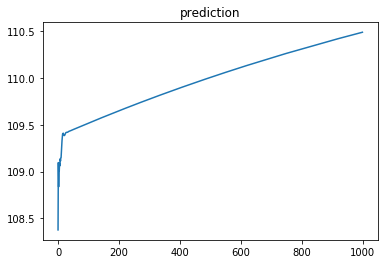

1380 	MSE 3.5217514


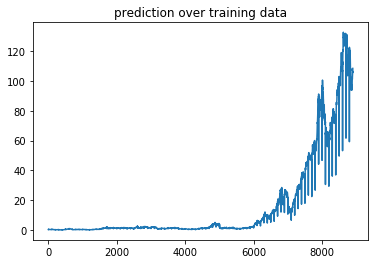

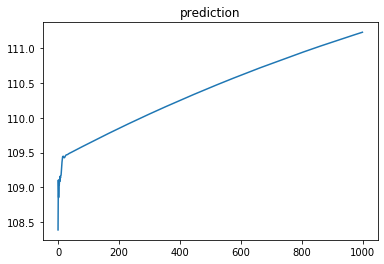

1400 	MSE 3.4459875


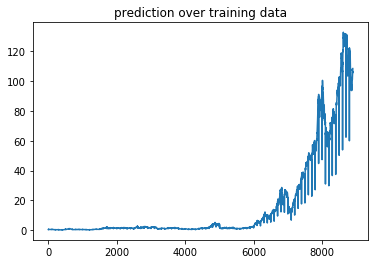

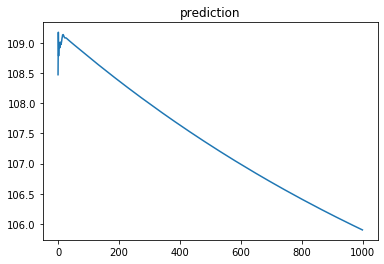

1420 	MSE 3.3697722


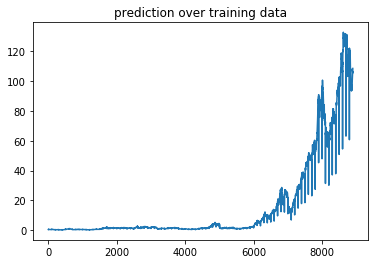

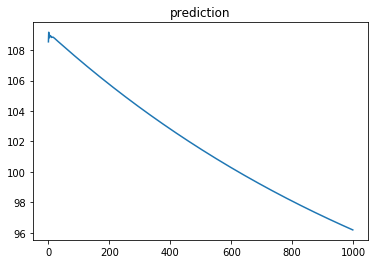

1440 	MSE 3.298543


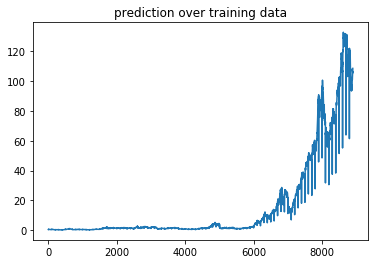

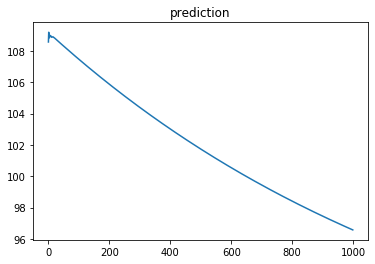

1460 	MSE 3.2278078


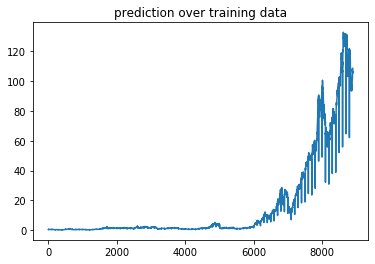

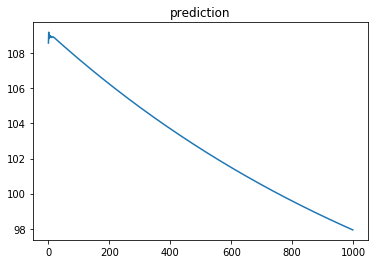

1480 	MSE 3.1575444


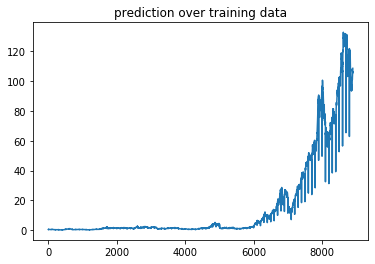

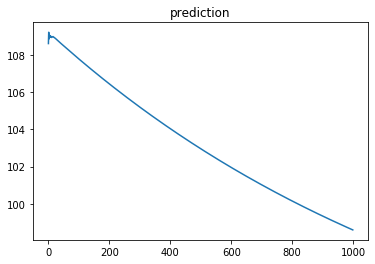

1500 	MSE 3.0876613


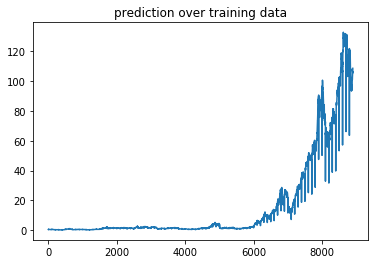

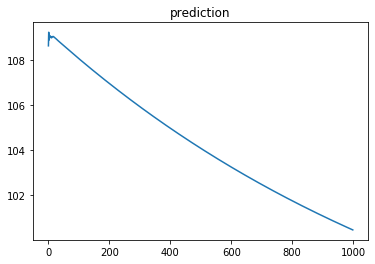

1520 	MSE 3.0182905


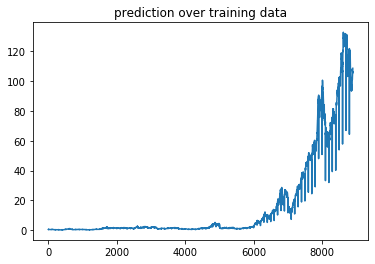

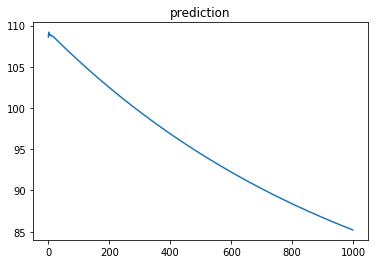

1540 	MSE 2.9488432


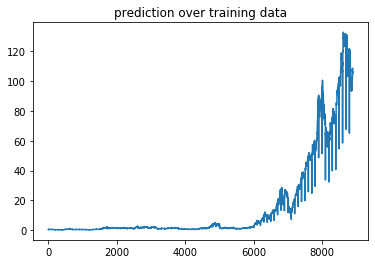

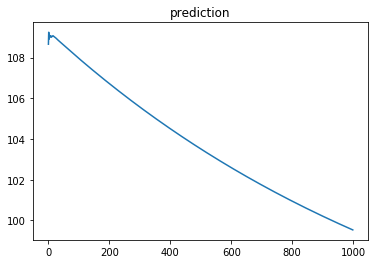

1560 	MSE 2.8801596


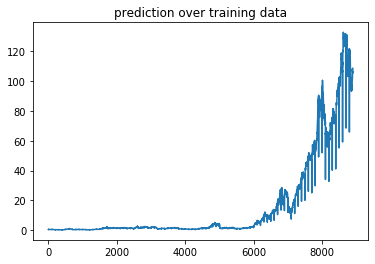

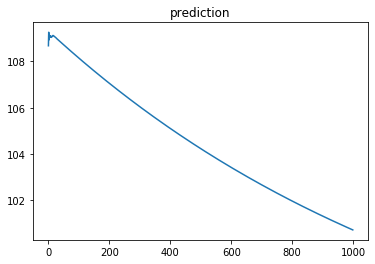

1580 	MSE 2.8121982


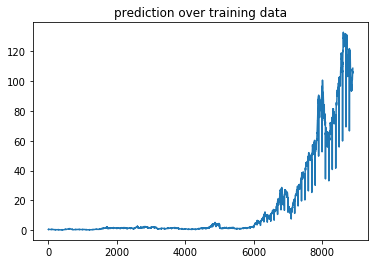

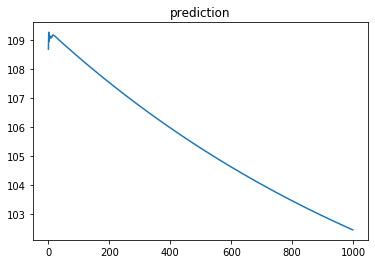

1600 	MSE 2.7444792


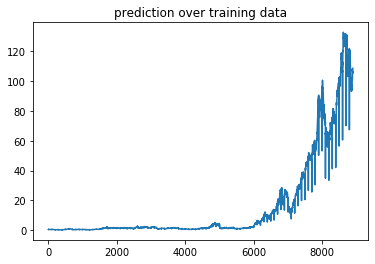

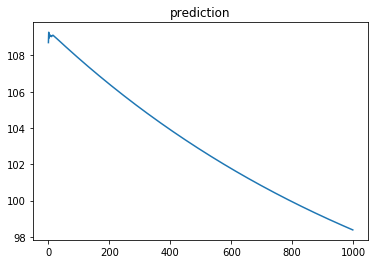

1620 	MSE 2.6774597


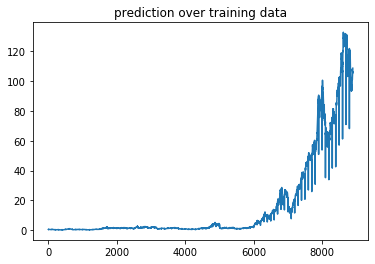

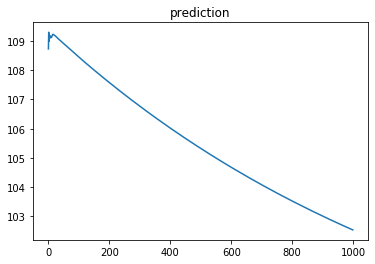

1640 	MSE 2.6112275


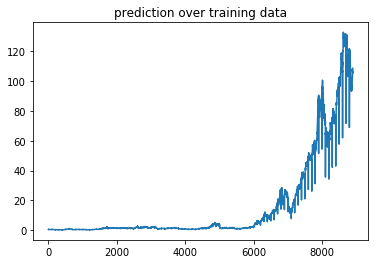

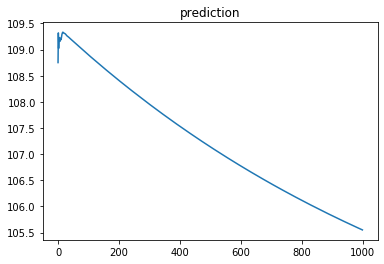

1660 	MSE 2.545745


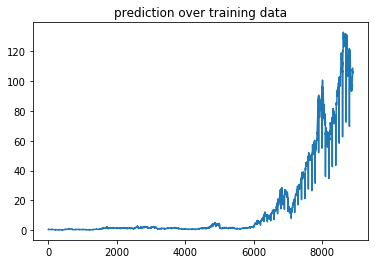

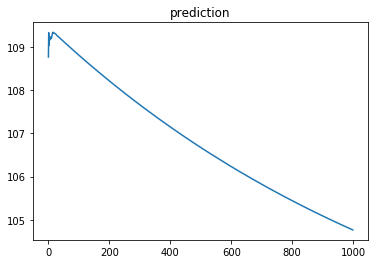

1680 	MSE 2.4809391


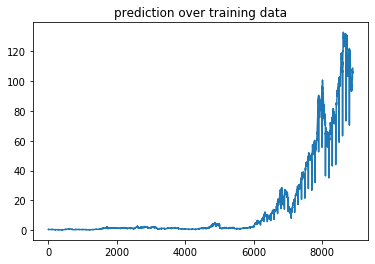

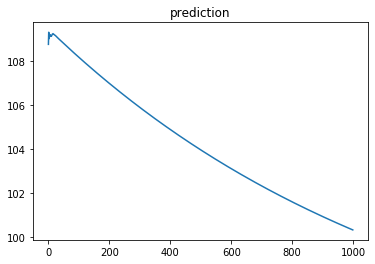

1700 	MSE 2.4168458


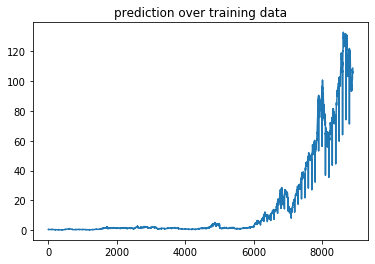

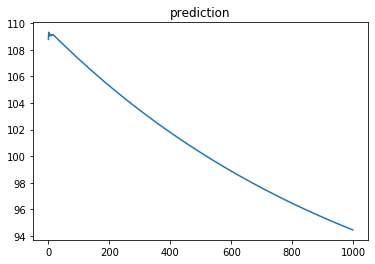

1720 	MSE 2.3535612


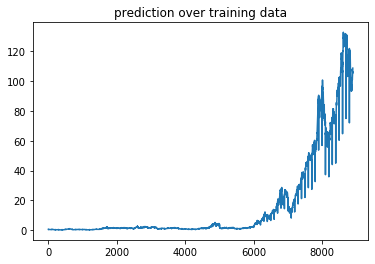

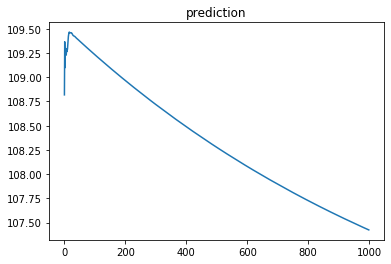

1740 	MSE 2.2912745


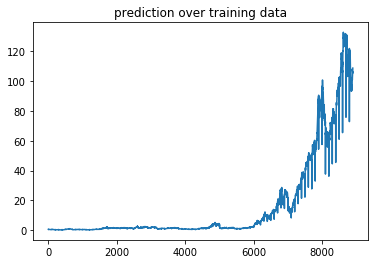

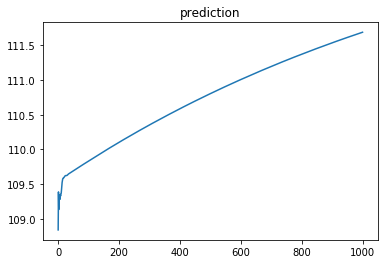

1760 	MSE 2.229599


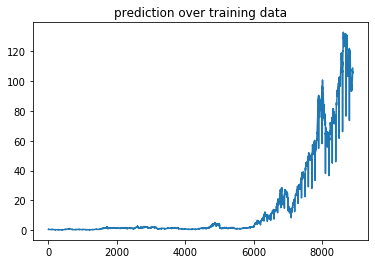

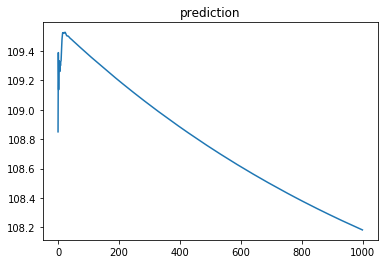

1780 	MSE 2.1689792


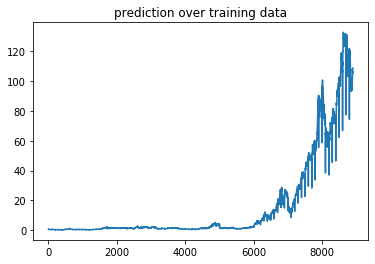

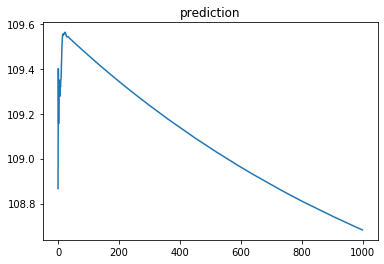

1800 	MSE 2.109108


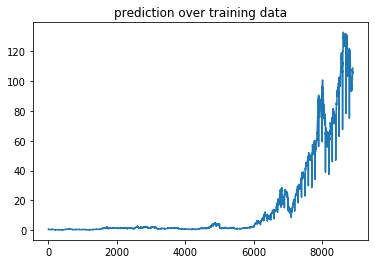

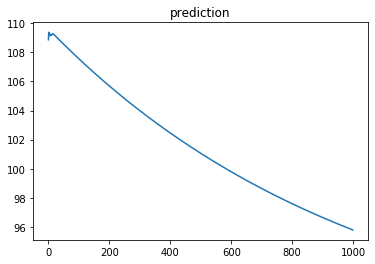

1820 	MSE 2.0502203


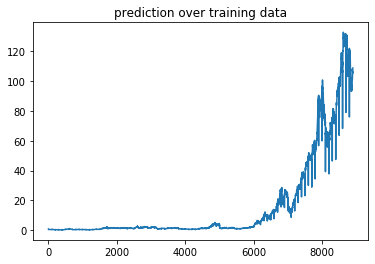

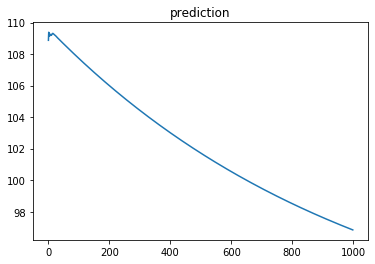

1840 	MSE 1.9921954


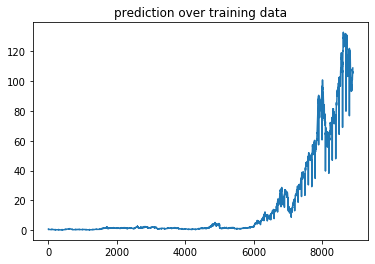

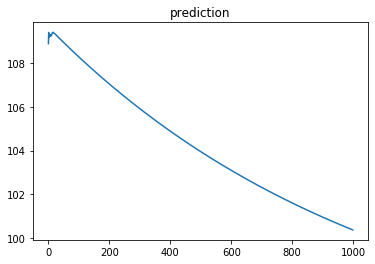

1860 	MSE 1.9351429


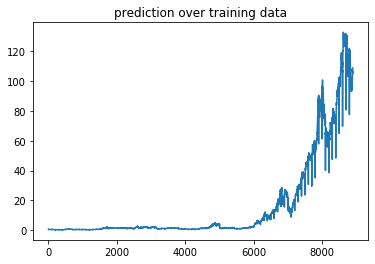

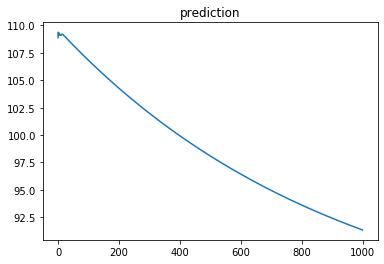

1880 	MSE 1.8629426


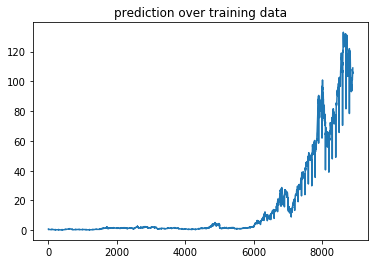

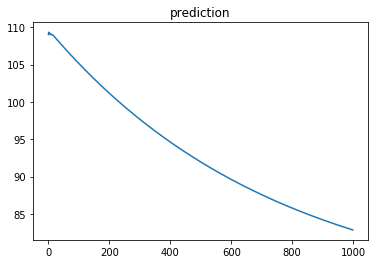

1900 	MSE 1.805318


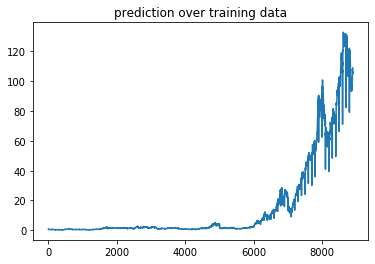

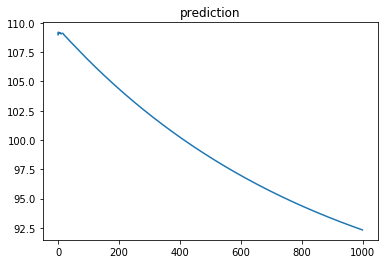

1920 	MSE 1.7499939


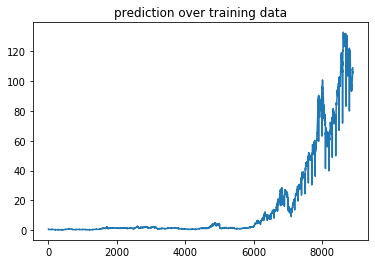

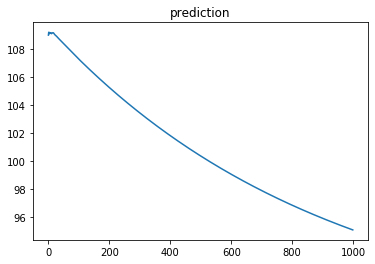

1940 	MSE 1.6961945


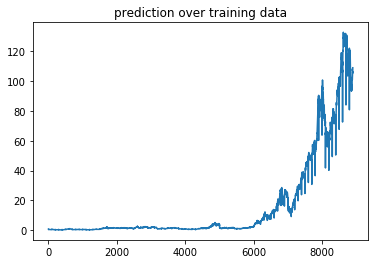

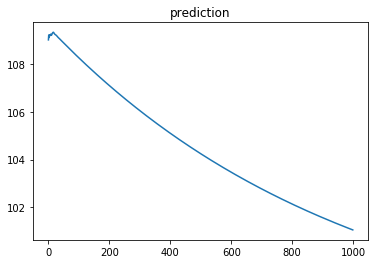

1960 	MSE 1.6436133


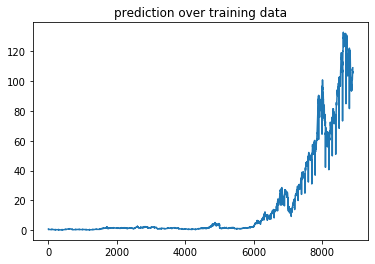

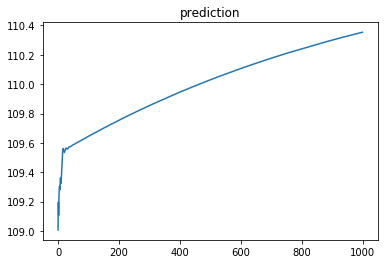

1980 	MSE 1.5922209


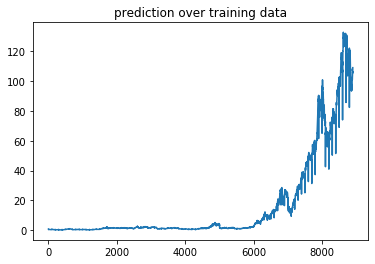

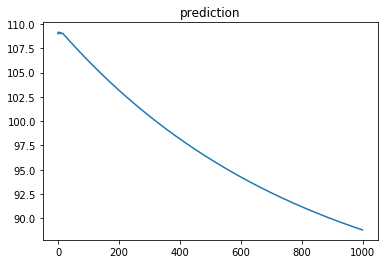

2000 	MSE 1.5417653


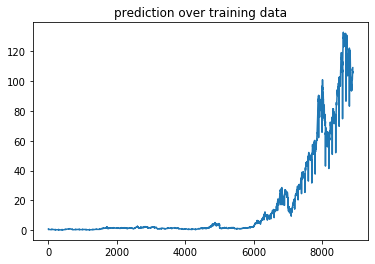

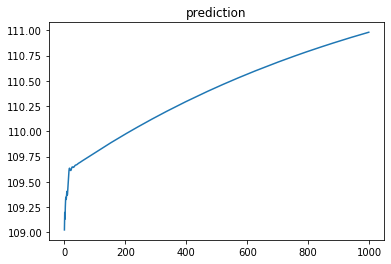

2020 	MSE 1.4927081


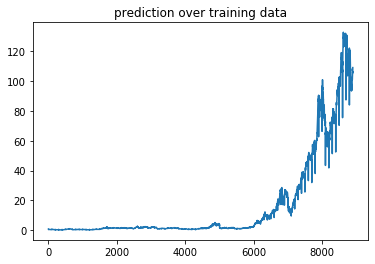

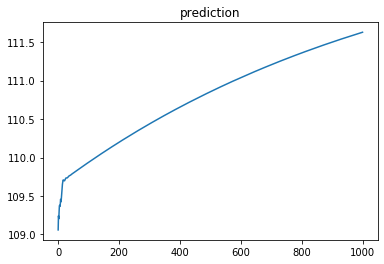

2040 	MSE 1.444757


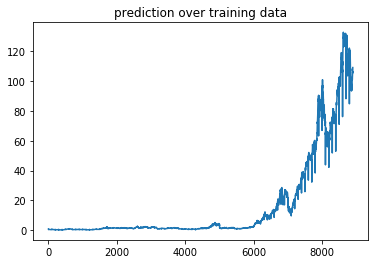

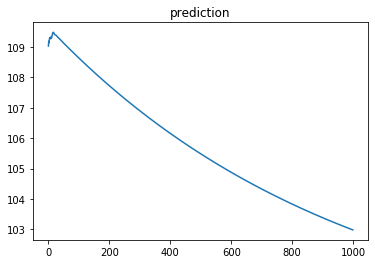

2060 	MSE 1.3981535


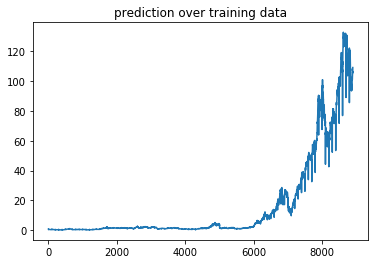

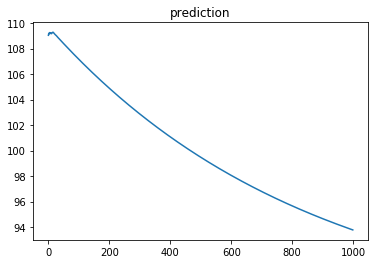

2080 	MSE 1.3525189


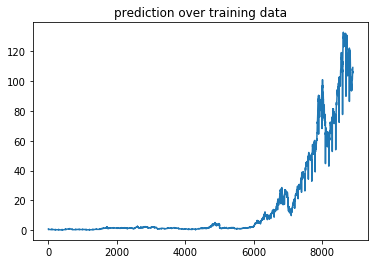

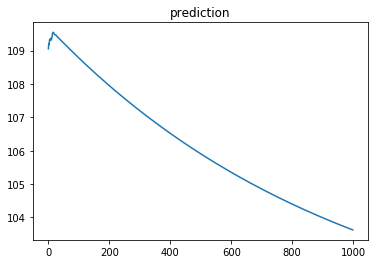

2100 	MSE 1.3082167


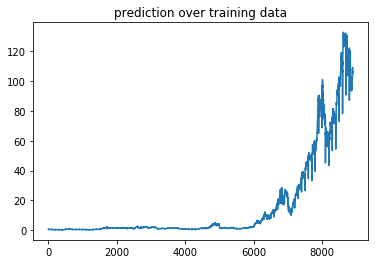

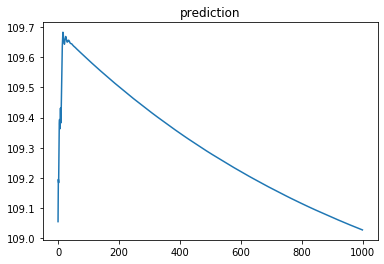

2120 	MSE 1.2650157


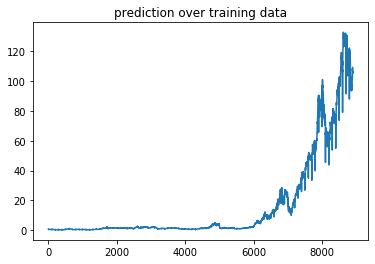

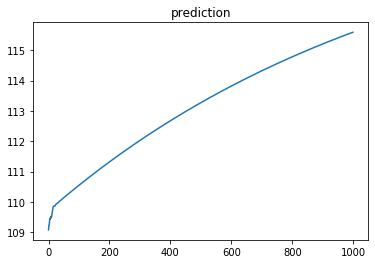

2140 	MSE 1.2229762


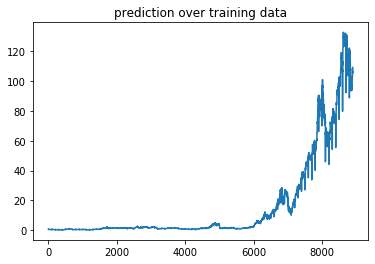

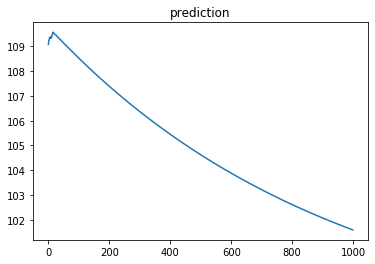

2160 	MSE 1.1822972


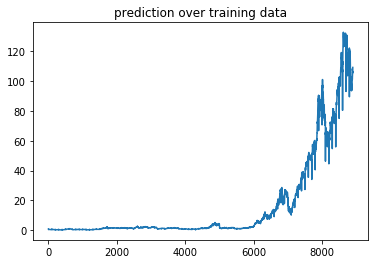

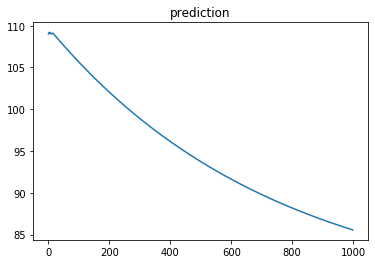

2180 	MSE 1.1424965


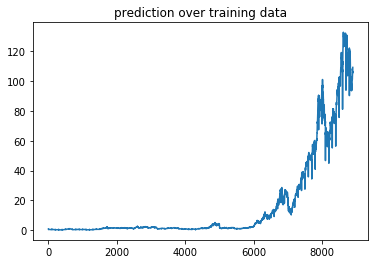

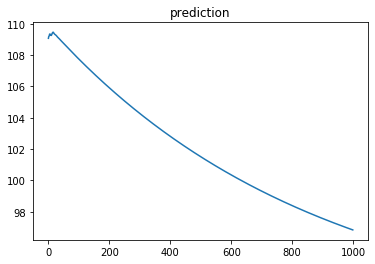

2200 	MSE 1.1042179


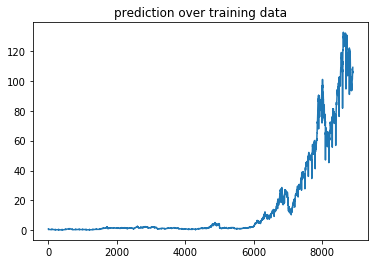

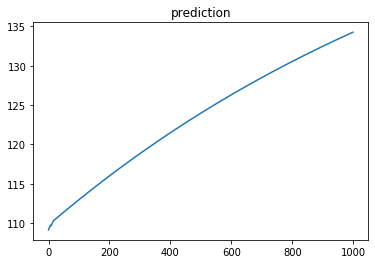

2220 	MSE 1.0668302


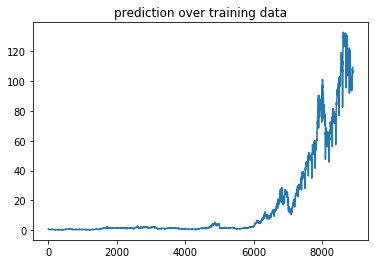

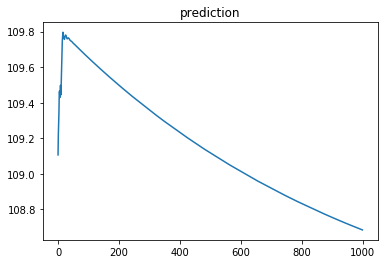

2240 	MSE 1.0309583


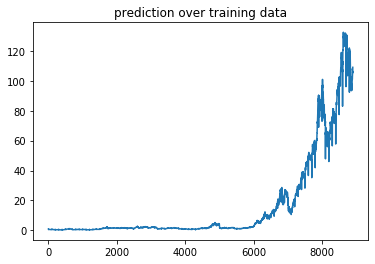

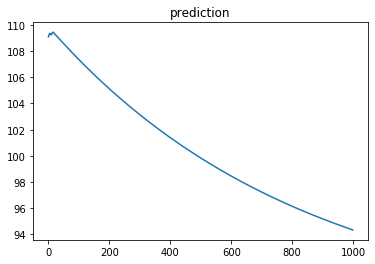

2260 	MSE 0.99611294


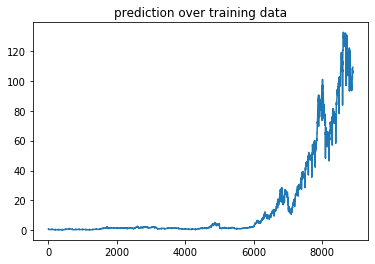

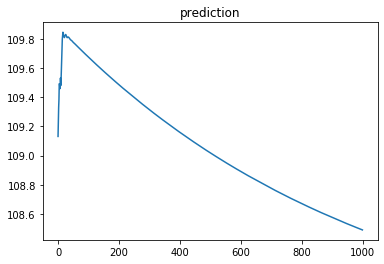

2280 	MSE 0.96244395


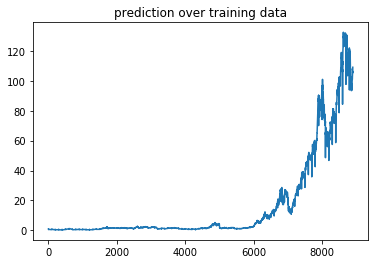

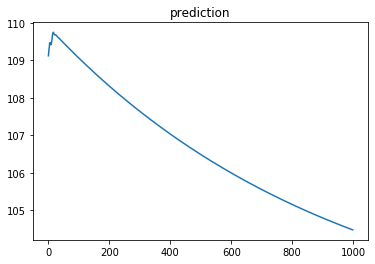

2300 	MSE 0.9300249


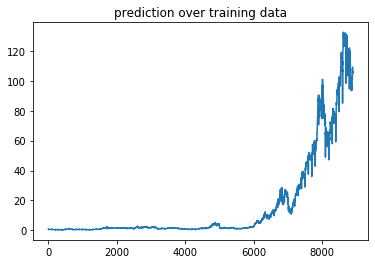

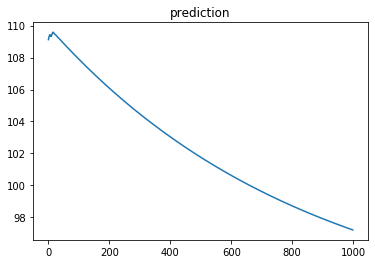

2320 	MSE 0.89869744


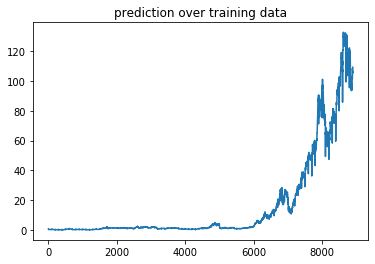

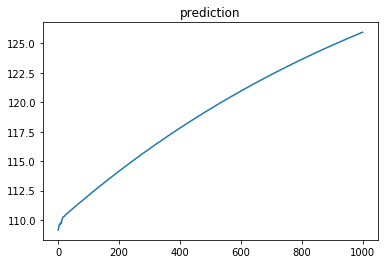

2340 	MSE 0.86859393


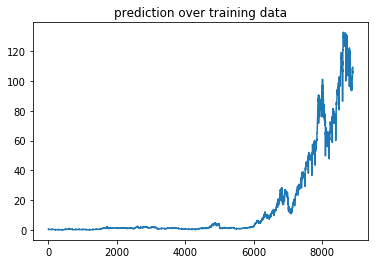

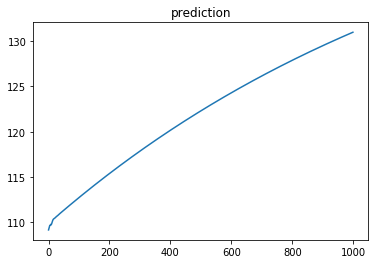

2360 	MSE 0.8395392


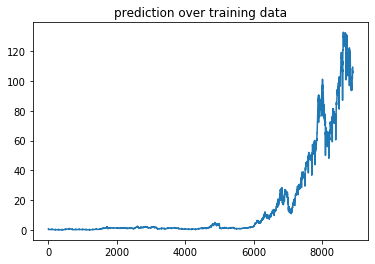

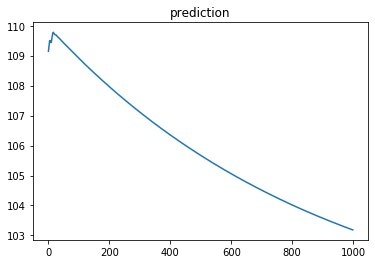

2380 	MSE 0.8115942


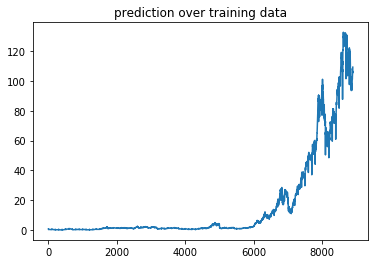

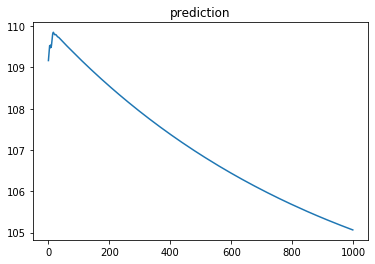

2400 	MSE 0.78485215


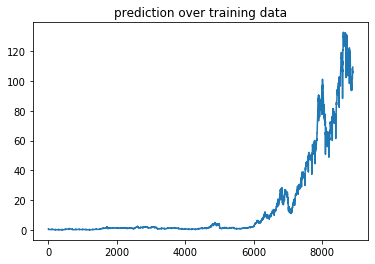

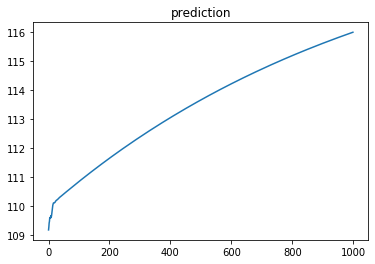

2420 	MSE 0.75909877


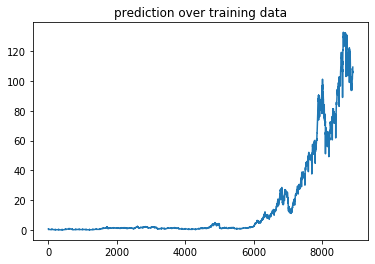

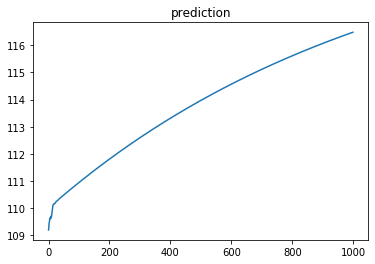

2440 	MSE 0.7345747


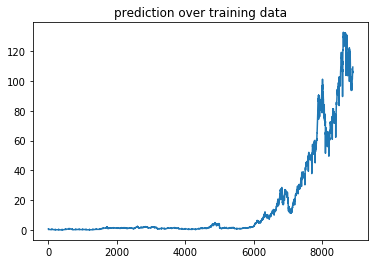

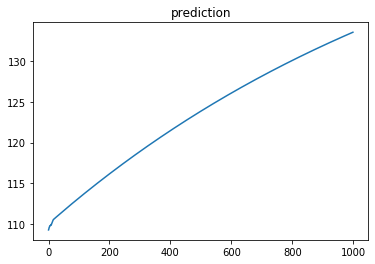

2460 	MSE 0.7108816


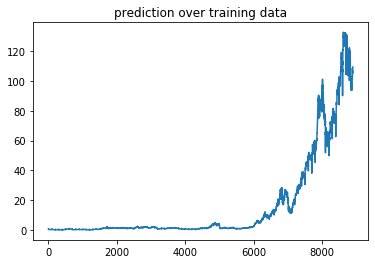

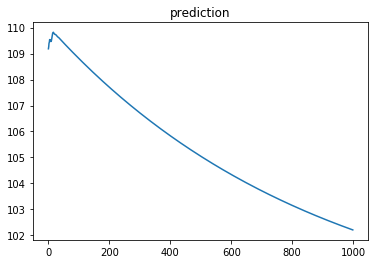

2480 	MSE 0.6885474


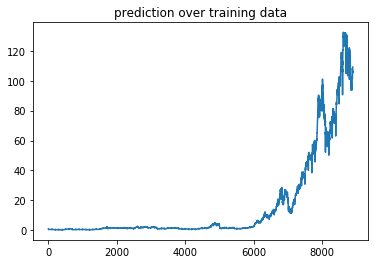

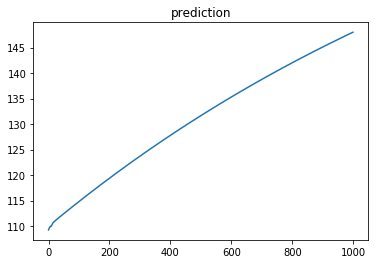

2500 	MSE 0.6668787


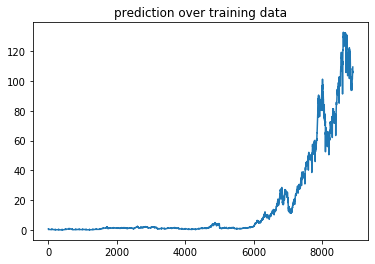

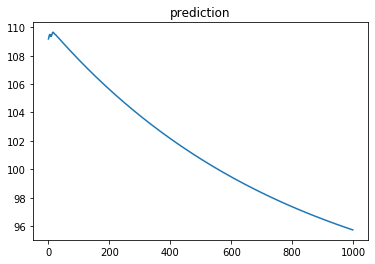

2520 	MSE 0.6462829


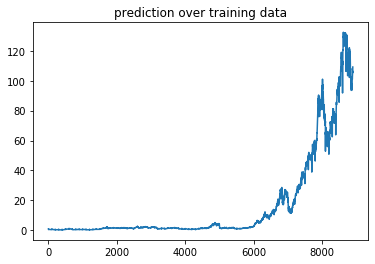

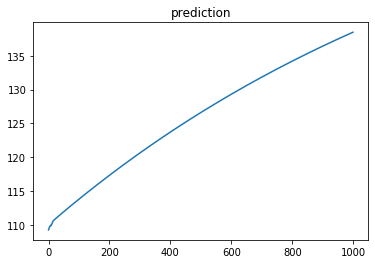

2540 	MSE 0.6265223


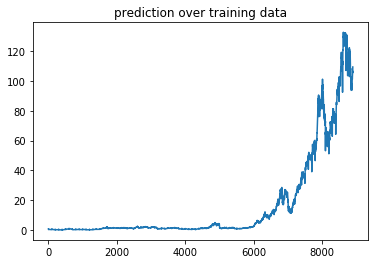

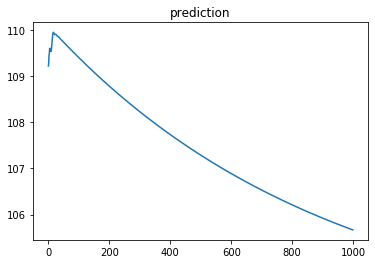

2560 	MSE 0.6078056


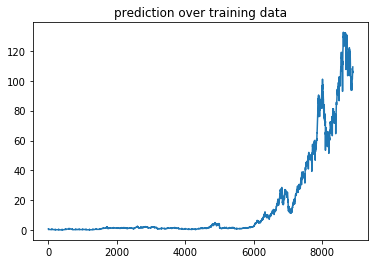

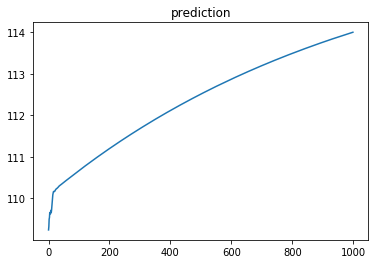

2580 	MSE 0.59003836


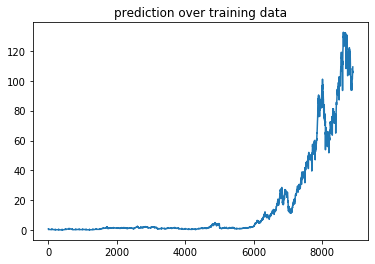

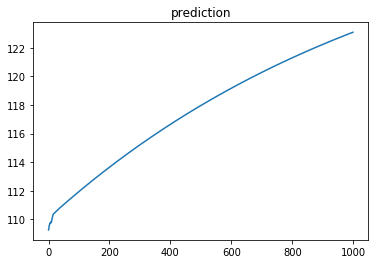

2600 	MSE 0.5730744


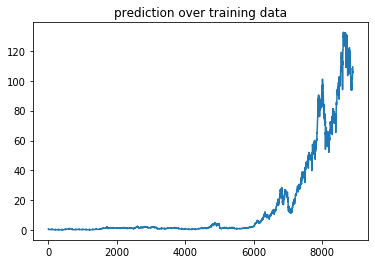

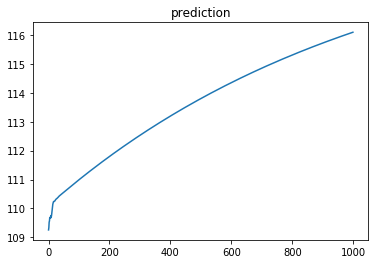

2620 	MSE 0.5570619


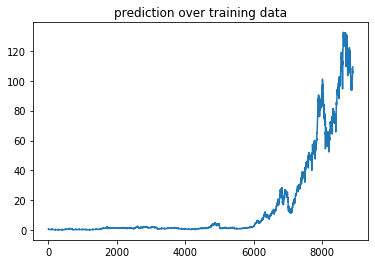

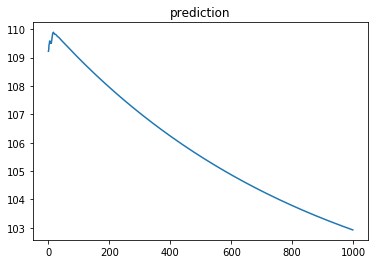

2640 	MSE 0.541774


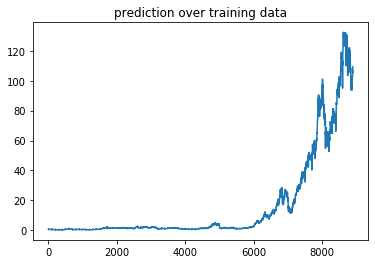

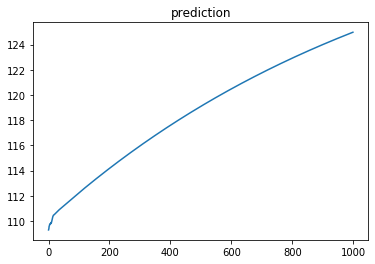

2660 	MSE 0.52724475


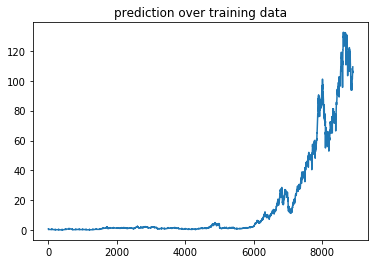

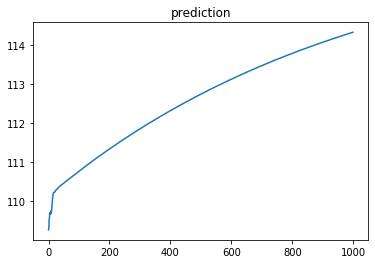

2680 	MSE 0.5137274


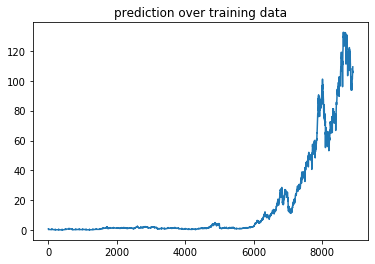

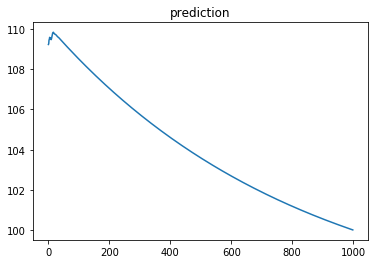

2700 	MSE 0.5007819


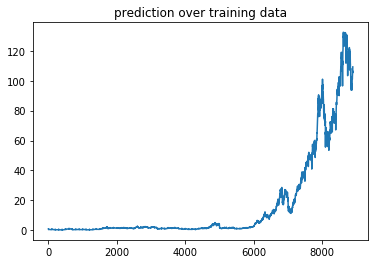

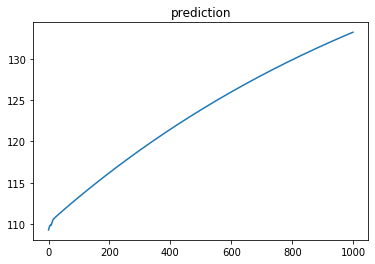

2720 	MSE 0.48856544


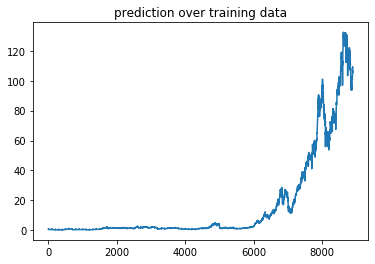

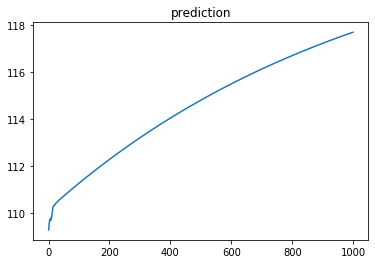

2740 	MSE 0.47703612


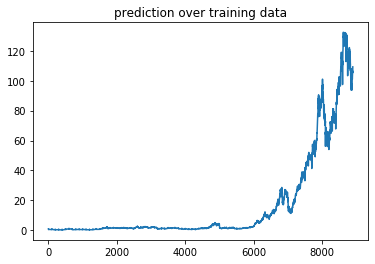

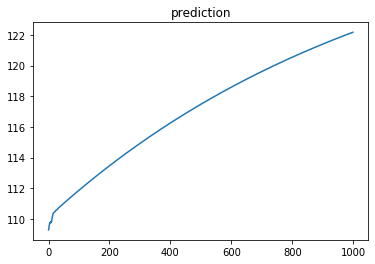

2760 	MSE 0.46646094


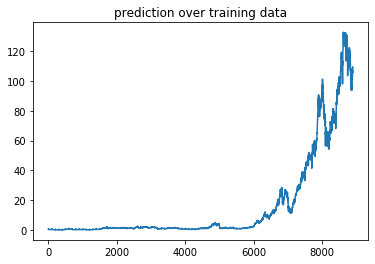

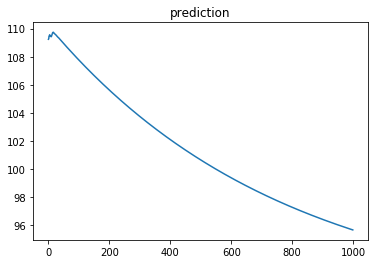

2780 	MSE 0.456089


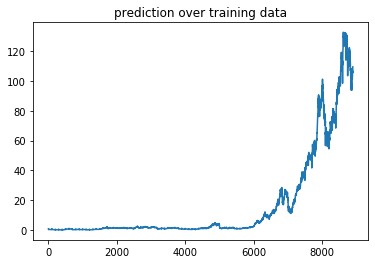

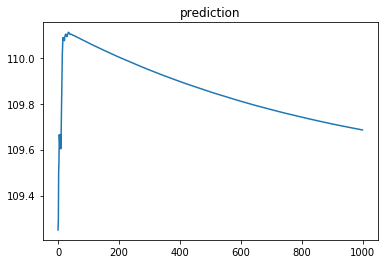

2800 	MSE 0.44650862


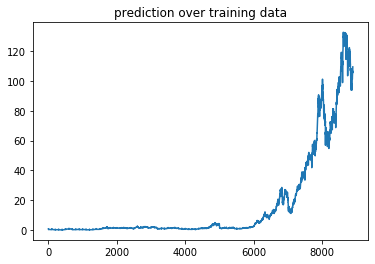

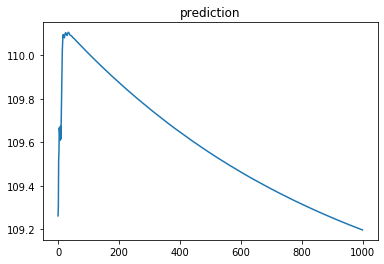

2820 	MSE 0.4374968


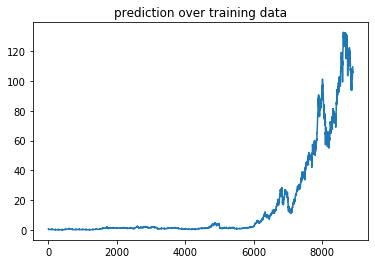

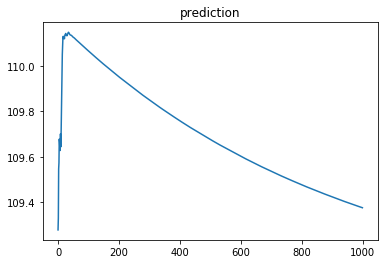

2840 	MSE 0.42920026


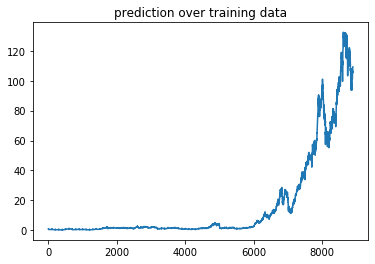

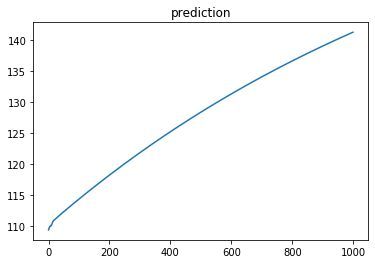

2860 	MSE 0.42120445


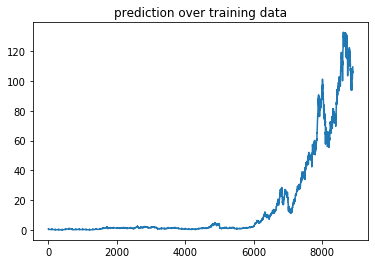

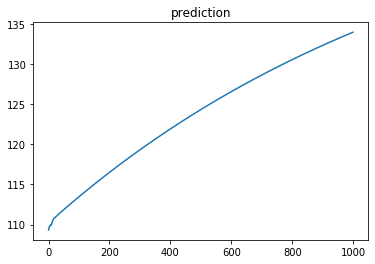

2880 	MSE 0.41399443


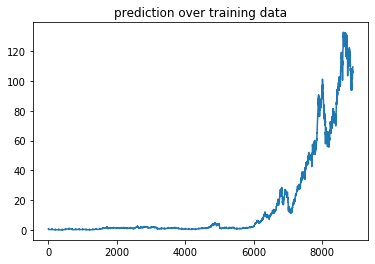

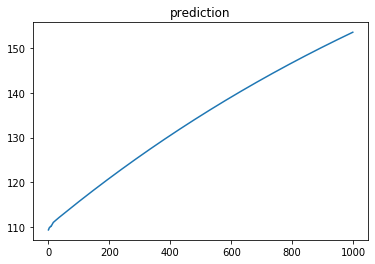

2900 	MSE 0.40698582


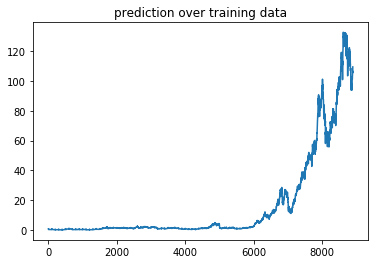

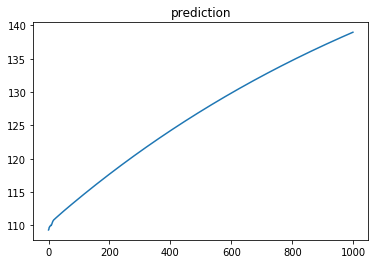

2920 	MSE 0.40042034


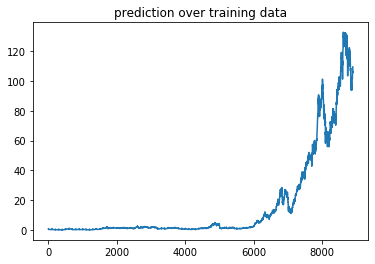

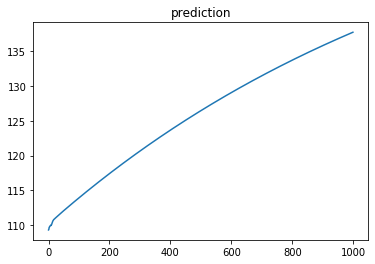

2940 	MSE 0.39447245


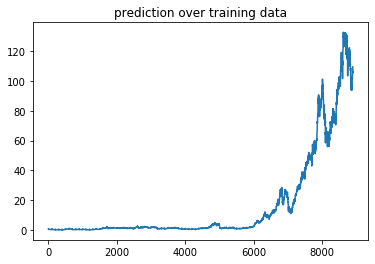

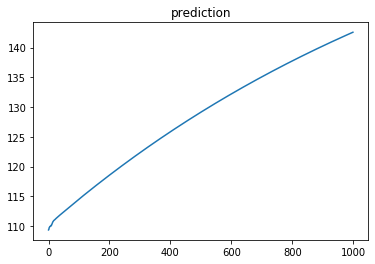

2960 	MSE 0.38890234


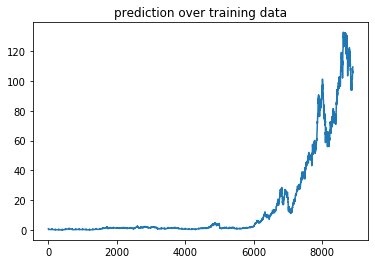

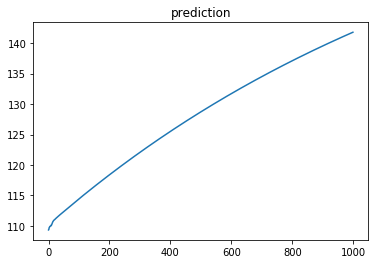

2980 	MSE 0.3836837


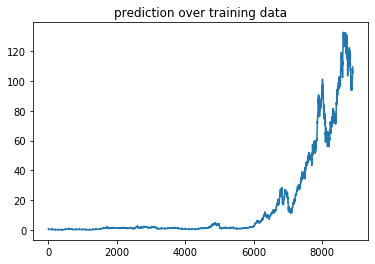

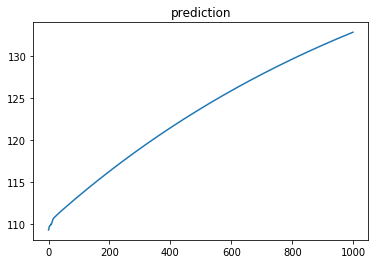

3000 	MSE 0.37887675


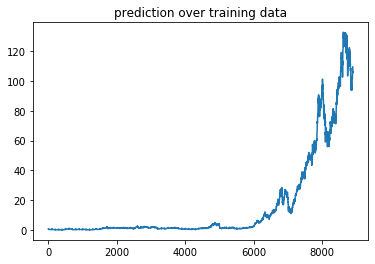

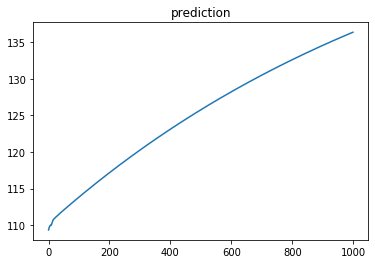

3020 	MSE 0.37448037


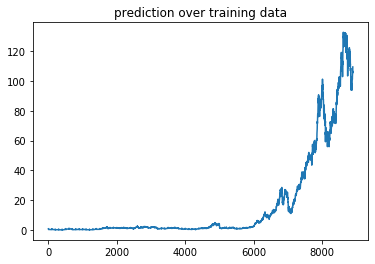

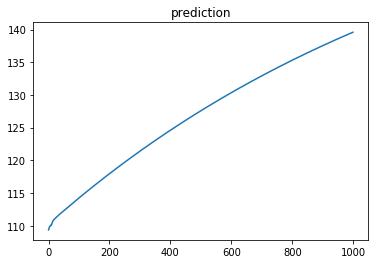

3040 	MSE 0.37032104


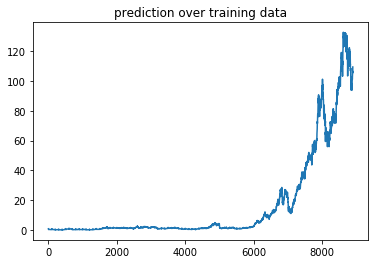

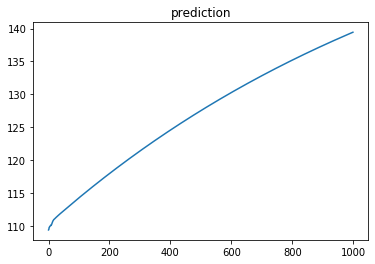

3060 	MSE 0.36649597


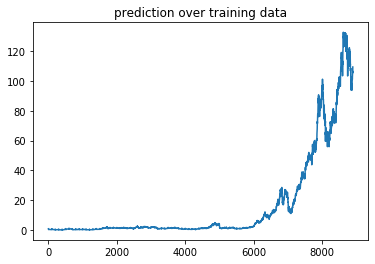

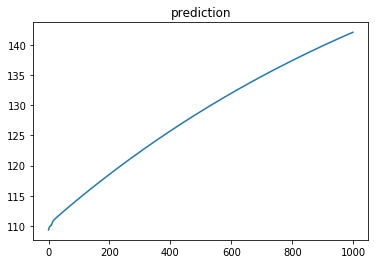

3080 	MSE 0.36287162


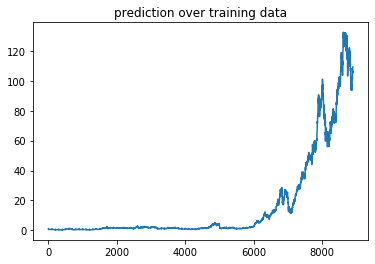

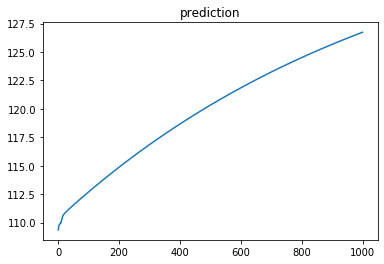

3100 	MSE 0.35958168


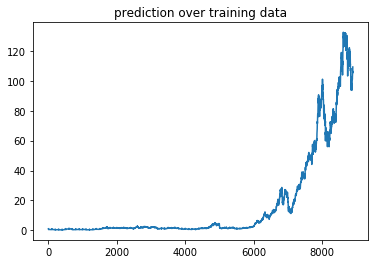

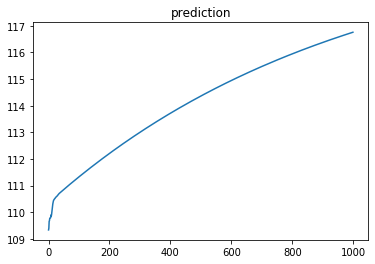

3120 	MSE 0.3566311


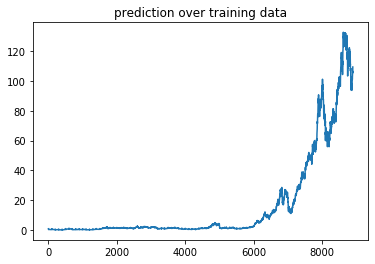

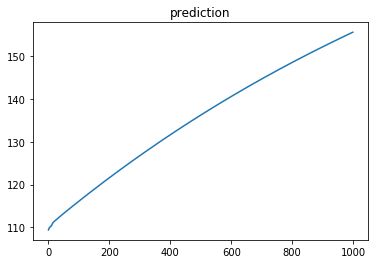

3140 	MSE 0.35367543


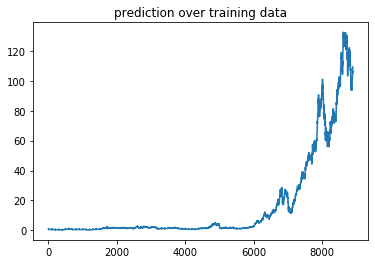

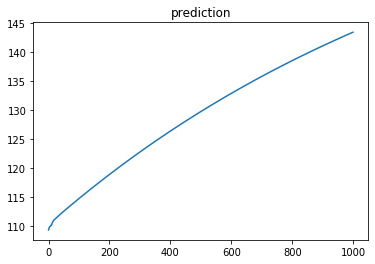

3160 	MSE 0.351049


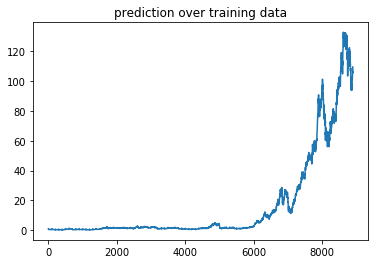

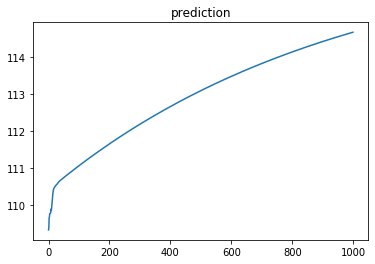

3180 	MSE 0.3487067


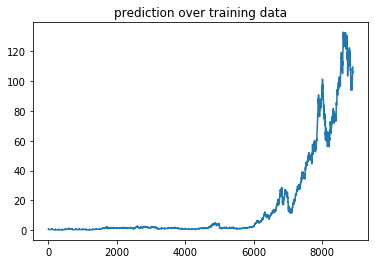

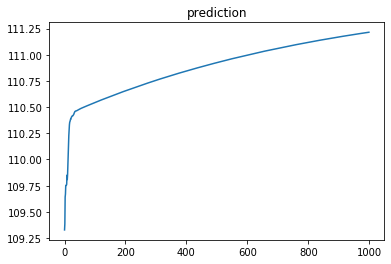

3200 	MSE 0.34644702


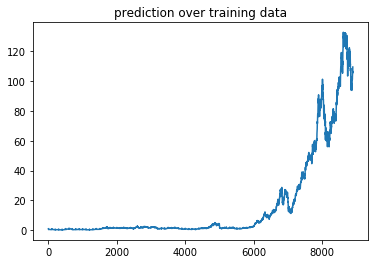

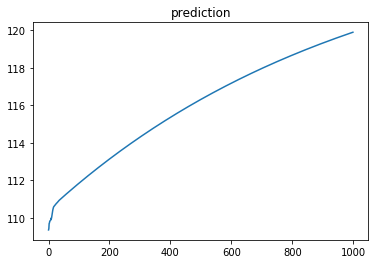

3220 	MSE 0.3444373


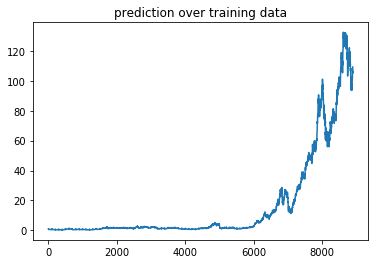

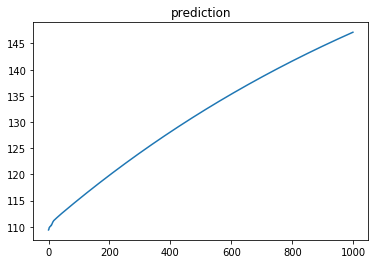

3240 	MSE 0.34254858


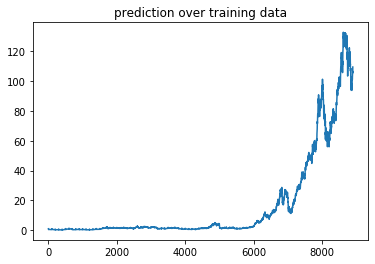

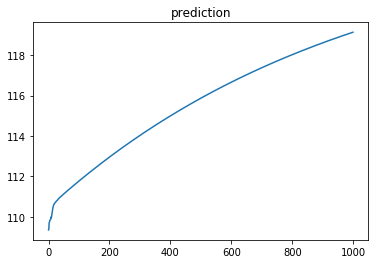

3260 	MSE 0.34092602


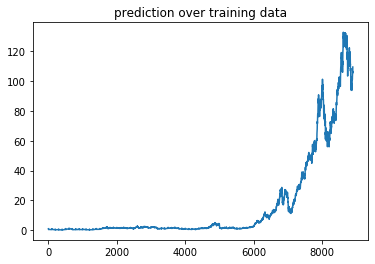

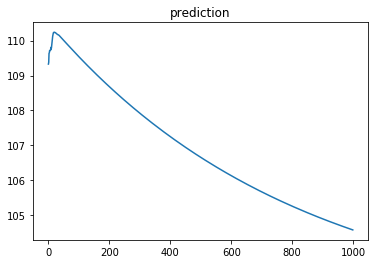

3280 	MSE 0.33923438


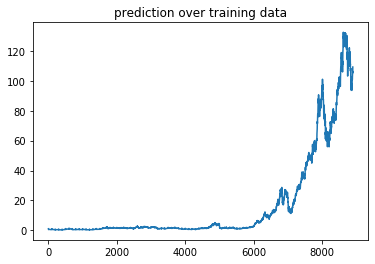

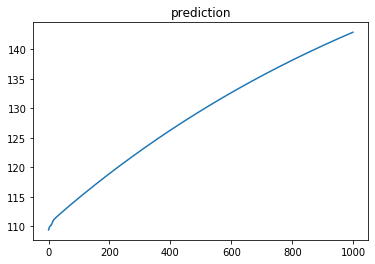

3300 	MSE 0.3378046


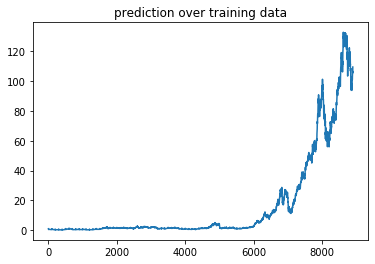

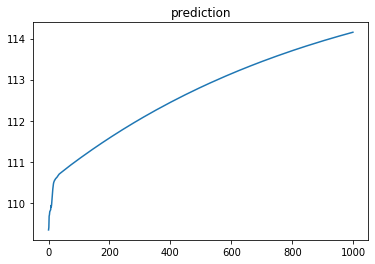

3320 	MSE 0.33645698


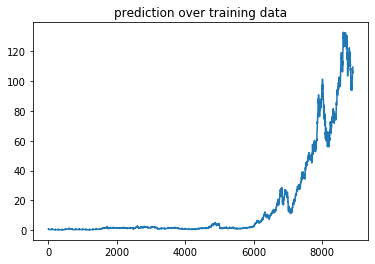

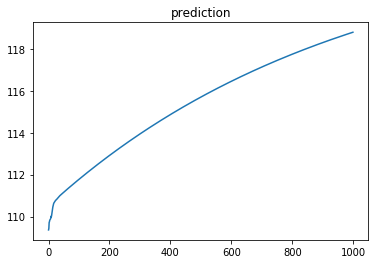

3340 	MSE 0.33533743


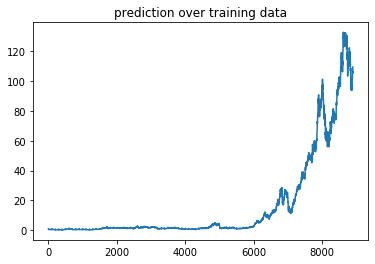

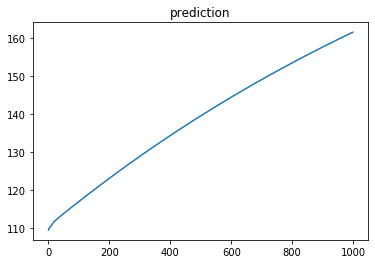

3360 	MSE 0.33449972


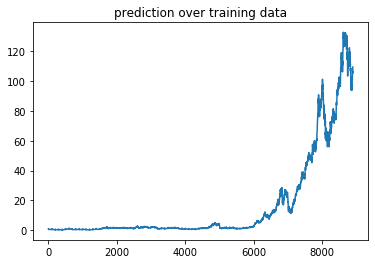

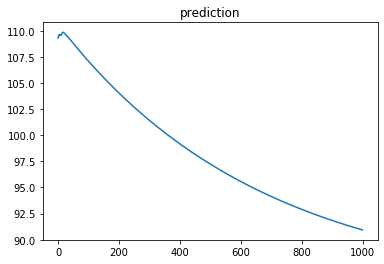

3380 	MSE 0.33302295


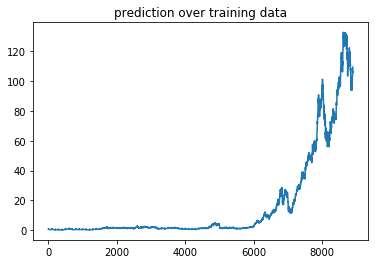

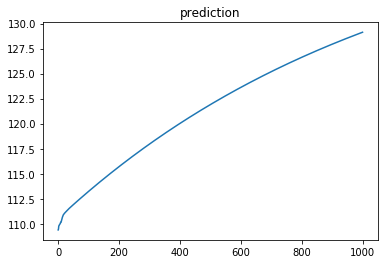

3400 	MSE 0.33217415


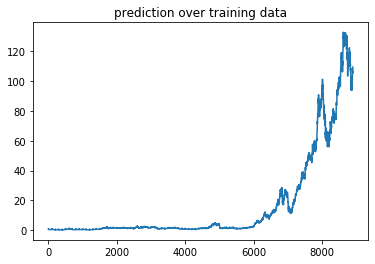

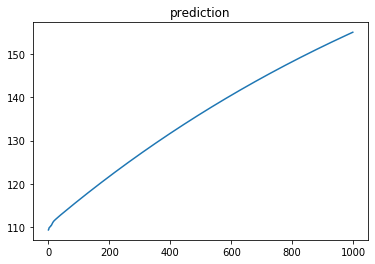

3420 	MSE 0.33162528


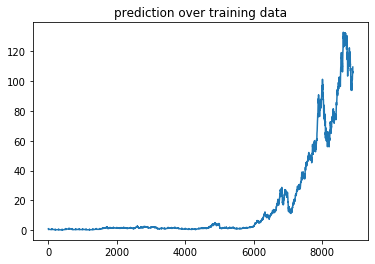

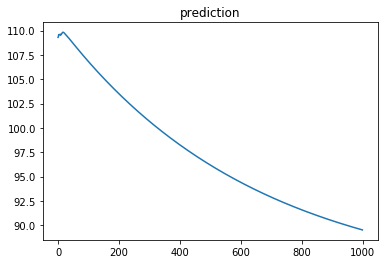

3440 	MSE 0.3304614


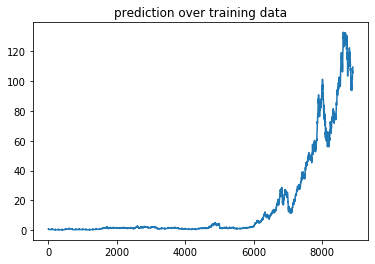

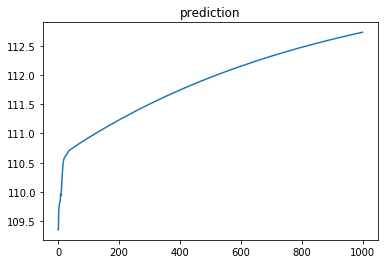

3460 	MSE 0.32966298


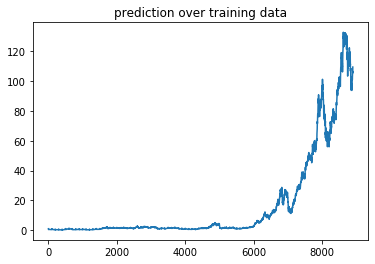

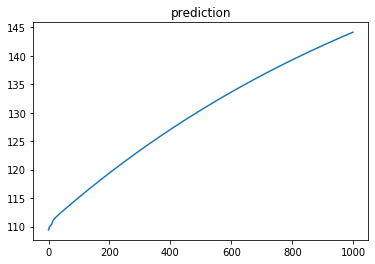

3480 	MSE 0.32897207


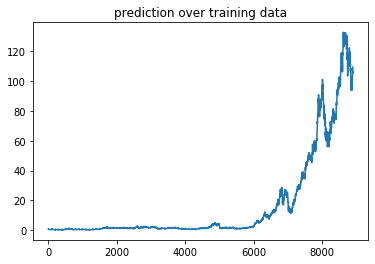

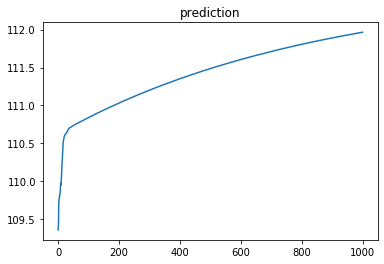

3500 	MSE 0.32838374


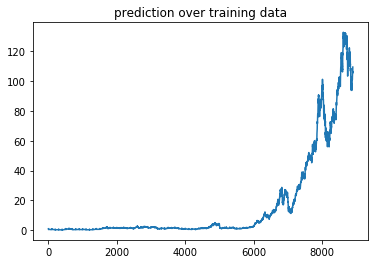

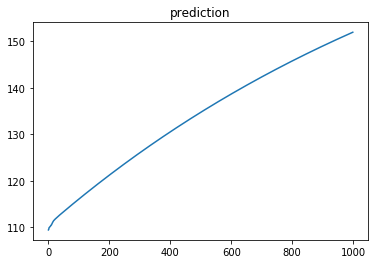

3520 	MSE 0.32771286


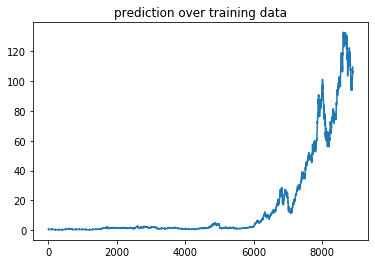

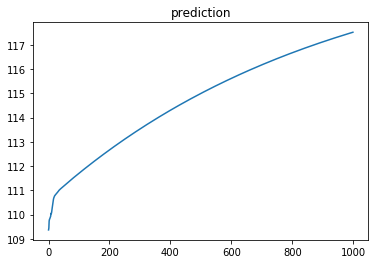

3540 	MSE 0.32712945


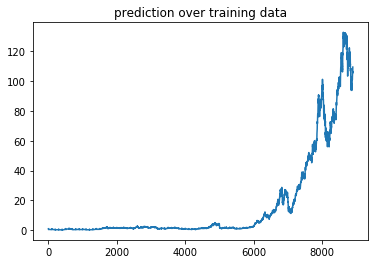

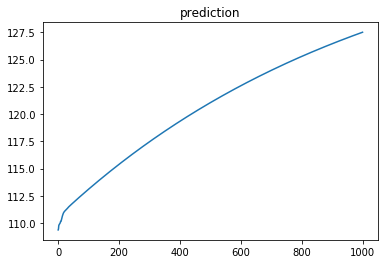

3560 	MSE 0.32663324


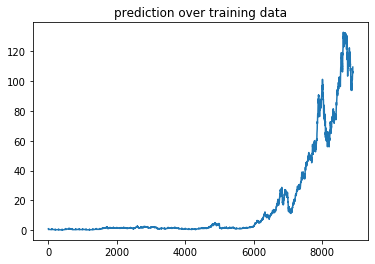

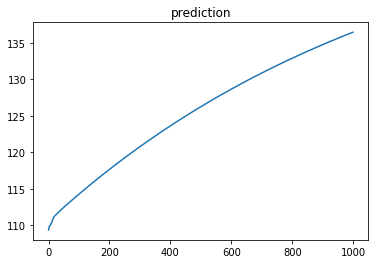

3580 	MSE 0.32618144


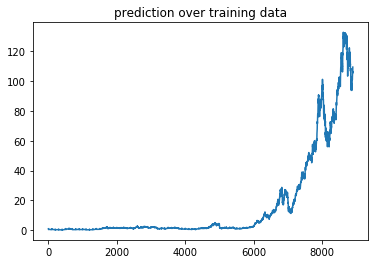

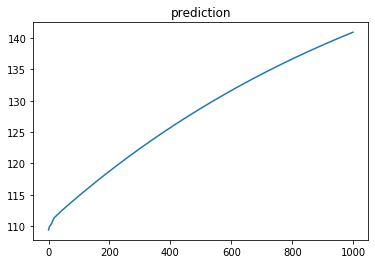

3600 	MSE 0.3257784


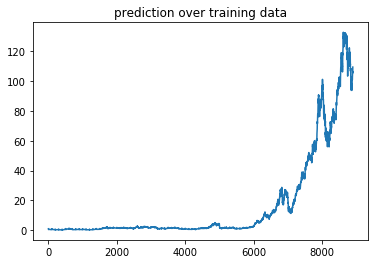

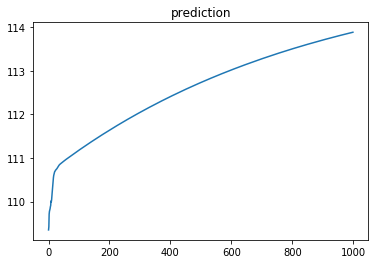

3620 	MSE 0.3253753


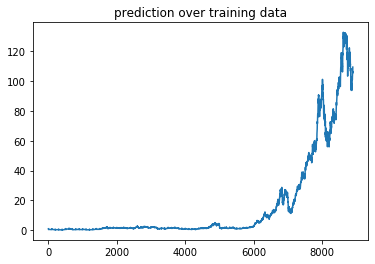

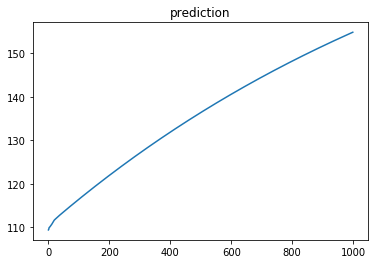

3640 	MSE 0.3250129


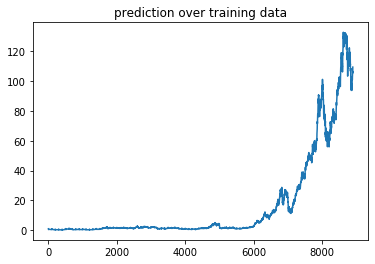

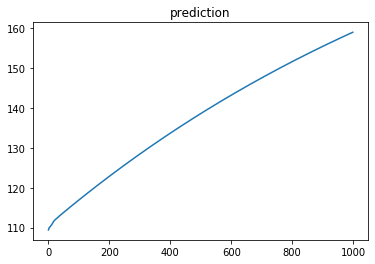

3660 	MSE 0.32452482


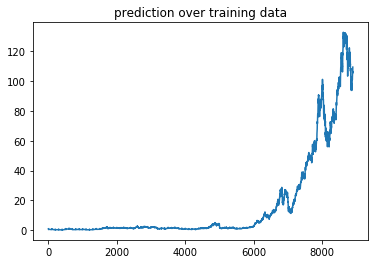

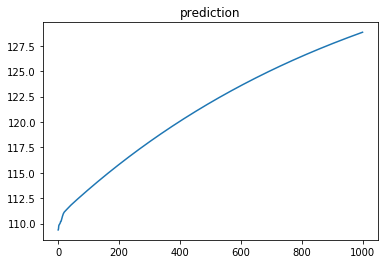

3680 	MSE 0.32504064


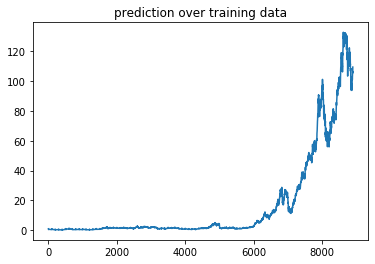

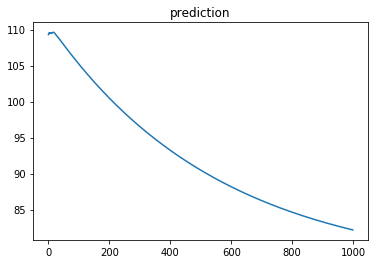

3700 	MSE 0.32391587


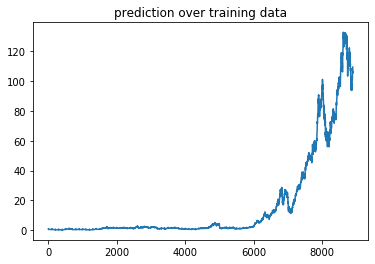

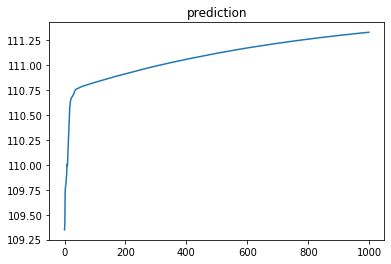

3720 	MSE 0.32369795


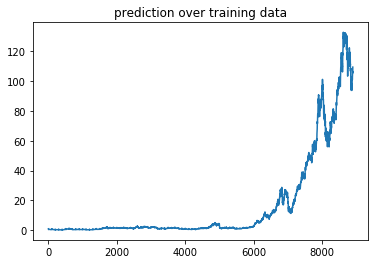

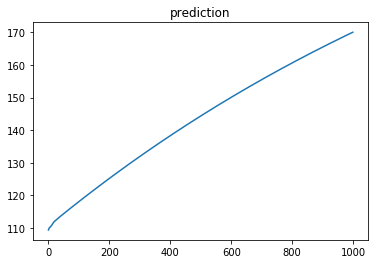

3740 	MSE 0.32322222


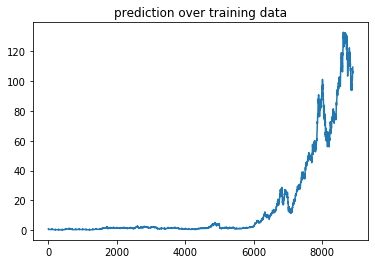

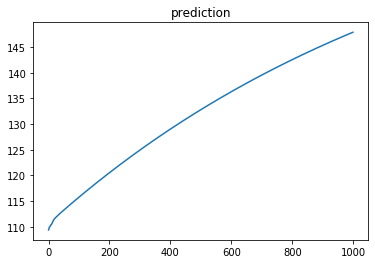

3760 	MSE 0.32313856


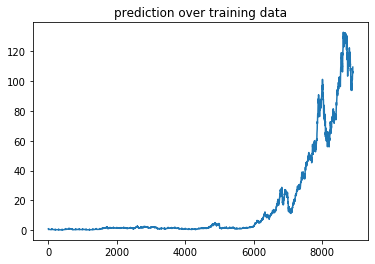

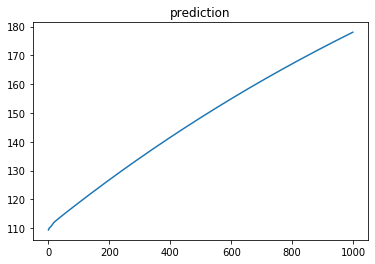

3780 	MSE 0.32301757


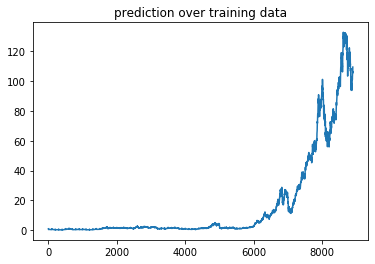

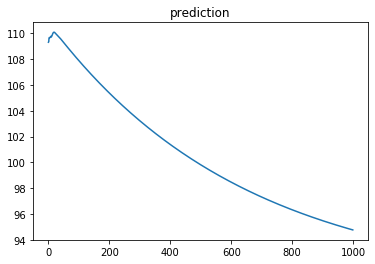

3800 	MSE 0.32228756


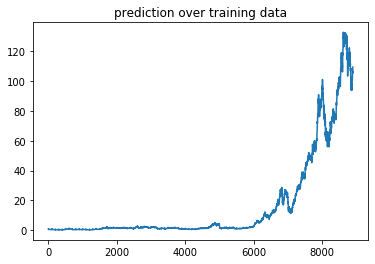

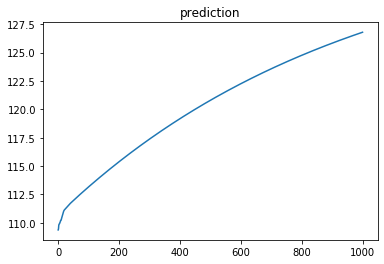

3820 	MSE 0.32195285


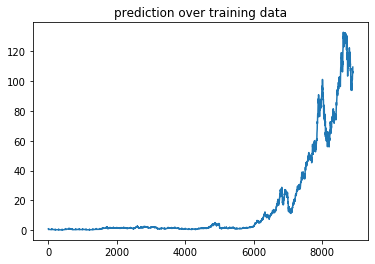

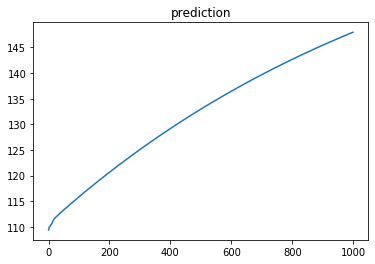

3840 	MSE 0.32166055


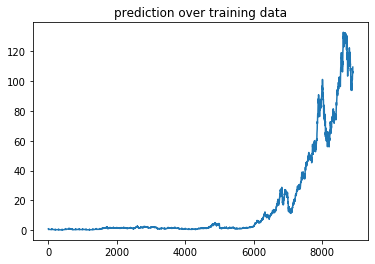

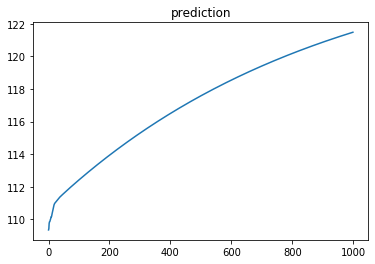

3860 	MSE 0.32136193


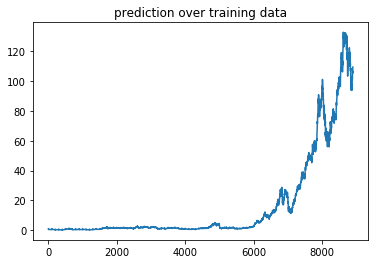

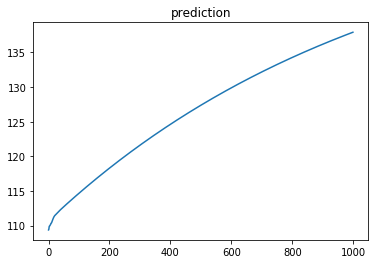

3880 	MSE 0.32123274


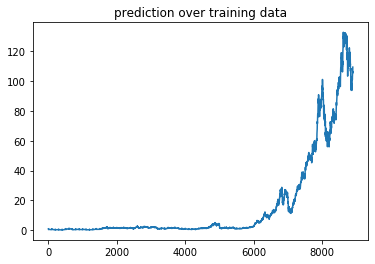

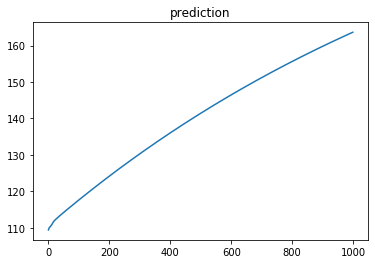

3900 	MSE 0.32074532


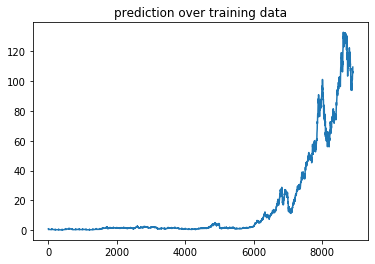

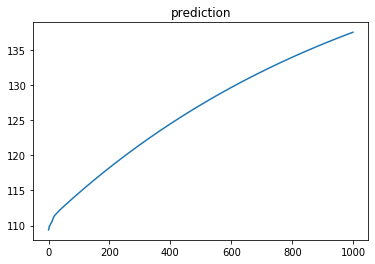

3920 	MSE 0.32100832


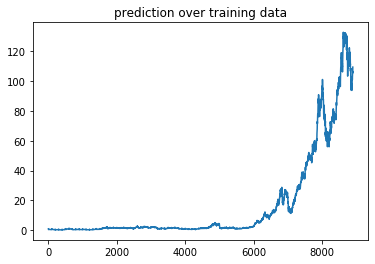

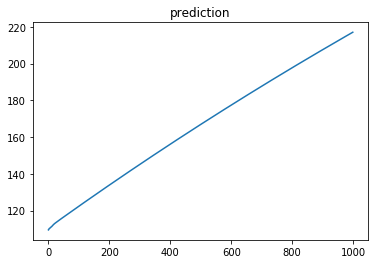

3940 	MSE 0.32029992


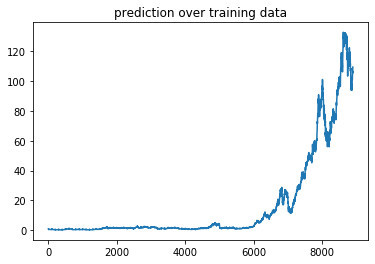

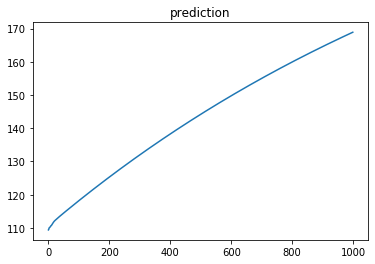

3960 	MSE 0.3199273


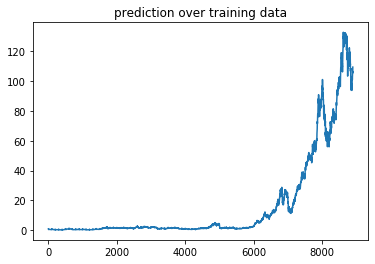

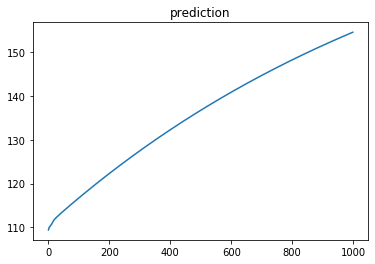

3980 	MSE 0.31955686


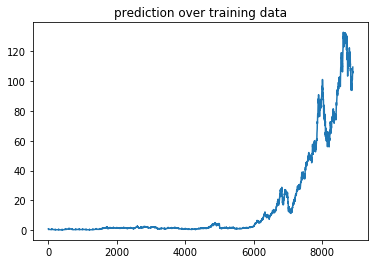

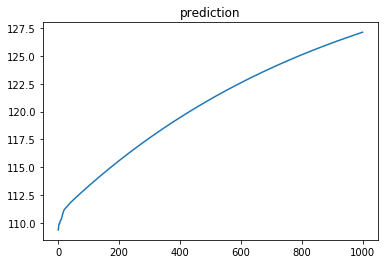

4000 	MSE 0.3191854


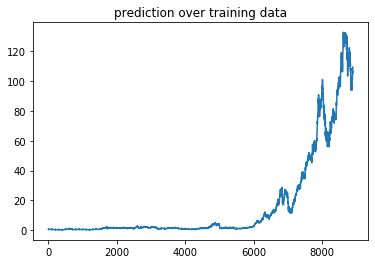

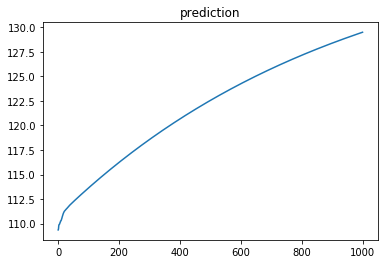

4020 	MSE 0.3195518


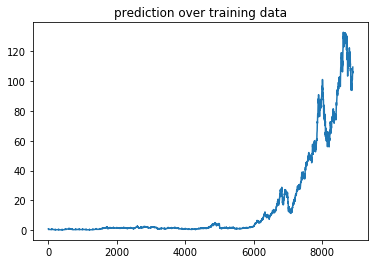

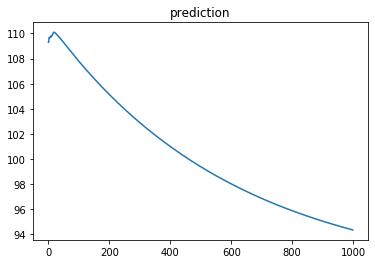

4040 	MSE 0.31876653


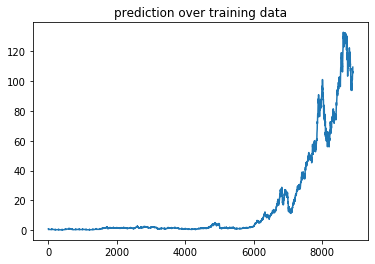

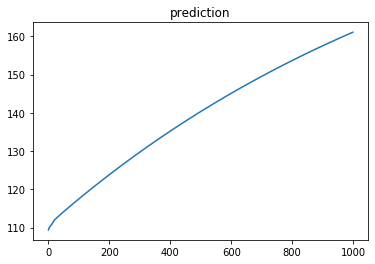

4060 	MSE 0.31848133


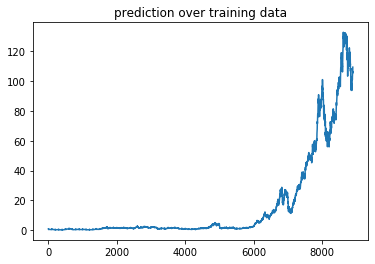

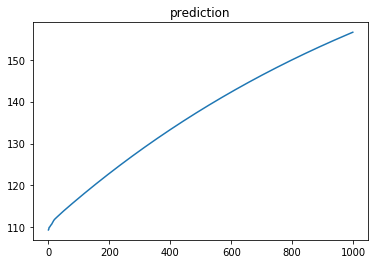

4080 	MSE 0.3186308


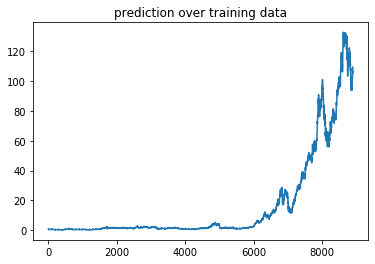

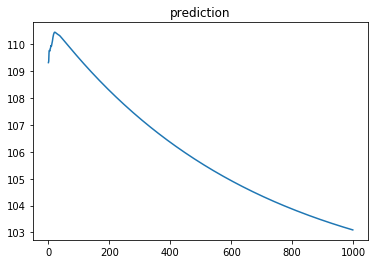

4100 	MSE 0.31836957


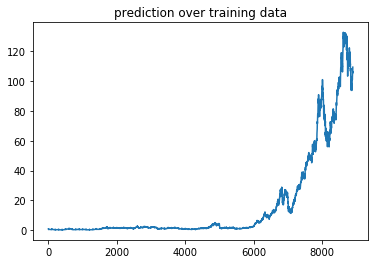

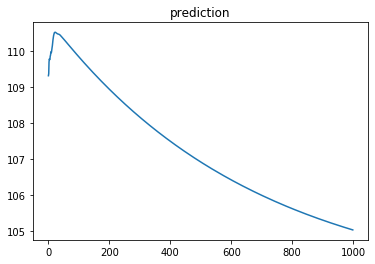

4120 	MSE 0.3179359


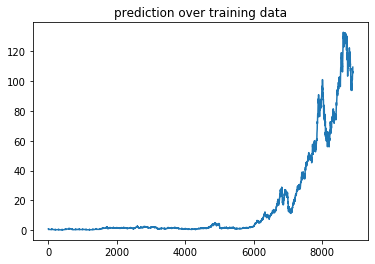

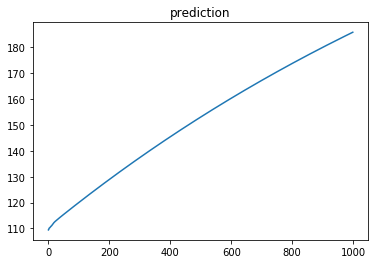

4140 	MSE 0.31754398


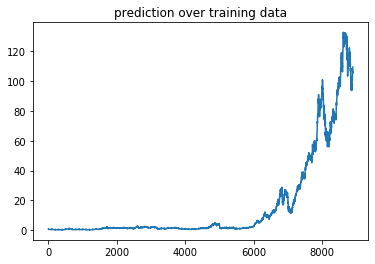

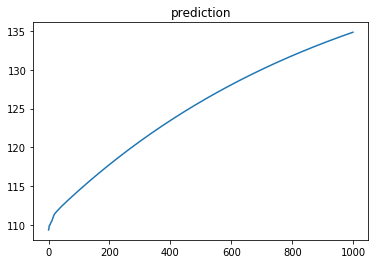

4160 	MSE 0.31733185


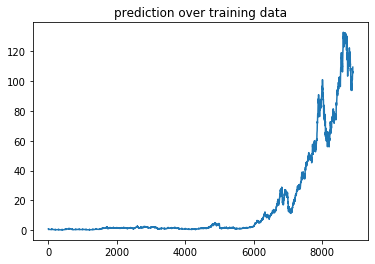

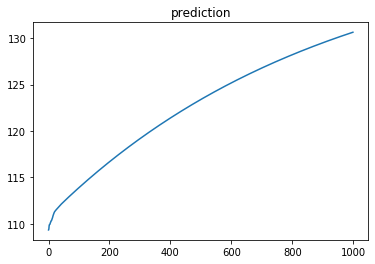

4180 	MSE 0.3170341


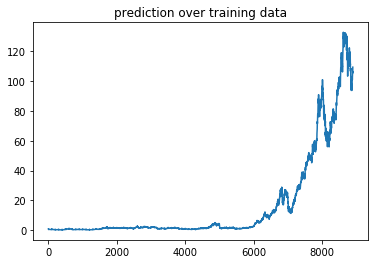

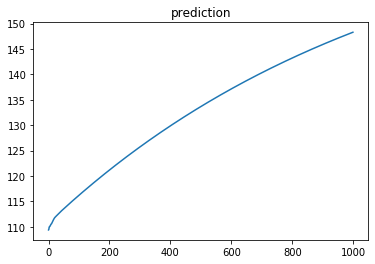

4200 	MSE 0.3170901


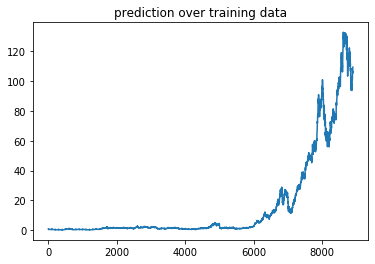

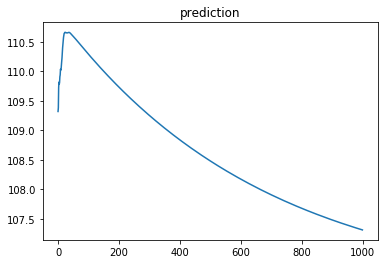

4220 	MSE 0.3163103


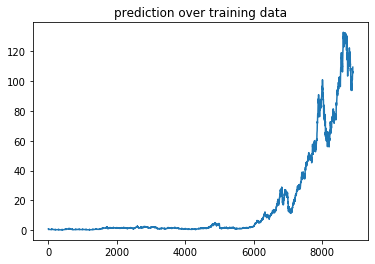

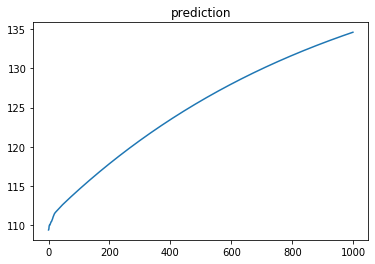

4240 	MSE 0.31598285


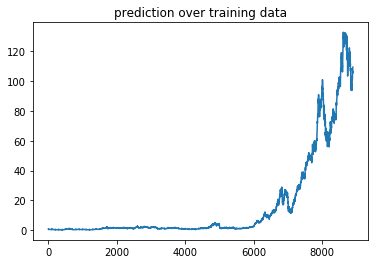

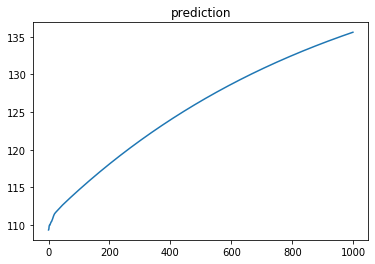

4260 	MSE 0.3157064


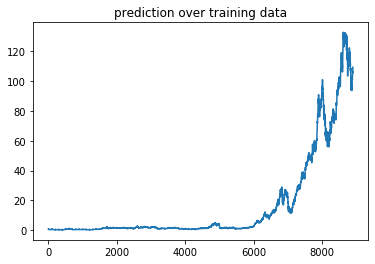

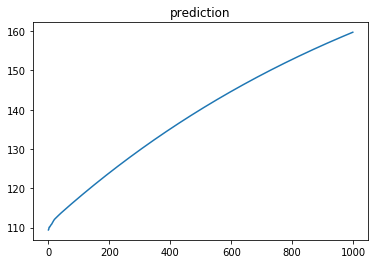

4280 	MSE 0.31552246


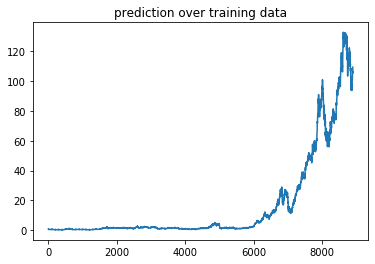

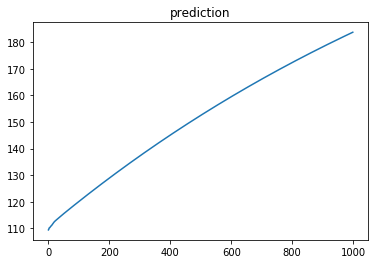

4300 	MSE 0.31499934


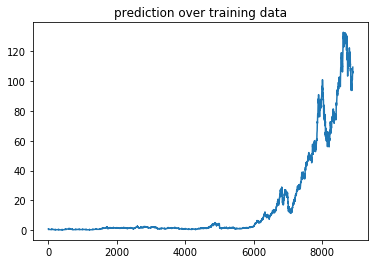

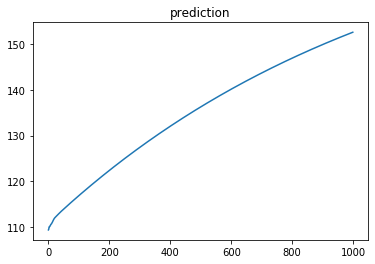

4320 	MSE 0.3152238


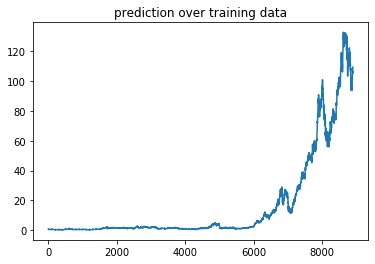

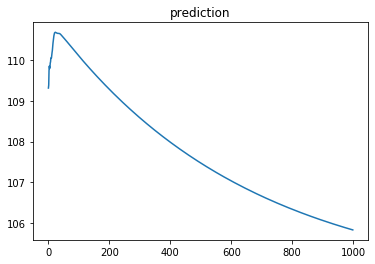

4340 	MSE 0.31461287


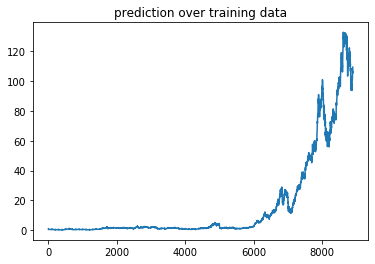

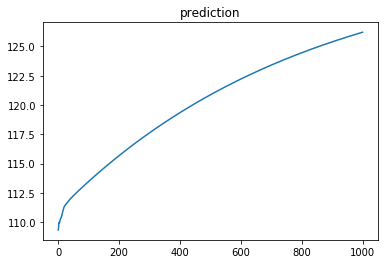

4360 	MSE 0.31458348


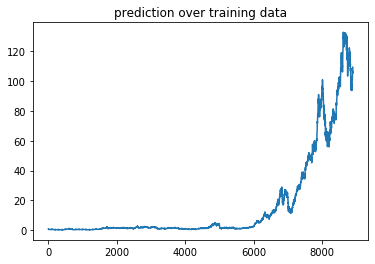

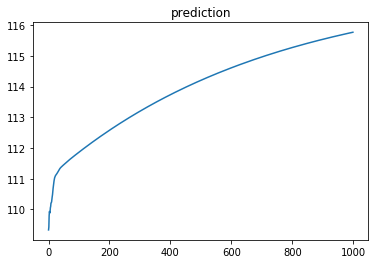

4380 	MSE 0.31405988


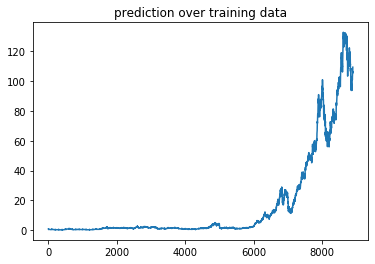

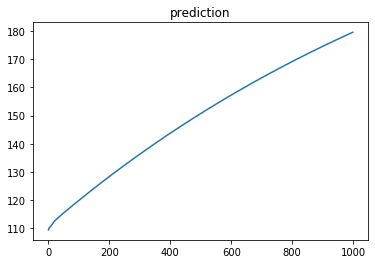

4400 	MSE 0.3136597


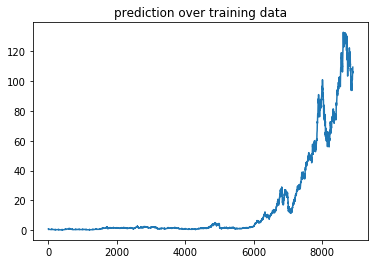

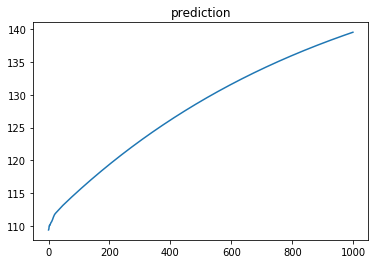

4420 	MSE 0.31354365


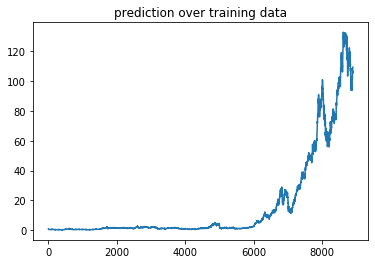

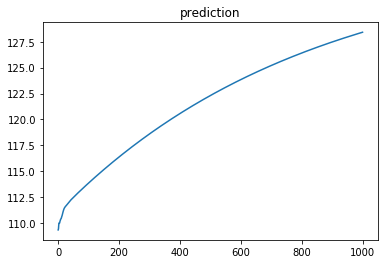

4440 	MSE 0.31317458


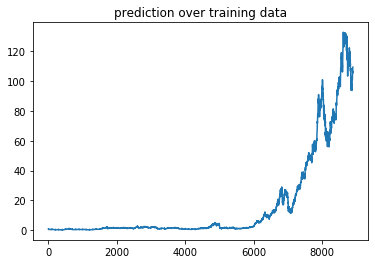

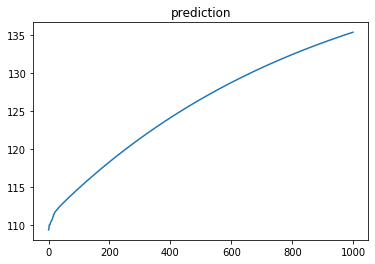

4460 	MSE 0.31334826


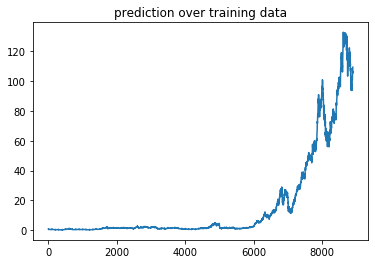

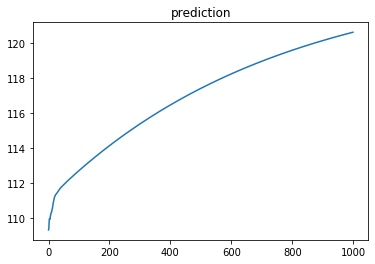

4480 	MSE 0.3130311


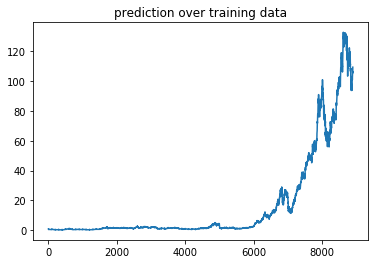

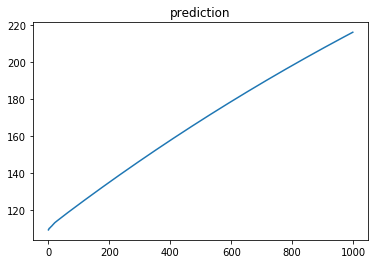

4500 	MSE 0.31303382


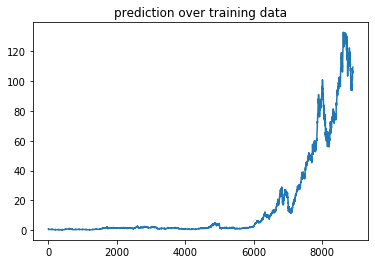

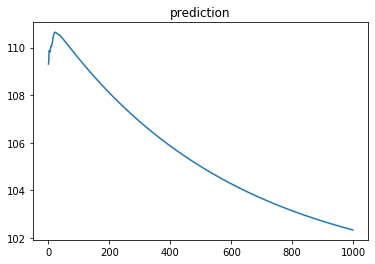

4520 	MSE 0.31222293


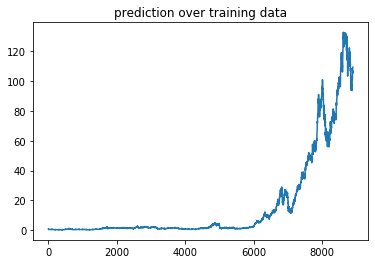

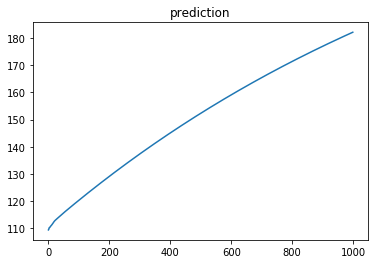

4540 	MSE 0.31203136


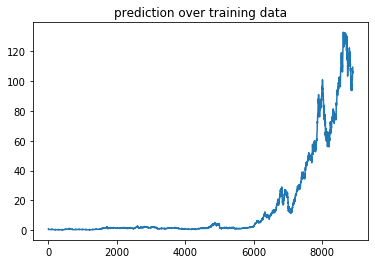

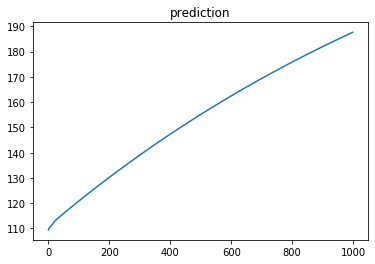

4560 	MSE 0.3117007


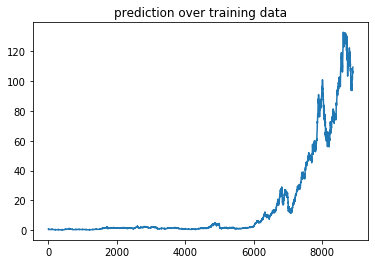

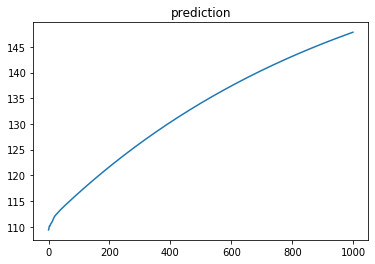

4580 	MSE 0.3119089


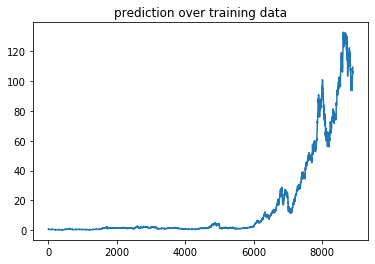

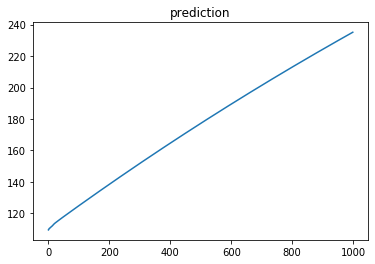

4600 	MSE 0.31137776


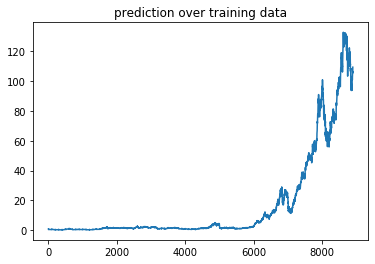

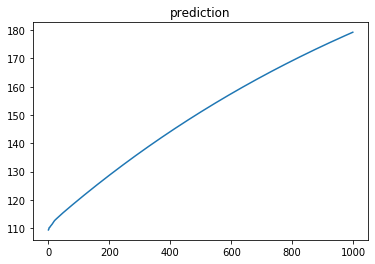

4620 	MSE 0.3110632


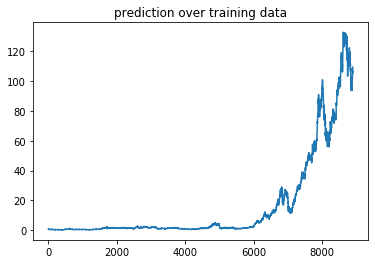

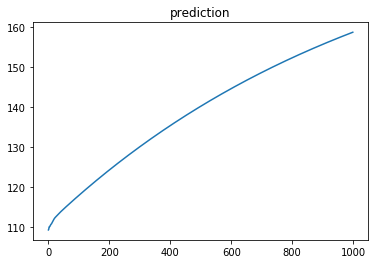

4640 	MSE 0.3108446


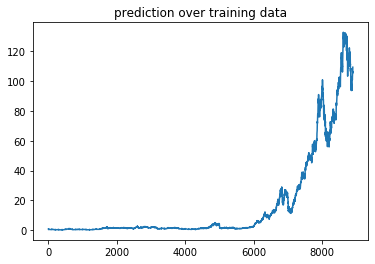

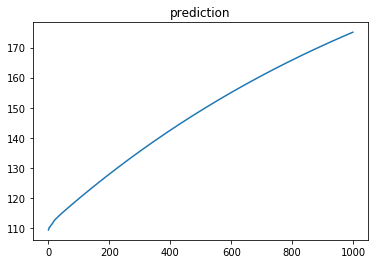

4660 	MSE 0.31277904


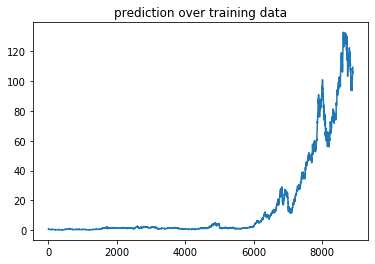

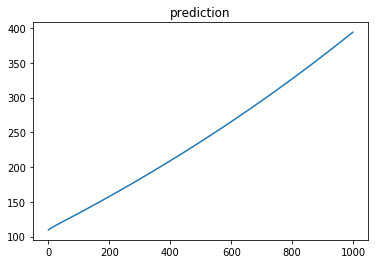

4680 	MSE 0.3107919


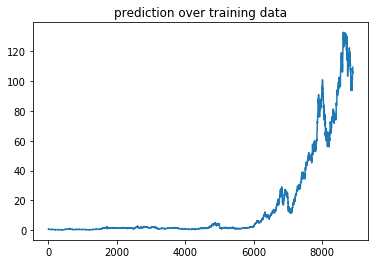

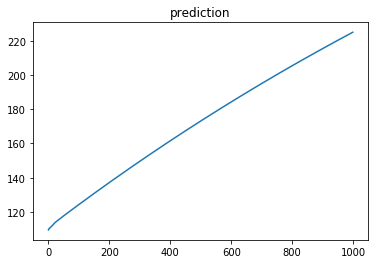

4700 	MSE 0.31040332


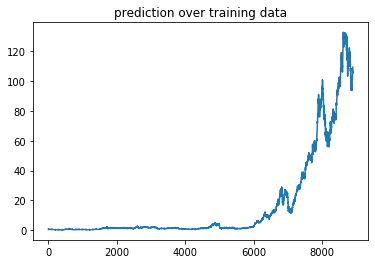

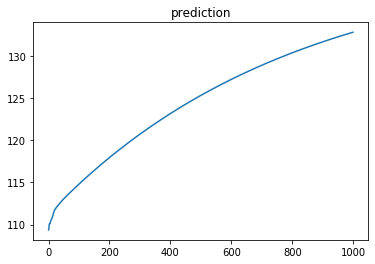

4720 	MSE 0.31040332


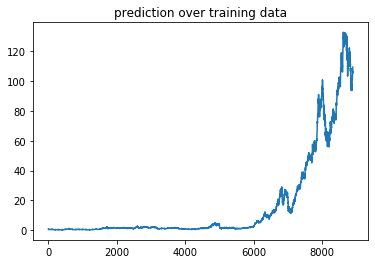

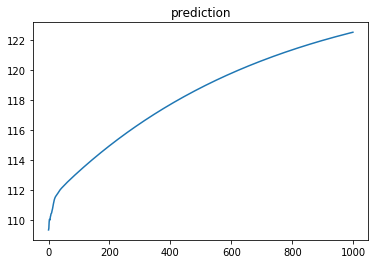

4740 	MSE 0.31004754


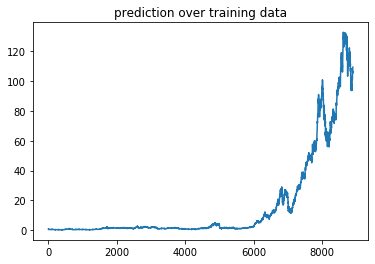

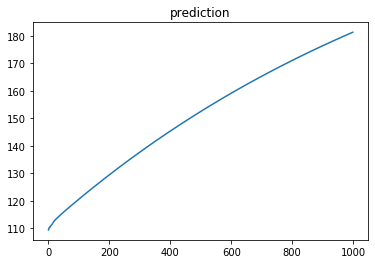

4760 	MSE 0.31115448


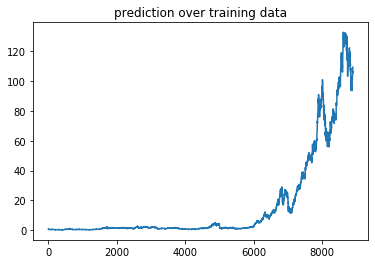

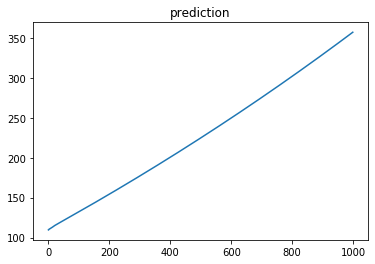

4780 	MSE 0.30998316


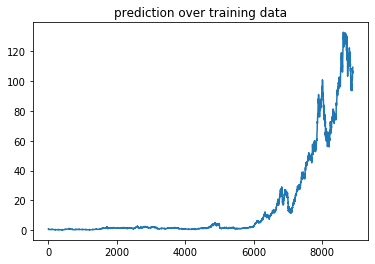

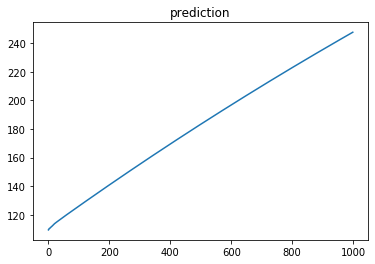

4800 	MSE 0.30935857


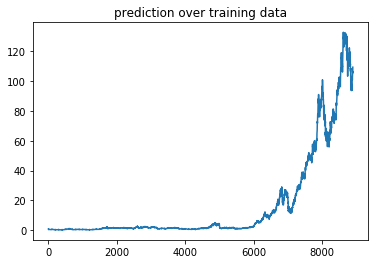

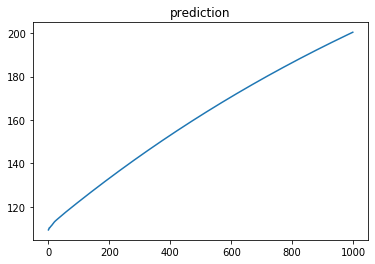

4820 	MSE 0.30907196


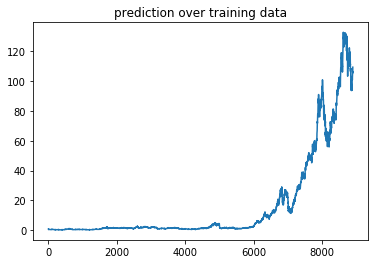

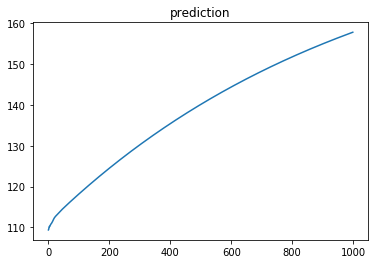

4840 	MSE 0.30918014


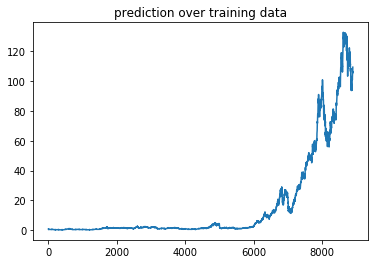

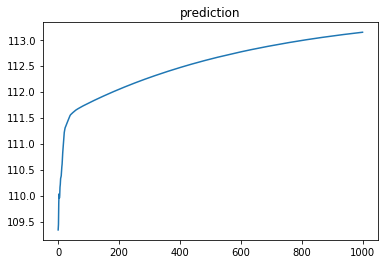

4860 	MSE 0.30880257


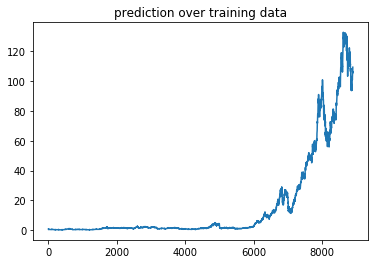

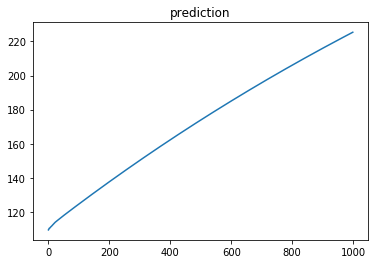

4880 	MSE 0.30969024


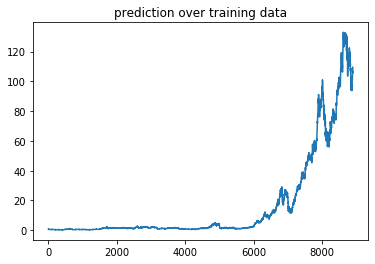

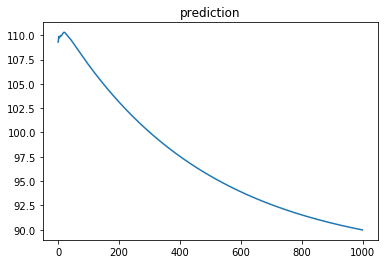

4900 	MSE 0.3081065


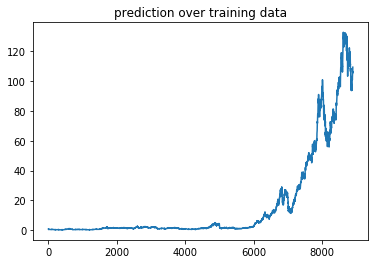

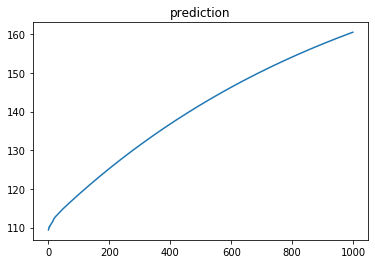

4920 	MSE 0.3082715


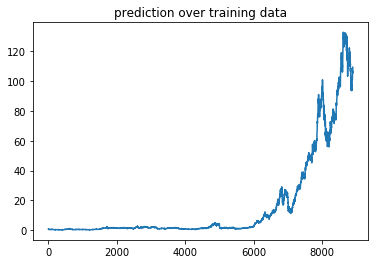

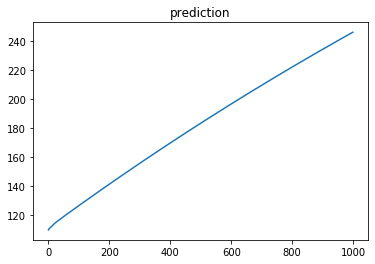

4940 	MSE 0.3078148


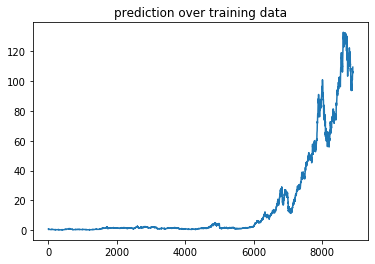

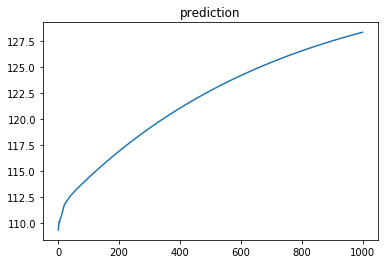

4960 	MSE 0.3077461


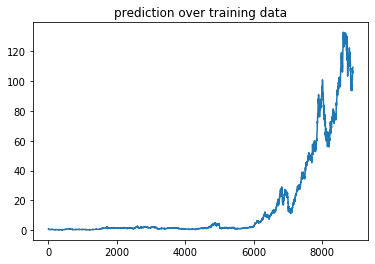

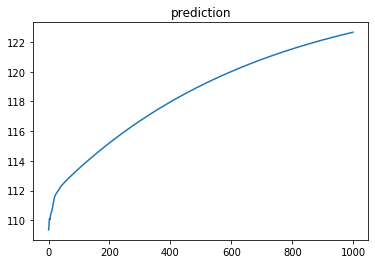

4980 	MSE 0.3072729


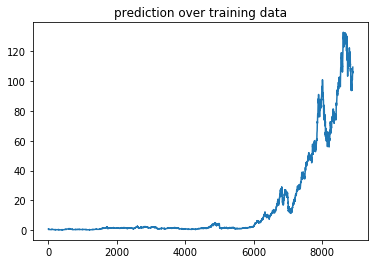

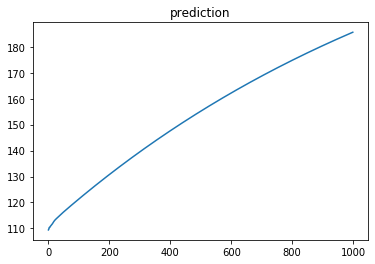

5000 	MSE 0.3090967


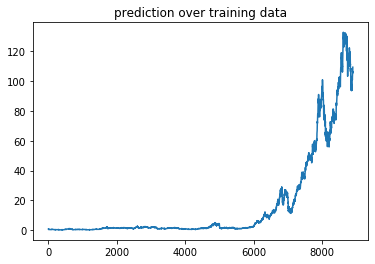

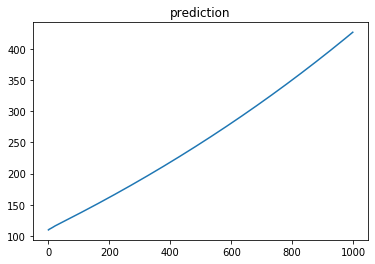

5020 	MSE 0.30731115


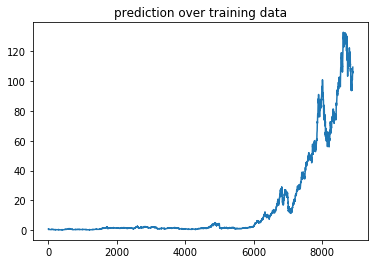

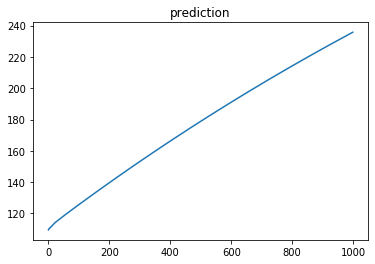

5040 	MSE 0.30664414


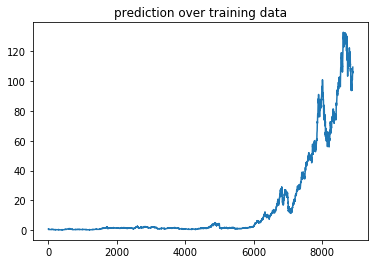

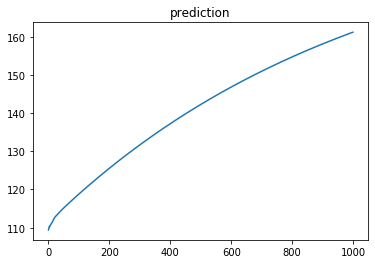

5060 	MSE 0.306619


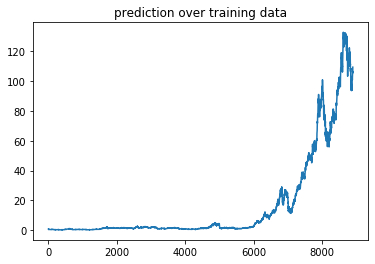

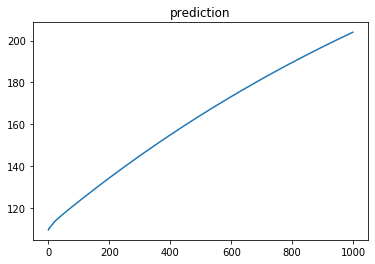

5080 	MSE 0.30808628


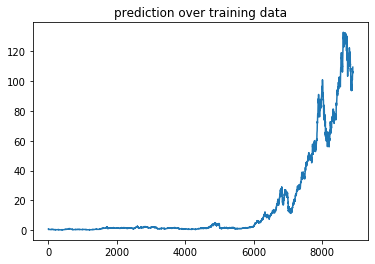

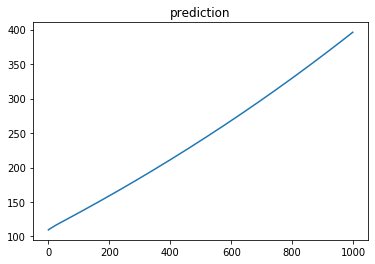

5100 	MSE 0.30635208


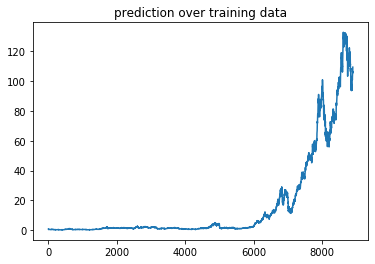

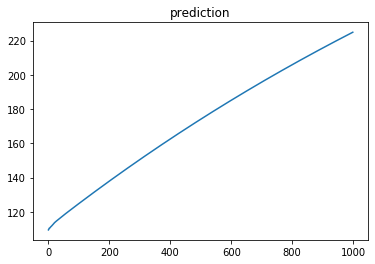

5120 	MSE 0.30583277


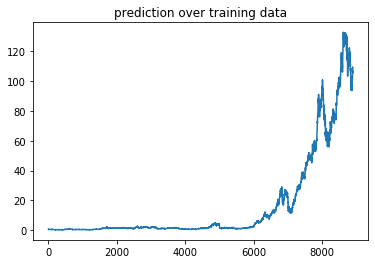

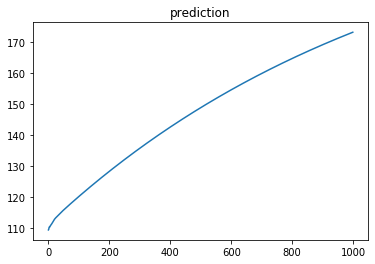

5140 	MSE 0.30561355


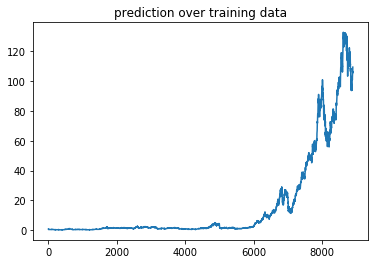

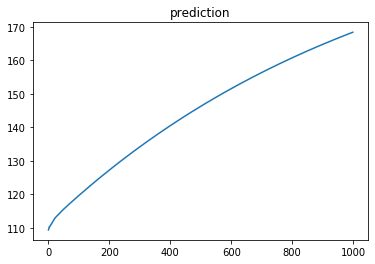

5160 	MSE 0.30561996


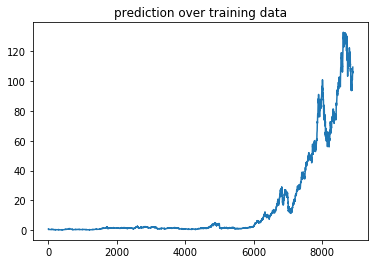

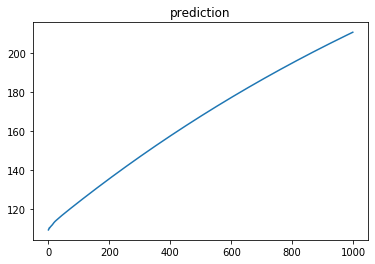

5180 	MSE 0.3059772


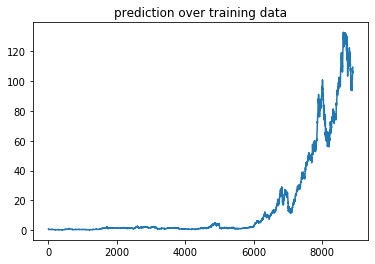

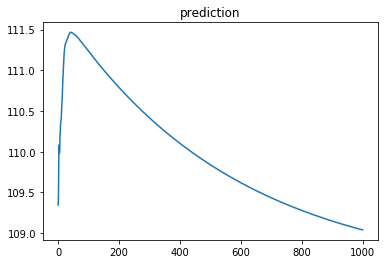

5200 	MSE 0.30509844


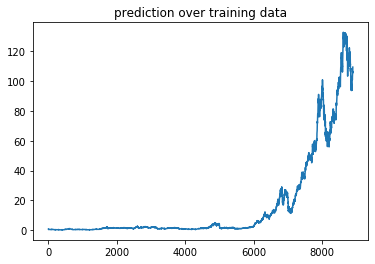

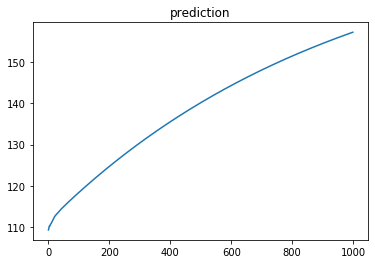

5220 	MSE 0.3049083


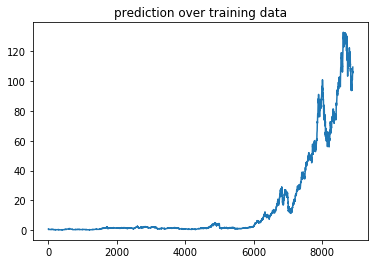

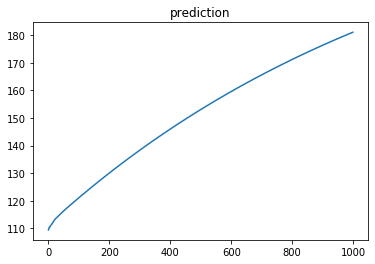

5240 	MSE 0.30506134


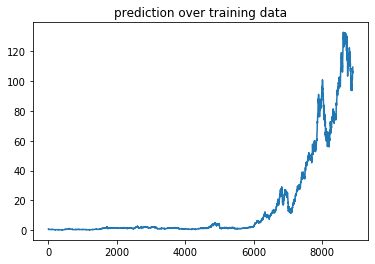

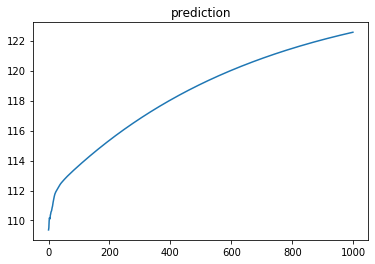

5260 	MSE 0.30561468


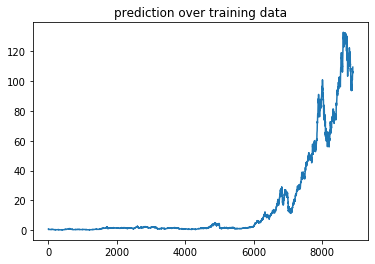

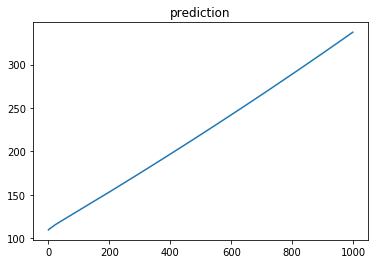

5280 	MSE 0.30479646


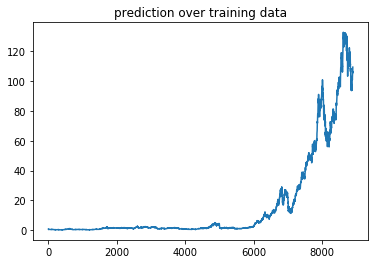

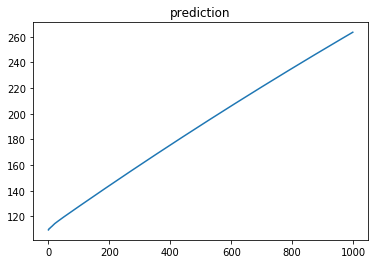

5300 	MSE 0.3043099


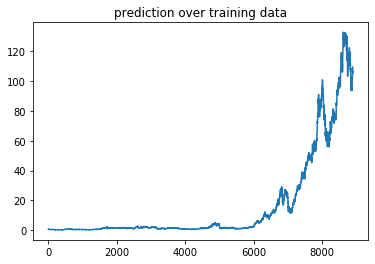

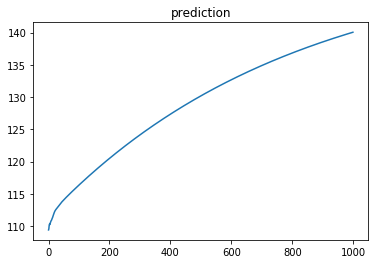

5320 	MSE 0.3044134


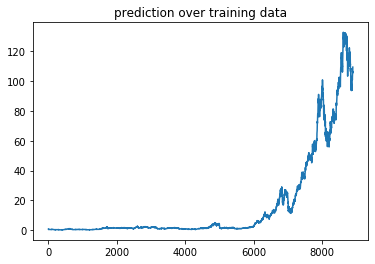

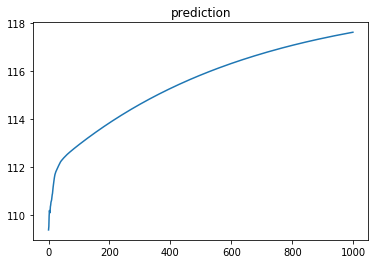

5340 	MSE 0.30416974


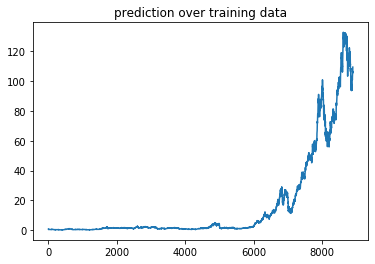

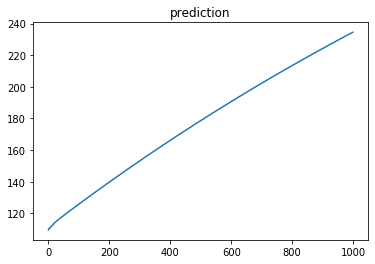

5360 	MSE 0.30366954


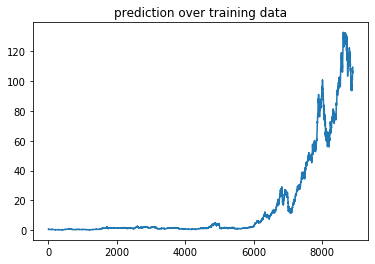

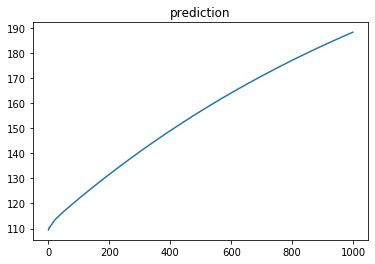

5380 	MSE 0.30342674


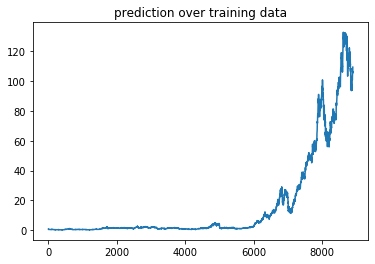

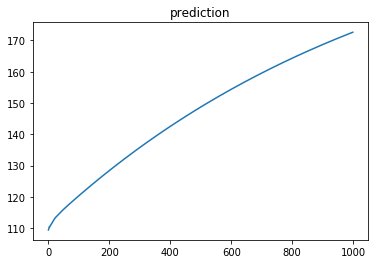

5400 	MSE 0.3035114


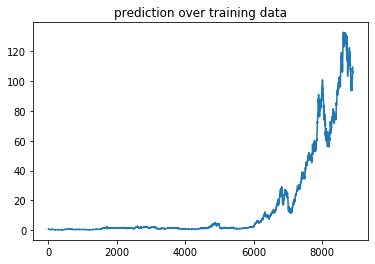

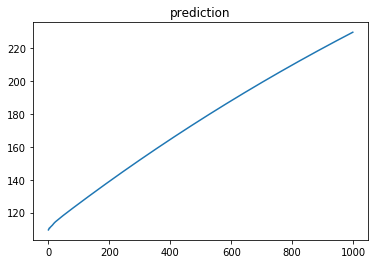

5420 	MSE 0.3032099


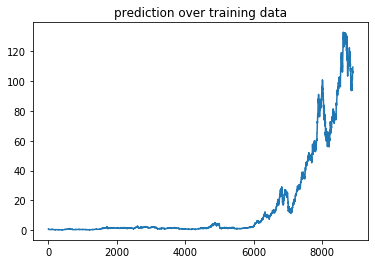

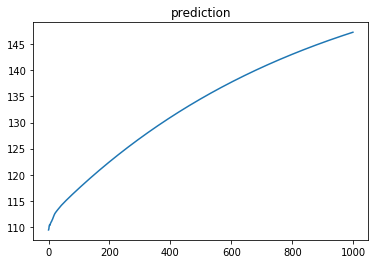

5440 	MSE 0.30318558


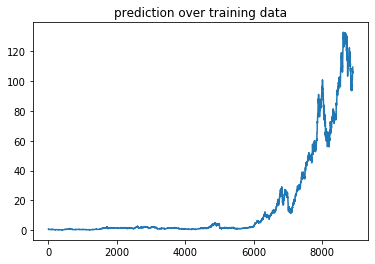

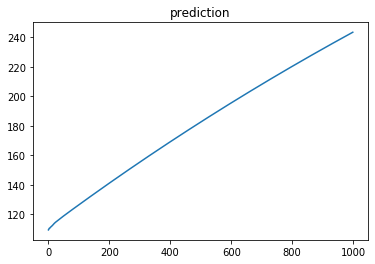

5460 	MSE 0.30280793


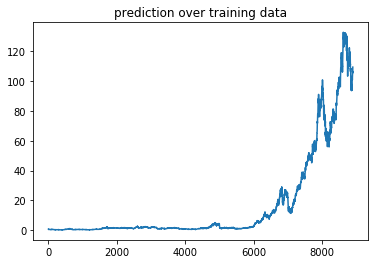

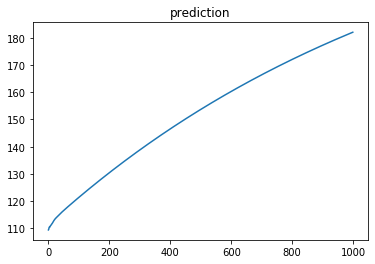

5480 	MSE 0.3044094


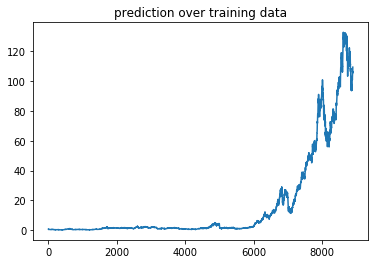

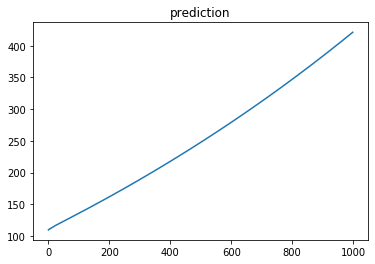

5500 	MSE 0.30245215


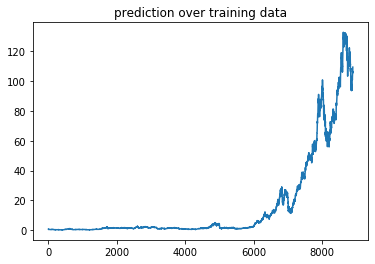

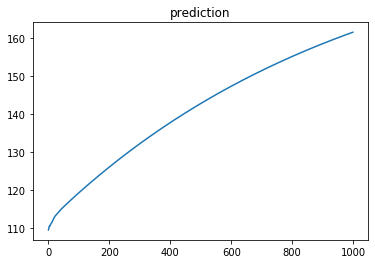

5520 	MSE 0.30230883


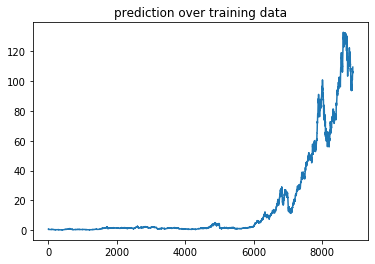

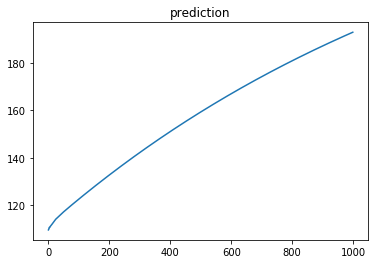

5540 	MSE 0.30235118


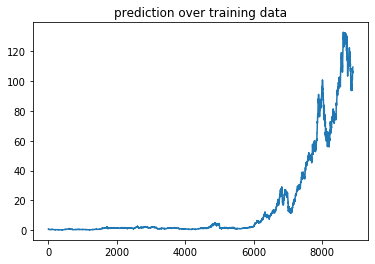

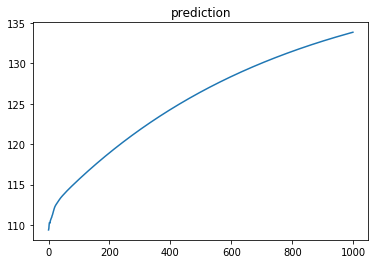

5560 	MSE 0.3025147


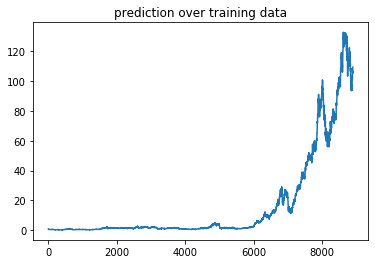

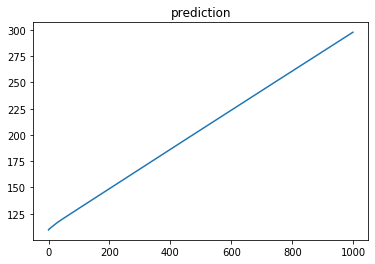

5580 	MSE 0.30354103


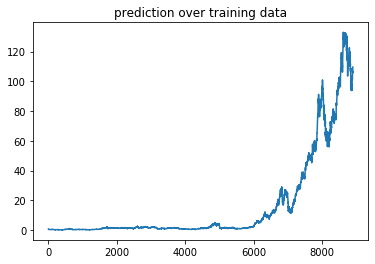

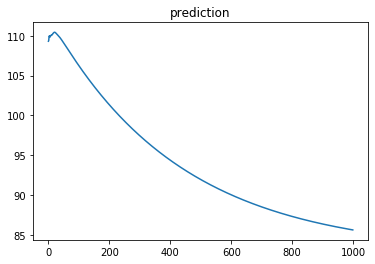

5600 	MSE 0.30183303


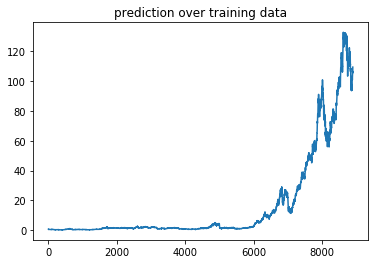

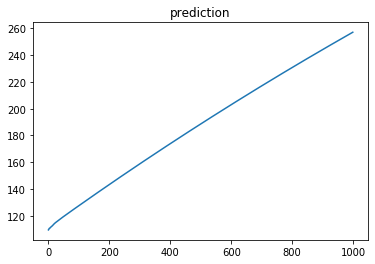

5620 	MSE 0.3014824


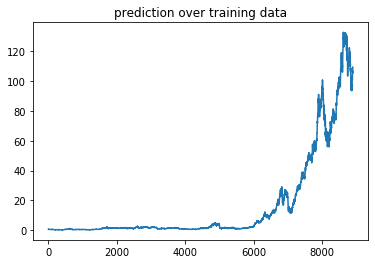

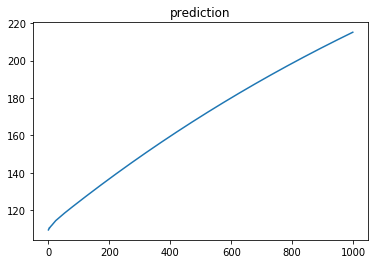

5640 	MSE 0.30223662


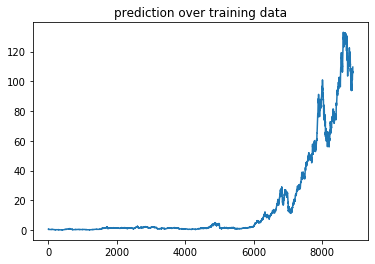

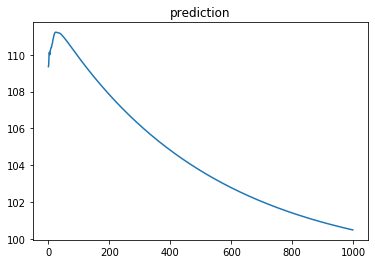

5660 	MSE 0.30205968


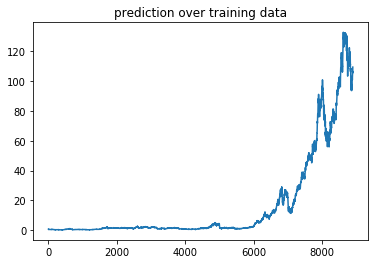

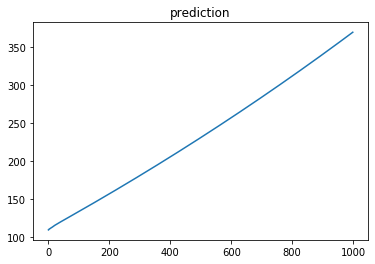

5680 	MSE 0.30160323


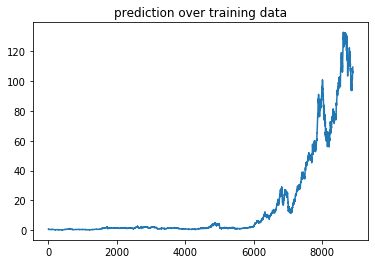

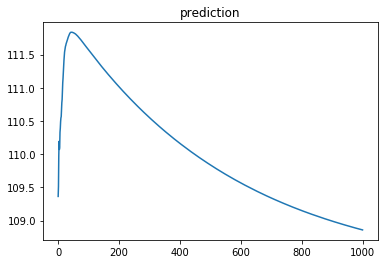

5700 	MSE 0.302351


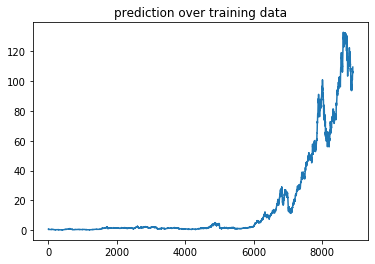

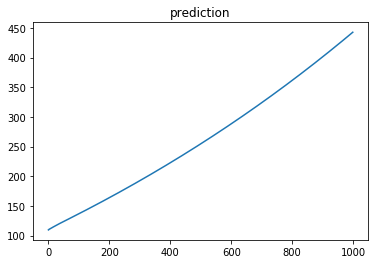

5720 	MSE 0.301823


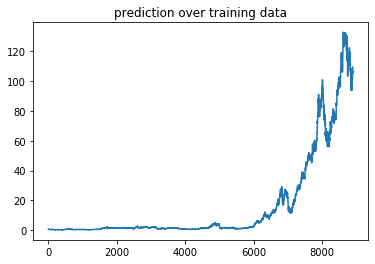

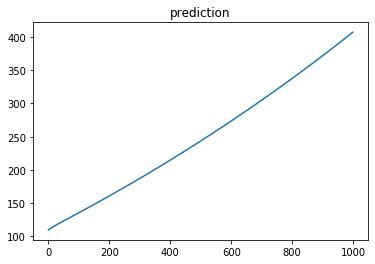

5740 	MSE 0.3003222


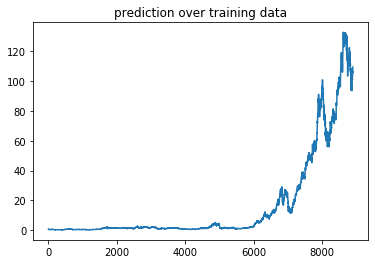

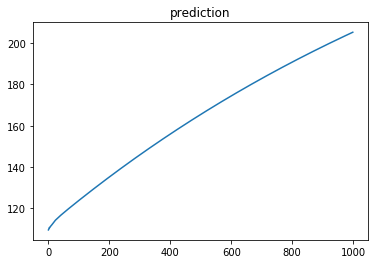

5760 	MSE 0.300865


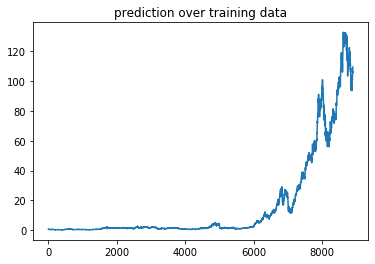

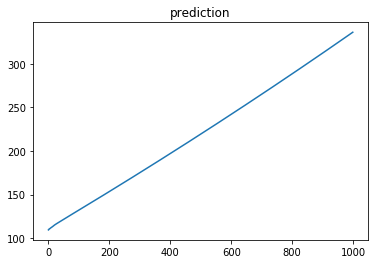

5780 	MSE 0.30064124


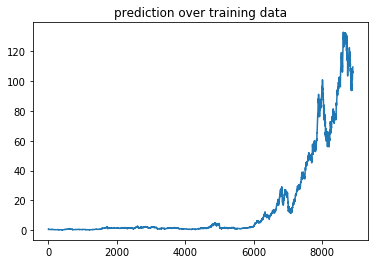

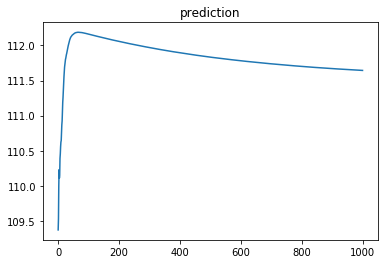

5800 	MSE 0.2998986


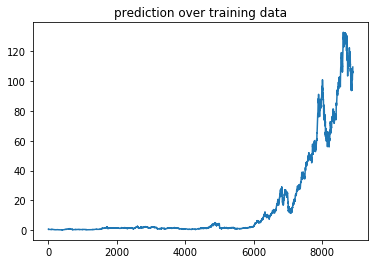

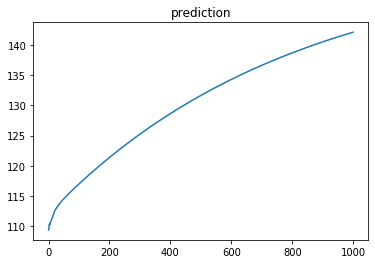

5820 	MSE 0.29959452


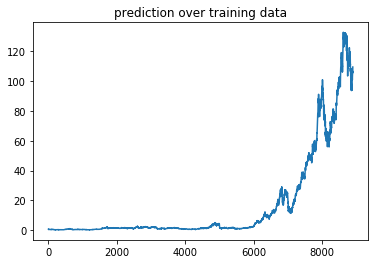

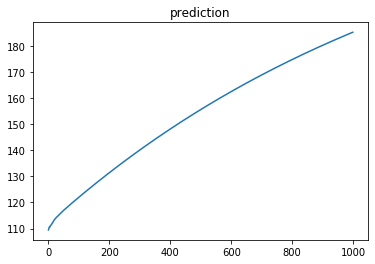

5840 	MSE 0.30204943


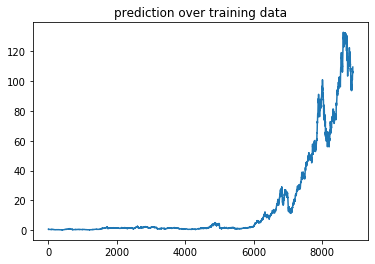

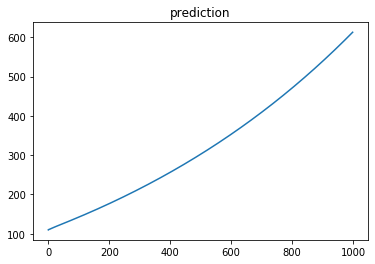

5860 	MSE 0.29994866


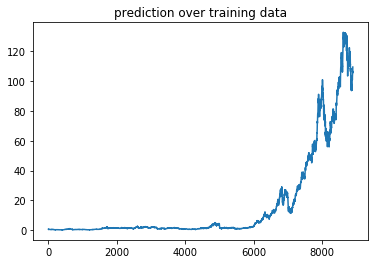

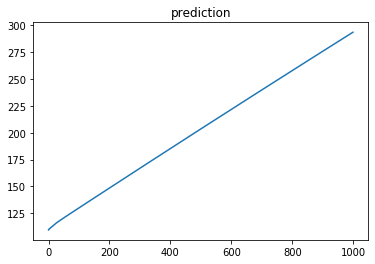

5880 	MSE 0.29936036


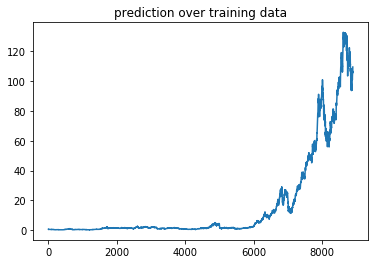

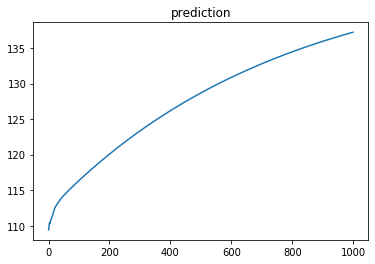

5900 	MSE 0.29958943


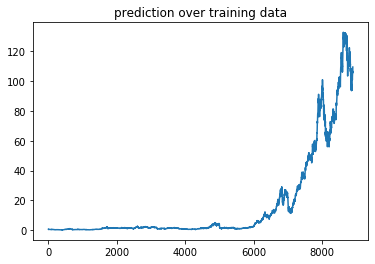

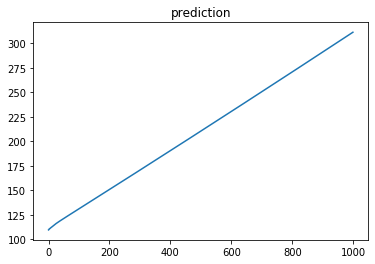

5920 	MSE 0.3005996


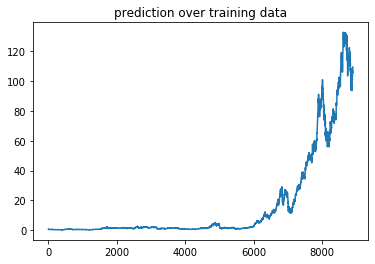

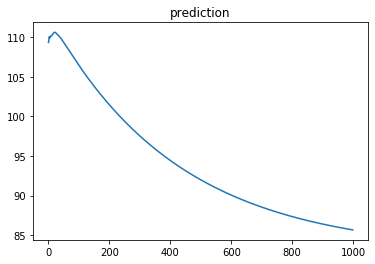

5940 	MSE 0.29851994


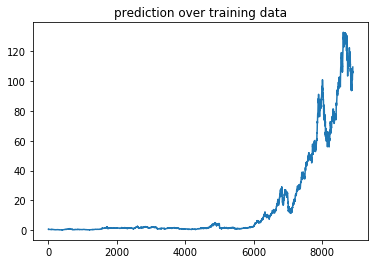

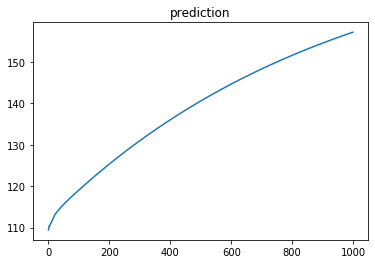

5960 	MSE 0.29891706


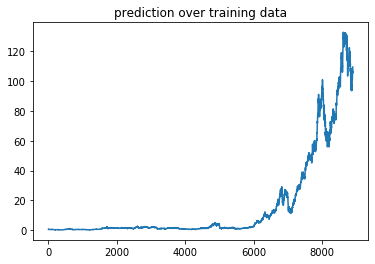

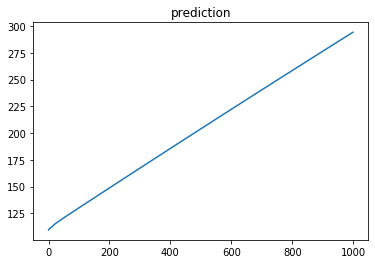

5980 	MSE 0.29832345


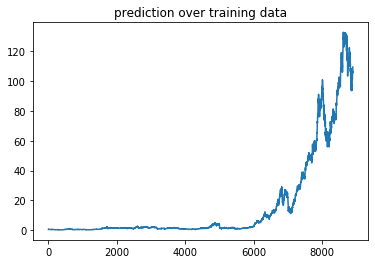

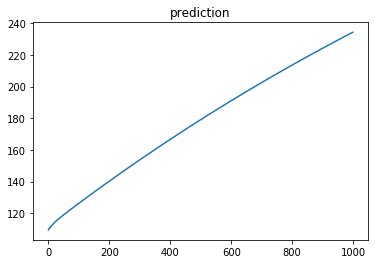

6000 	MSE 0.298944


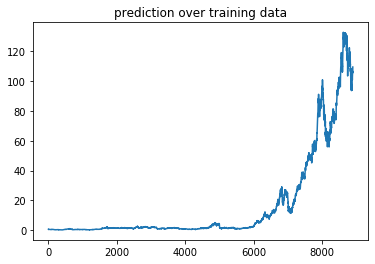

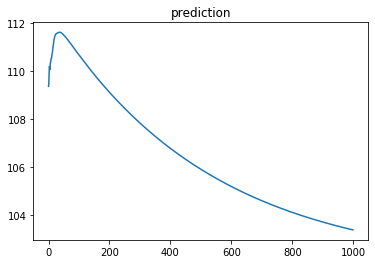

6020 	MSE 0.2977907


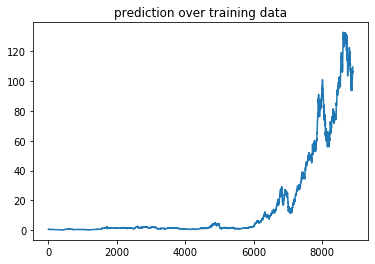

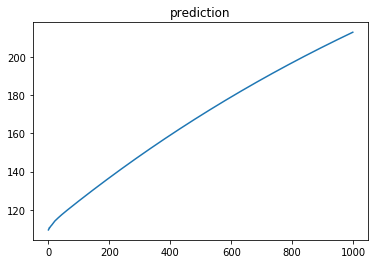

6040 	MSE 0.29829717


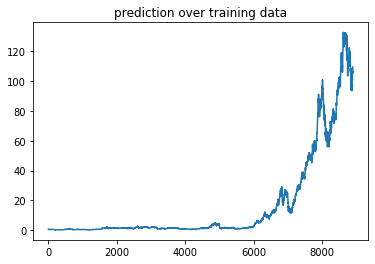

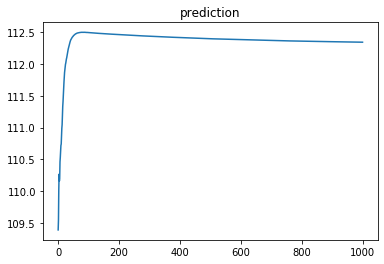

6060 	MSE 0.29745093


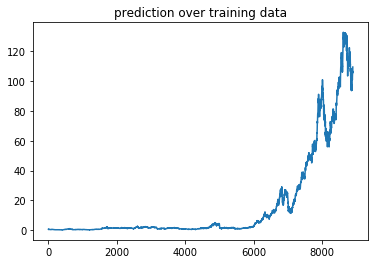

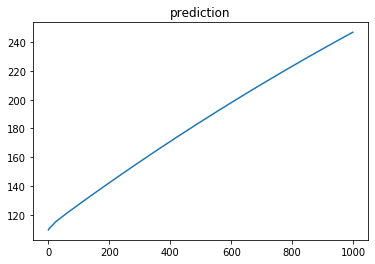

6080 	MSE 0.29745495


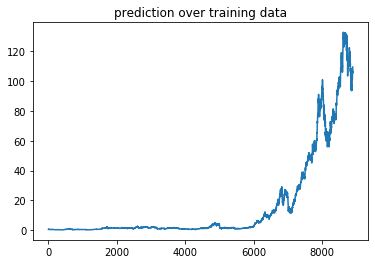

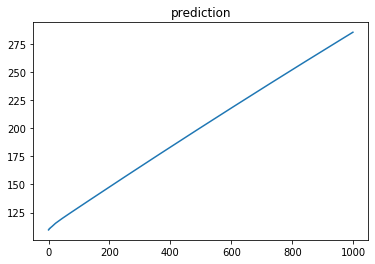

6100 	MSE 0.29853898


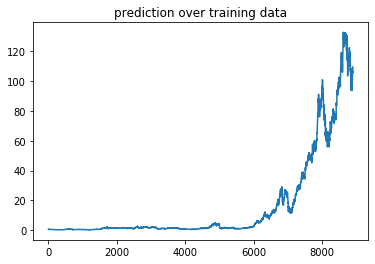

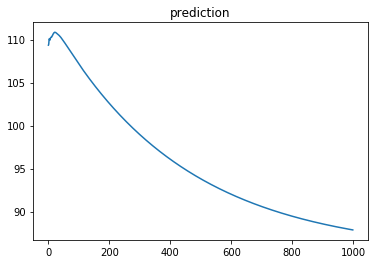

6120 	MSE 0.29766577


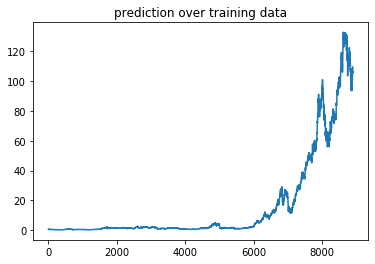

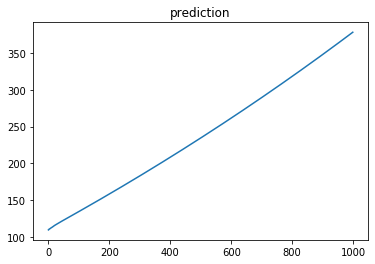

6140 	MSE 0.2971672


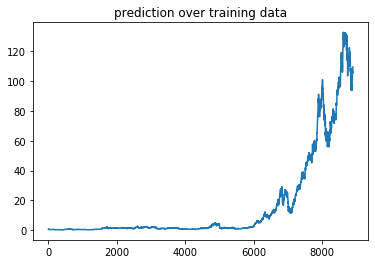

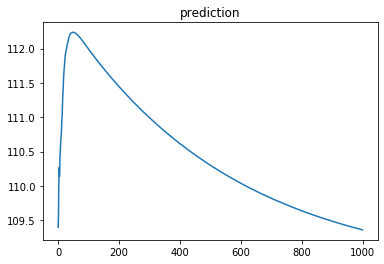

6160 	MSE 0.29759908


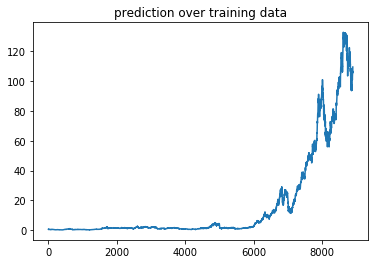

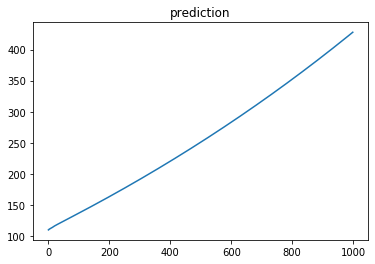

6180 	MSE 0.29749772


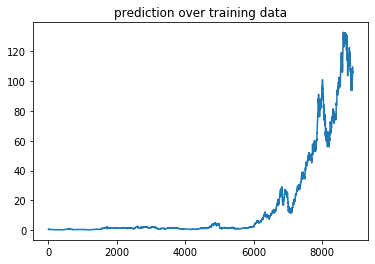

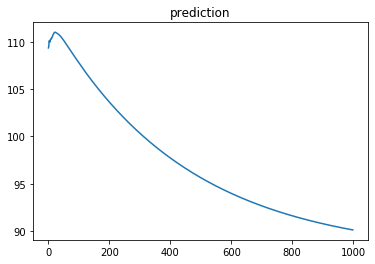

6200 	MSE 0.2964524


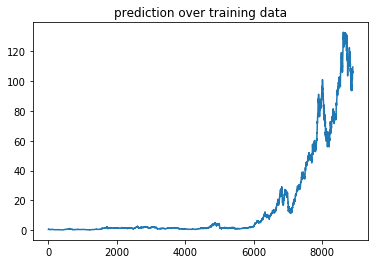

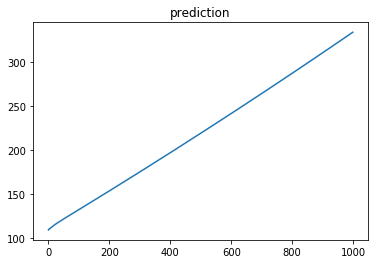

6220 	MSE 0.29552764


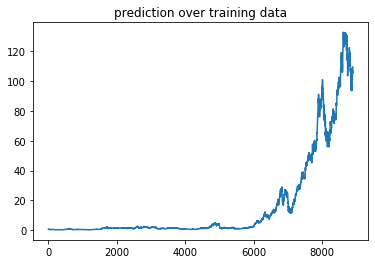

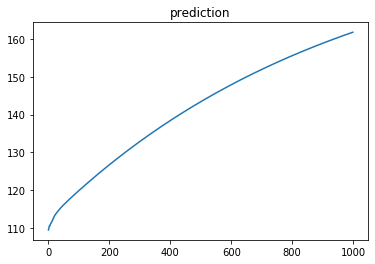

6240 	MSE 0.29523194


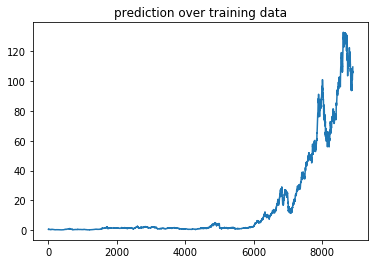

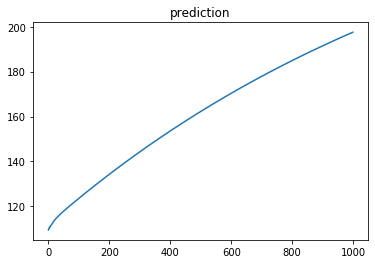

6260 	MSE 0.2953087


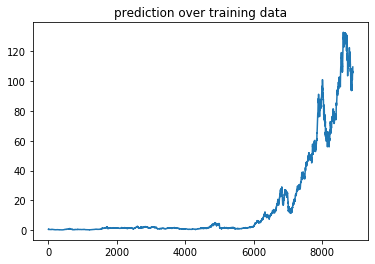

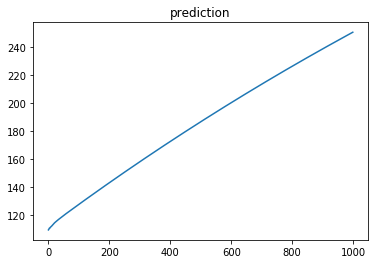

6280 	MSE 0.29499176


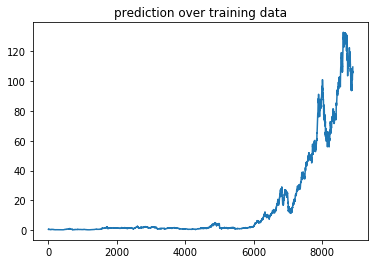

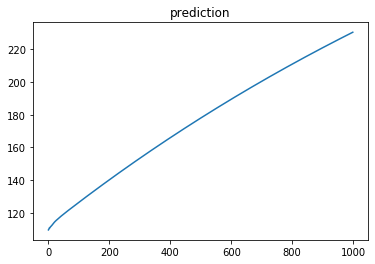

6300 	MSE 0.29492825


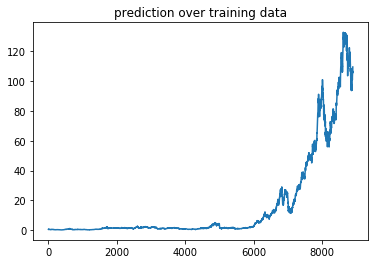

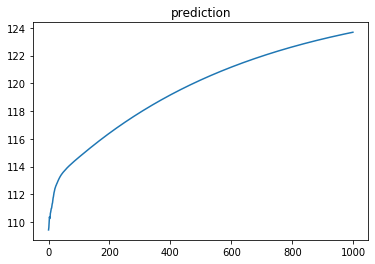

6320 	MSE 0.29463363


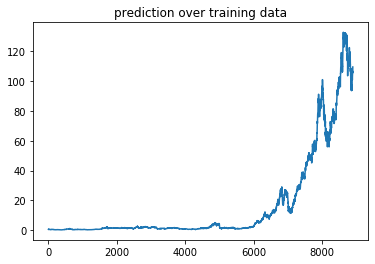

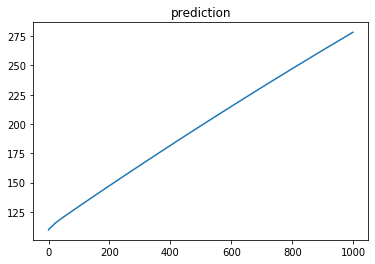

6340 	MSE 0.29540098


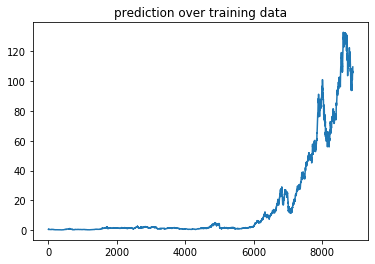

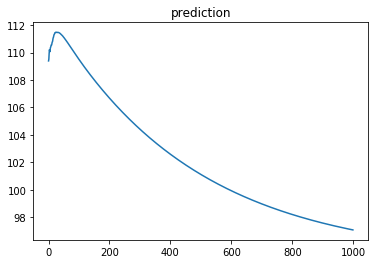

6360 	MSE 0.29453787


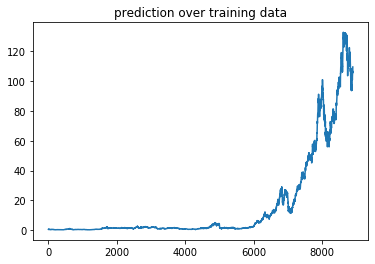

KeyboardInterrupt: ignored

In [26]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = dataX, dataY
        # prediction dimension [batch_size x t_steps x n_inputs]
        _, prediction =sess.run((training_op, outputs), feed_dict={X: X_batch, y: y_batch})
        if iteration % 20 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE", mse)
            # roll out prediction dimension into a single dimension
            prediction = np.reshape(prediction, (-1,))
            plt.plot(prediction)
            plt.title('prediction over training data')
            plt.show()
            
            # simulate the prediction for some time steps
            #sequence = [0.]*n_steps
            num_batches = X_batch.shape[0]
            sequence = X_batch[num_batches-1,:,:].reshape(-1).tolist()
            prediction_iter = 1000
            for iteration in range(prediction_iter):
                X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
                y_pred = sess.run(outputs, feed_dict={X: X_batch})
                sequence.append(y_pred[0, -1, 0])
            plt.plot(sequence[-prediction_iter:])
            plt.title('prediction')
            plt.show()